In [3]:
import pypsa
import xarray as xr
import linopy as lp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import beta
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

In [4]:
# SOC indem die Füllstände des H2 Stores aufsummiert werden und durch die installierte Kapazität geteilt werden

def get_hydrogen_soc(n):
    hydrogen_e = 0
    hydrogen_e_nom = 0

    for year in [2035, 2030, 2020]:

        hydrogen_e += n.stores_t.e[f"DE0 0 H2 Store-{year}"]
        hydrogen_e_nom += n.stores.e_nom[f"DE0 0 H2 Store-{year}"]

    soc = hydrogen_e / hydrogen_e_nom

    return soc

In [5]:
n = pypsa.Network('base_s_1__none_2035_lt.nc')
n.optimize.fix_optimal_capacities()
n.optimize.create_model()

n_perfect_foresight = pypsa.Network('base_s_1__none_2035_lt.nc')
n_perfect_foresight.optimize.fix_optimal_capacities()
n_perfect_foresight.optimize.create_model()

print()

INFO:pypsa.io:Imported network base_s_1__none_2035_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}
INFO:pypsa.io:Imported network base_s_1__none_2035_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}


In [6]:
n_perfect_foresight.optimize.solve_model(
    solver_name = 'gurobi'
)

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:01<00:00,  6.88it/s]
INFO:linopy.io: Writing time: 10.49s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-57nhxfja.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-57nhxfja.lp


Reading time = 3.75 seconds


INFO:gurobipy:Reading time = 3.75 seconds


obj: 1509641 rows, 732907 columns, 2978386 nonzeros


INFO:gurobipy:obj: 1509641 rows, 732907 columns, 2978386 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 1509641 rows, 732907 columns and 2978386 nonzeros


INFO:gurobipy:Optimize a model with 1509641 rows, 732907 columns and 2978386 nonzeros


Model fingerprint: 0x14337e47


INFO:gurobipy:Model fingerprint: 0x14337e47


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 7e+02]


INFO:gurobipy:  Bounds range     [2e+01, 7e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 1436134 rows and 206758 columns


INFO:gurobipy:Presolve removed 1436134 rows and 206758 columns


Presolve time: 3.69s


INFO:gurobipy:Presolve time: 3.69s


Presolved: 73507 rows, 526149 columns, 1224480 nonzeros


INFO:gurobipy:Presolved: 73507 rows, 526149 columns, 1224480 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.08s


INFO:gurobipy:Ordering time: 0.08s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 2.406e+05


INFO:gurobipy: AA' NZ     : 2.406e+05


 Factor NZ  : 2.076e+06 (roughly 260 MB of memory)


INFO:gurobipy: Factor NZ  : 2.076e+06 (roughly 260 MB of memory)


 Factor Ops : 1.046e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.046e+08 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.87531716e+14 -1.94364002e+14  4.19e+11 1.27e+01  3.04e+10     4s


INFO:gurobipy:   0   1.87531716e+14 -1.94364002e+14  4.19e+11 1.27e+01  3.04e+10     4s


   1   3.20189355e+13 -1.10950969e+14  6.88e+10 2.22e+02  5.08e+09     4s


INFO:gurobipy:   1   3.20189355e+13 -1.10950969e+14  6.88e+10 2.22e+02  5.08e+09     4s


   2   6.74409489e+12 -8.17827237e+13  1.37e+10 1.68e+02  1.07e+09     5s


INFO:gurobipy:   2   6.74409489e+12 -8.17827237e+13  1.37e+10 1.68e+02  1.07e+09     5s


   3   1.18375214e+12 -3.10726970e+13  1.64e+09 2.07e+01  1.46e+08     5s


INFO:gurobipy:   3   1.18375214e+12 -3.10726970e+13  1.64e+09 2.07e+01  1.46e+08     5s


   4   3.76379401e+11 -1.30274768e+13  1.96e+08 4.73e+00  2.58e+07     5s


INFO:gurobipy:   4   3.76379401e+11 -1.30274768e+13  1.96e+08 4.73e+00  2.58e+07     5s


   5   2.79411077e+11 -5.92708869e+12  1.06e+08 1.77e+00  1.19e+07     5s


INFO:gurobipy:   5   2.79411077e+11 -5.92708869e+12  1.06e+08 1.77e+00  1.19e+07     5s


   6   1.78377855e+11 -2.37856809e+12  3.54e+07 5.46e-01  4.17e+06     5s


INFO:gurobipy:   6   1.78377855e+11 -2.37856809e+12  3.54e+07 5.46e-01  4.17e+06     5s


   7   1.23307506e+11 -1.25808914e+12  1.88e+07 2.50e-01  2.12e+06     5s


INFO:gurobipy:   7   1.23307506e+11 -1.25808914e+12  1.88e+07 2.50e-01  2.12e+06     5s


   8   9.96552288e+10 -8.41778696e+11  1.30e+07 1.56e-01  1.40e+06     5s


INFO:gurobipy:   8   9.96552288e+10 -8.41778696e+11  1.30e+07 1.56e-01  1.40e+06     5s


   9   8.71384985e+10 -6.67442093e+11  1.03e+07 1.19e-01  1.09e+06     5s


INFO:gurobipy:   9   8.71384985e+10 -6.67442093e+11  1.03e+07 1.19e-01  1.09e+06     5s


  10   8.30504914e+10 -5.78938619e+11  9.38e+06 1.02e-01  9.57e+05     6s


INFO:gurobipy:  10   8.30504914e+10 -5.78938619e+11  9.38e+06 1.02e-01  9.57e+05     6s


  11   7.66258566e+10 -5.26095883e+11  7.89e+06 9.21e-02  8.42e+05     6s


INFO:gurobipy:  11   7.66258566e+10 -5.26095883e+11  7.89e+06 9.21e-02  8.42e+05     6s


  12   6.91578647e+10 -3.49653586e+11  5.79e+06 6.03e-02  5.78e+05     6s


INFO:gurobipy:  12   6.91578647e+10 -3.49653586e+11  5.79e+06 6.03e-02  5.78e+05     6s


  13   6.20073553e+10 -1.92814879e+11  3.26e+06 3.35e-02  3.31e+05     6s


INFO:gurobipy:  13   6.20073553e+10 -1.92814879e+11  3.26e+06 3.35e-02  3.31e+05     6s


  14   5.41467405e+10 -5.33792286e+10  1.01e+06 1.21e-02  1.26e+05     6s


INFO:gurobipy:  14   5.41467405e+10 -5.33792286e+10  1.01e+06 1.21e-02  1.26e+05     6s


  15   5.01449146e+10 -6.40970917e+09  6.35e+05 5.73e-03  6.67e+04     6s


INFO:gurobipy:  15   5.01449146e+10 -6.40970917e+09  6.35e+05 5.73e-03  6.67e+04     6s


  16   4.82640059e+10  5.48959056e+09  4.82e+05 4.13e-03  5.00e+04     6s


INFO:gurobipy:  16   4.82640059e+10  5.48959056e+09  4.82e+05 4.13e-03  5.00e+04     6s


  17   4.74123175e+10  1.15929137e+10  4.11e+05 3.38e-03  4.18e+04     6s


INFO:gurobipy:  17   4.74123175e+10  1.15929137e+10  4.11e+05 3.38e-03  4.18e+04     6s


  18   4.66078546e+10  1.38742394e+10  3.50e+05 3.09e-03  3.76e+04     7s


INFO:gurobipy:  18   4.66078546e+10  1.38742394e+10  3.50e+05 3.09e-03  3.76e+04     7s


  19   4.42761840e+10  1.77399441e+10  1.80e+05 2.62e-03  2.86e+04     7s


INFO:gurobipy:  19   4.42761840e+10  1.77399441e+10  1.80e+05 2.62e-03  2.86e+04     7s


  20   4.32788512e+10  2.23311761e+10  1.21e+05 2.09e-03  2.21e+04     7s


INFO:gurobipy:  20   4.32788512e+10  2.23311761e+10  1.21e+05 2.09e-03  2.21e+04     7s


  21   4.27097768e+10  2.81977929e+10  9.56e+04 1.38e-03  1.55e+04     7s


INFO:gurobipy:  21   4.27097768e+10  2.81977929e+10  9.56e+04 1.38e-03  1.55e+04     7s


  22   4.21550853e+10  3.30221017e+10  7.55e+04 7.95e-04  9.91e+03     7s


INFO:gurobipy:  22   4.21550853e+10  3.30221017e+10  7.55e+04 7.95e-04  9.91e+03     7s


  23   4.13565746e+10  3.50480049e+10  4.95e+04 5.43e-04  6.79e+03     7s


INFO:gurobipy:  23   4.13565746e+10  3.50480049e+10  4.95e+04 5.43e-04  6.79e+03     7s


  24   4.09826961e+10  3.65233392e+10  3.90e+04 3.59e-04  4.84e+03     8s


INFO:gurobipy:  24   4.09826961e+10  3.65233392e+10  3.90e+04 3.59e-04  4.84e+03     8s


  25   4.05212806e+10  3.72451267e+10  2.62e+04 2.69e-04  3.52e+03     8s


INFO:gurobipy:  25   4.05212806e+10  3.72451267e+10  2.62e+04 2.69e-04  3.52e+03     8s


  26   4.02200164e+10  3.77930450e+10  1.85e+04 2.01e-04  2.59e+03     8s


INFO:gurobipy:  26   4.02200164e+10  3.77930450e+10  1.85e+04 2.01e-04  2.59e+03     8s


  27   4.00201617e+10  3.81102125e+10  1.35e+04 1.62e-04  2.02e+03     8s


INFO:gurobipy:  27   4.00201617e+10  3.81102125e+10  1.35e+04 1.62e-04  2.02e+03     8s


  28   3.98519156e+10  3.83195834e+10  9.42e+03 1.36e-04  1.60e+03     8s


INFO:gurobipy:  28   3.98519156e+10  3.83195834e+10  9.42e+03 1.36e-04  1.60e+03     8s


  29   3.97603147e+10  3.85784036e+10  7.25e+03 1.04e-04  1.23e+03     9s


INFO:gurobipy:  29   3.97603147e+10  3.85784036e+10  7.25e+03 1.04e-04  1.23e+03     9s


  30   3.97260837e+10  3.87528064e+10  6.47e+03 8.19e-05  1.02e+03     9s


INFO:gurobipy:  30   3.97260837e+10  3.87528064e+10  6.47e+03 8.19e-05  1.02e+03     9s


  31   3.96300961e+10  3.89535328e+10  4.34e+03 5.70e-05  7.08e+02     9s


INFO:gurobipy:  31   3.96300961e+10  3.89535328e+10  4.34e+03 5.70e-05  7.08e+02     9s


  32   3.95410676e+10  3.91057295e+10  2.49e+03 3.77e-05  4.51e+02    10s


INFO:gurobipy:  32   3.95410676e+10  3.91057295e+10  2.49e+03 3.77e-05  4.51e+02    10s


  33   3.95126883e+10  3.92220178e+10  1.92e+03 2.34e-05  3.04e+02    10s


INFO:gurobipy:  33   3.95126883e+10  3.92220178e+10  1.92e+03 2.34e-05  3.04e+02    10s


  34   3.94865607e+10  3.92568994e+10  1.41e+03 1.90e-05  2.38e+02    10s


INFO:gurobipy:  34   3.94865607e+10  3.92568994e+10  1.41e+03 1.90e-05  2.38e+02    10s


  35   3.94812407e+10  3.92816794e+10  1.30e+03 1.60e-05  2.08e+02    11s


INFO:gurobipy:  35   3.94812407e+10  3.92816794e+10  1.30e+03 1.60e-05  2.08e+02    11s


  36   3.94601778e+10  3.93079346e+10  8.98e+02 1.26e-05  1.57e+02    11s


INFO:gurobipy:  36   3.94601778e+10  3.93079346e+10  8.98e+02 1.26e-05  1.57e+02    11s


  37   3.94450851e+10  3.93357838e+10  6.14e+02 9.10e-06  1.12e+02    11s


INFO:gurobipy:  37   3.94450851e+10  3.93357838e+10  6.14e+02 9.10e-06  1.12e+02    11s


  38   3.94395568e+10  3.93437810e+10  5.12e+02 8.08e-06  9.82e+01    11s


INFO:gurobipy:  38   3.94395568e+10  3.93437810e+10  5.12e+02 8.08e-06  9.82e+01    11s


  39   3.94352973e+10  3.93621896e+10  4.35e+02 5.85e-06  7.53e+01    11s


INFO:gurobipy:  39   3.94352973e+10  3.93621896e+10  4.35e+02 5.85e-06  7.53e+01    11s


  40   3.94315213e+10  3.93752365e+10  3.69e+02 4.08e-06  5.83e+01    11s


INFO:gurobipy:  40   3.94315213e+10  3.93752365e+10  3.69e+02 4.08e-06  5.83e+01    11s


  41   3.94252251e+10  3.93840901e+10  2.58e+02 2.98e-06  4.24e+01    12s


INFO:gurobipy:  41   3.94252251e+10  3.93840901e+10  2.58e+02 2.98e-06  4.24e+01    12s


  42   3.94235983e+10  3.93943567e+10  2.31e+02 1.89e-06  3.05e+01    12s


INFO:gurobipy:  42   3.94235983e+10  3.93943567e+10  2.31e+02 1.89e-06  3.05e+01    12s


  43   3.94177312e+10  3.93969979e+10  1.35e+02 1.71e-06  2.13e+01    12s


INFO:gurobipy:  43   3.94177312e+10  3.93969979e+10  1.35e+02 1.71e-06  2.13e+01    12s


  44   3.94151522e+10  3.93995647e+10  9.36e+01 1.43e-06  1.59e+01    12s


INFO:gurobipy:  44   3.94151522e+10  3.93995647e+10  9.36e+01 1.43e-06  1.59e+01    12s


  45   3.94139946e+10  3.94026284e+10  7.48e+01 9.30e-07  1.16e+01    12s


INFO:gurobipy:  45   3.94139946e+10  3.94026284e+10  7.48e+01 9.30e-07  1.16e+01    12s


  46   3.94134103e+10  3.94035597e+10  6.57e+01 7.78e-07  9.99e+00    12s


INFO:gurobipy:  46   3.94134103e+10  3.94035597e+10  6.57e+01 7.78e-07  9.99e+00    12s


  47   3.94118172e+10  3.94058195e+10  4.12e+01 4.61e-07  6.03e+00    12s


INFO:gurobipy:  47   3.94118172e+10  3.94058195e+10  4.12e+01 4.61e-07  6.03e+00    12s


  48   3.94116222e+10  3.94063907e+10  3.83e+01 4.10e-07  5.26e+00    13s


INFO:gurobipy:  48   3.94116222e+10  3.94063907e+10  3.83e+01 4.10e-07  5.26e+00    13s


  49   3.94111091e+10  3.94066978e+10  3.05e+01 3.74e-07  4.41e+00    13s


INFO:gurobipy:  49   3.94111091e+10  3.94066978e+10  3.05e+01 3.74e-07  4.41e+00    13s


  50   3.94104888e+10  3.94071416e+10  2.11e+01 3.28e-07  3.33e+00    13s


INFO:gurobipy:  50   3.94104888e+10  3.94071416e+10  2.11e+01 3.28e-07  3.33e+00    13s


  51   3.94102966e+10  3.94075295e+10  1.82e+01 2.70e-07  2.74e+00    13s


INFO:gurobipy:  51   3.94102966e+10  3.94075295e+10  1.82e+01 2.70e-07  2.74e+00    13s


  52   3.94101437e+10  3.94075738e+10  1.59e+01 2.63e-07  2.54e+00    13s


INFO:gurobipy:  52   3.94101437e+10  3.94075738e+10  1.59e+01 2.63e-07  2.54e+00    13s


  53   3.94099645e+10  3.94078192e+10  1.32e+01 2.23e-07  2.12e+00    13s


INFO:gurobipy:  53   3.94099645e+10  3.94078192e+10  1.32e+01 2.23e-07  2.12e+00    13s


  54   3.94098497e+10  3.94079490e+10  1.15e+01 2.12e-07  1.88e+00    13s


INFO:gurobipy:  54   3.94098497e+10  3.94079490e+10  1.15e+01 2.12e-07  1.88e+00    13s


  55   3.94097718e+10  3.94081067e+10  1.03e+01 1.95e-07  1.64e+00    14s


INFO:gurobipy:  55   3.94097718e+10  3.94081067e+10  1.03e+01 1.95e-07  1.64e+00    14s


  56   3.94096625e+10  3.94082088e+10  8.65e+00 1.81e-07  1.43e+00    14s


INFO:gurobipy:  56   3.94096625e+10  3.94082088e+10  8.65e+00 1.81e-07  1.43e+00    14s


  57   3.94096017e+10  3.94082930e+10  7.76e+00 1.71e-07  1.29e+00    14s


INFO:gurobipy:  57   3.94096017e+10  3.94082930e+10  7.76e+00 1.71e-07  1.29e+00    14s


  58   3.94095726e+10  3.94084440e+10  7.32e+00 1.51e-07  1.11e+00    14s


INFO:gurobipy:  58   3.94095726e+10  3.94084440e+10  7.32e+00 1.51e-07  1.11e+00    14s


  59   3.94094941e+10  3.94085368e+10  6.18e+00 1.39e-07  9.44e-01    14s


INFO:gurobipy:  59   3.94094941e+10  3.94085368e+10  6.18e+00 1.39e-07  9.44e-01    14s


  60   3.94094294e+10  3.94086187e+10  5.26e+00 1.25e-07  7.99e-01    14s


INFO:gurobipy:  60   3.94094294e+10  3.94086187e+10  5.26e+00 1.25e-07  7.99e-01    14s


  61   3.94094029e+10  3.94086514e+10  4.88e+00 1.19e-07  7.40e-01    15s


INFO:gurobipy:  61   3.94094029e+10  3.94086514e+10  4.88e+00 1.19e-07  7.40e-01    15s


  62   3.94093656e+10  3.94087517e+10  4.35e+00 1.04e-07  6.05e-01    15s


INFO:gurobipy:  62   3.94093656e+10  3.94087517e+10  4.35e+00 1.04e-07  6.05e-01    15s


  63   3.94093121e+10  3.94088140e+10  3.59e+00 9.28e-08  4.91e-01    15s


INFO:gurobipy:  63   3.94093121e+10  3.94088140e+10  3.59e+00 9.28e-08  4.91e-01    15s


  64   3.94092868e+10  3.94088700e+10  3.23e+00 8.09e-08  4.12e-01    15s


INFO:gurobipy:  64   3.94092868e+10  3.94088700e+10  3.23e+00 8.09e-08  4.12e-01    15s


  65   3.94092490e+10  3.94089225e+10  2.69e+00 6.88e-08  3.23e-01    16s


INFO:gurobipy:  65   3.94092490e+10  3.94089225e+10  2.69e+00 6.88e-08  3.23e-01    16s


  66   3.94091879e+10  3.94089363e+10  1.85e+00 6.48e-08  2.49e-01    16s


INFO:gurobipy:  66   3.94091879e+10  3.94089363e+10  1.85e+00 6.48e-08  2.49e-01    16s


  67   3.94091691e+10  3.94089696e+10  1.61e+00 4.72e-08  1.97e-01    16s


INFO:gurobipy:  67   3.94091691e+10  3.94089696e+10  1.61e+00 4.72e-08  1.97e-01    16s


  68   3.94091390e+10  3.94090007e+10  1.17e+00 2.92e-08  1.36e-01    16s


INFO:gurobipy:  68   3.94091390e+10  3.94090007e+10  1.17e+00 2.92e-08  1.36e-01    16s


  69   3.94091115e+10  3.94090244e+10  7.67e-01 2.44e-08  8.57e-02    16s


INFO:gurobipy:  69   3.94091115e+10  3.94090244e+10  7.67e-01 2.44e-08  8.57e-02    16s


  70   3.94090961e+10  3.94090319e+10  5.52e-01 3.61e-08  6.33e-02    17s


INFO:gurobipy:  70   3.94090961e+10  3.94090319e+10  5.52e-01 3.61e-08  6.33e-02    17s


  71   3.94090832e+10  3.94090500e+10  3.71e-01 3.72e-08  3.31e-02    17s


INFO:gurobipy:  71   3.94090832e+10  3.94090500e+10  3.71e-01 3.72e-08  3.31e-02    17s


  72   3.94090665e+10  3.94090523e+10  1.26e-01 3.57e-08  1.42e-02    17s


INFO:gurobipy:  72   3.94090665e+10  3.94090523e+10  1.26e-01 3.57e-08  1.42e-02    17s


  73   3.94090649e+10  3.94090543e+10  1.04e-01 2.63e-08  1.06e-02    17s


INFO:gurobipy:  73   3.94090649e+10  3.94090543e+10  1.04e-01 2.63e-08  1.06e-02    17s


  74   3.94090624e+10  3.94090559e+10  6.78e-02 1.80e-08  6.54e-03    17s


INFO:gurobipy:  74   3.94090624e+10  3.94090559e+10  6.78e-02 1.80e-08  6.54e-03    17s


  75   3.94090601e+10  3.94090569e+10  3.48e-02 1.13e-08  3.22e-03    17s


INFO:gurobipy:  75   3.94090601e+10  3.94090569e+10  3.48e-02 1.13e-08  3.22e-03    17s


  76   3.94090586e+10  3.94090572e+10  1.36e-02 7.27e-09  1.35e-03    17s


INFO:gurobipy:  76   3.94090586e+10  3.94090572e+10  1.36e-02 7.27e-09  1.35e-03    17s


  77   3.94090581e+10  3.94090574e+10  7.04e-03 4.40e-09  7.07e-04    18s


INFO:gurobipy:  77   3.94090581e+10  3.94090574e+10  7.04e-03 4.40e-09  7.07e-04    18s


  78   3.94090578e+10  3.94090574e+10  3.57e-03 3.40e-09  4.03e-04    18s


INFO:gurobipy:  78   3.94090578e+10  3.94090574e+10  3.57e-03 3.40e-09  4.03e-04    18s


  79   3.94090577e+10  3.94090575e+10  2.34e-03 2.08e-09  2.59e-04    18s


INFO:gurobipy:  79   3.94090577e+10  3.94090575e+10  2.34e-03 2.08e-09  2.59e-04    18s


INFO:gurobipy:


Barrier solved model in 79 iterations and 17.80 seconds (13.00 work units)


INFO:gurobipy:Barrier solved model in 79 iterations and 17.80 seconds (13.00 work units)


Optimal objective 3.94090577e+10


INFO:gurobipy:Optimal objective 3.94090577e+10


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   21479 DPushes remaining with DInf 0.0000000e+00                18s


INFO:gurobipy:   21479 DPushes remaining with DInf 0.0000000e+00                18s


       1 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       1 DPushes remaining with DInf 0.0000000e+00                20s


       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                20s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


  437397 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:  437397 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   99541    3.9409058e+10   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   99541    3.9409058e+10   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 99541 iterations and 22.25 seconds (11.91 work units)


INFO:gurobipy:Solved in 99541 iterations and 22.25 seconds (11.91 work units)


Optimal objective  3.940905755e+10


INFO:gurobipy:Optimal objective  3.940905755e+10
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 732907 primals, 1509641 duals
Objective: 3.94e+10
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.


('ok', 'optimal')

In [12]:
n.optimize.optimize_with_rolling_horizon(
    horizon = 48,
    overlap = 8,
    solver_name='gurobi'
)

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-01 00:00:00:2019-01-06 21:00:00] (1/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.47it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hn51ik2d.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hn51ik2d.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x1fdf4f2e


INFO:gurobipy:Model fingerprint: 0x1fdf4f2e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3337 columns


INFO:gurobipy:Presolve removed 23611 rows and 3337 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8711 columns, 17260 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8711 columns, 17260 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.28286019e+10 -4.80551332e+12  4.44e+05 6.40e+01  1.19e+09     0s


INFO:gurobipy:   0   7.28286019e+10 -4.80551332e+12  4.44e+05 6.40e+01  1.19e+09     0s


   1   1.19509491e+10 -5.25208228e+11  2.85e+04 4.71e-11  8.47e+07     0s


INFO:gurobipy:   1   1.19509491e+10 -5.25208228e+11  2.85e+04 4.71e-11  8.47e+07     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1716    7.5529042e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1716    7.5529042e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1716 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1716 iterations and 0.09 seconds (0.05 work units)


Optimal objective  7.552904175e+08


INFO:gurobipy:Optimal objective  7.552904175e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.55e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-06 00:00:00:2019-01-11 21:00:00] (2/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 223.29it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-iwt5qmsx.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-iwt5qmsx.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xa53bae9f


INFO:gurobipy:Model fingerprint: 0xa53bae9f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3335 columns


INFO:gurobipy:Presolve removed 23611 rows and 3335 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1206 rows, 8713 columns, 17262 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8713 columns, 17262 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   4.38859131e+10 -4.80479908e+12  2.30e+05 6.35e+01  7.48e+08     0s


INFO:gurobipy:   0   4.38859131e+10 -4.80479908e+12  2.30e+05 6.35e+01  7.48e+08     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1680    8.3744066e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1680    8.3744066e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1680 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1680 iterations and 0.12 seconds (0.05 work units)


Optimal objective  8.374406554e+08


INFO:gurobipy:Optimal objective  8.374406554e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.37e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-11 00:00:00:2019-01-16 21:00:00] (3/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.96it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-szqc4wvn.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-szqc4wvn.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xc5c27ad4


INFO:gurobipy:Model fingerprint: 0xc5c27ad4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3335 columns


INFO:gurobipy:Presolve removed 23611 rows and 3335 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8713 columns, 17262 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8713 columns, 17262 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   7.51317106e+10 -4.81879139e+12  4.61e+05 6.80e+01  1.22e+09     0s


INFO:gurobipy:   0   7.51317106e+10 -4.81879139e+12  4.61e+05 6.80e+01  1.22e+09     0s


   1   1.17836337e+10 -4.81352528e+11  2.90e+04 5.21e-11  8.30e+07     0s


INFO:gurobipy:   1   1.17836337e+10 -4.81352528e+11  2.90e+04 5.21e-11  8.30e+07     0s


   2   3.79391997e+09 -1.15048622e+11  2.06e+03 8.16e-11  9.78e+06     0s


INFO:gurobipy:   2   3.79391997e+09 -1.15048622e+11  2.06e+03 8.16e-11  9.78e+06     0s


   3   1.95551286e+09 -2.01104837e+10  4.01e+02 2.06e-10  1.63e+06     0s


INFO:gurobipy:   3   1.95551286e+09 -2.01104837e+10  4.01e+02 2.06e-10  1.63e+06     0s


   4   1.11141620e+09 -3.40287759e+09  3.49e+01 8.21e-11  2.80e+05     0s


INFO:gurobipy:   4   1.11141620e+09 -3.40287759e+09  3.49e+01 8.21e-11  2.80e+05     0s


INFO:gurobipy:


Barrier performed 4 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 4 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2093    6.0987309e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2093    6.0987309e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2093 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 2093 iterations and 0.11 seconds (0.06 work units)


Optimal objective  6.098730935e+08


INFO:gurobipy:Optimal objective  6.098730935e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.10e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-16 00:00:00:2019-01-21 21:00:00] (4/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 263.58it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9l1av_z_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9l1av_z_.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xb436d5b5


INFO:gurobipy:Model fingerprint: 0xb436d5b5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3373 columns


INFO:gurobipy:Presolve removed 23611 rows and 3373 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8675 columns, 17218 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8675 columns, 17218 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.64055849e+10 -4.81223391e+12  6.24e+05 9.03e+01  1.56e+09     0s


INFO:gurobipy:   0   9.64055849e+10 -4.81223391e+12  6.24e+05 9.03e+01  1.56e+09     0s


   1   1.30700850e+10 -5.39650717e+11  3.27e+04 5.44e-11  9.44e+07     0s


INFO:gurobipy:   1   1.30700850e+10 -5.39650717e+11  3.27e+04 5.44e-11  9.44e+07     0s


   2   7.27467560e+09 -1.38779455e+11  4.23e+03 1.68e-10  1.50e+07     0s


INFO:gurobipy:   2   7.27467560e+09 -1.38779455e+11  4.23e+03 1.68e-10  1.50e+07     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1788    1.0771046e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1788    1.0771046e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1788 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1788 iterations and 0.09 seconds (0.05 work units)


Optimal objective  1.077104584e+09


INFO:gurobipy:Optimal objective  1.077104584e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.08e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-21 00:00:00:2019-01-26 21:00:00] (5/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 257.08it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-60q3qeg9.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-60q3qeg9.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x133e3988


INFO:gurobipy:Model fingerprint: 0x133e3988


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3443 columns


INFO:gurobipy:Presolve removed 23611 rows and 3443 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1206 rows, 8605 columns, 17136 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8605 columns, 17136 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.16230339e+11 -4.81417872e+12  7.76e+05 1.08e+02  1.87e+09     0s


INFO:gurobipy:   0   1.16230339e+11 -4.81417872e+12  7.76e+05 1.08e+02  1.87e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1457    4.4721685e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1457    4.4721685e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1457 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1457 iterations and 0.09 seconds (0.05 work units)


Optimal objective  4.472168471e+09


INFO:gurobipy:Optimal objective  4.472168471e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.47e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-26 00:00:00:2019-01-31 21:00:00] (6/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 257.32it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ih72mqme.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ih72mqme.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x46176d34


INFO:gurobipy:Model fingerprint: 0x46176d34


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3328 columns


INFO:gurobipy:Presolve removed 23611 rows and 3328 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1206 rows, 8720 columns, 17269 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8720 columns, 17269 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   8.42701561e+10 -4.80567428e+12  5.28e+05 6.46e+01  1.36e+09     0s


INFO:gurobipy:   0   8.42701561e+10 -4.80567428e+12  5.28e+05 6.46e+01  1.36e+09     0s


   1   1.24607294e+10 -4.99031401e+11  3.00e+04 5.88e-11  8.62e+07     0s


INFO:gurobipy:   1   1.24607294e+10 -4.99031401e+11  3.00e+04 5.88e-11  8.62e+07     0s


   2   5.92921592e+09 -1.08388134e+11  2.92e+03 1.13e-10  1.09e+07     0s


INFO:gurobipy:   2   5.92921592e+09 -1.08388134e+11  2.92e+03 1.13e-10  1.09e+07     0s


   3   2.32561536e+09 -2.51220764e+10  5.03e+02 2.08e-09  2.10e+06     0s


INFO:gurobipy:   3   2.32561536e+09 -2.51220764e+10  5.03e+02 2.08e-09  2.10e+06     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1900    9.0153649e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1900    9.0153649e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1900 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1900 iterations and 0.10 seconds (0.05 work units)


Optimal objective  9.015364917e+08


INFO:gurobipy:Optimal objective  9.015364917e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 9.02e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-31 00:00:00:2019-02-05 21:00:00] (7/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 264.02it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-196sc_tc.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-196sc_tc.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x1c9b0504


INFO:gurobipy:Model fingerprint: 0x1c9b0504


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3320 columns


INFO:gurobipy:Presolve removed 23611 rows and 3320 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8728 columns, 17277 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8728 columns, 17277 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.21121459e+11 -4.80883731e+12  8.00e+05 6.49e+01  1.91e+09     0s


INFO:gurobipy:   0   1.21121459e+11 -4.80883731e+12  8.00e+05 6.49e+01  1.91e+09     0s


   1   1.35360360e+10 -6.04844310e+11  3.53e+04 4.62e-11  1.04e+08     0s


INFO:gurobipy:   1   1.35360360e+10 -6.04844310e+11  3.53e+04 4.62e-11  1.04e+08     0s


   2   6.90749847e+09 -1.28452586e+11  3.75e+03 1.64e-09  1.36e+07     0s


INFO:gurobipy:   2   6.90749847e+09 -1.28452586e+11  3.75e+03 1.64e-09  1.36e+07     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1878    1.0376666e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1878    1.0376666e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1878 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1878 iterations and 0.09 seconds (0.05 work units)


Optimal objective  1.037666609e+09


INFO:gurobipy:Optimal objective  1.037666609e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.04e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-05 00:00:00:2019-02-10 21:00:00] (8/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 210.36it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lxljyfwb.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lxljyfwb.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xbd9f9563


INFO:gurobipy:Model fingerprint: 0xbd9f9563


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3292 columns


INFO:gurobipy:Presolve removed 23611 rows and 3292 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1206 rows, 8756 columns, 17305 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8756 columns, 17305 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.38875777e+11 -4.82387098e+12  9.29e+05 6.32e+01  2.18e+09     0s


INFO:gurobipy:   0   1.38875777e+11 -4.82387098e+12  9.29e+05 6.32e+01  2.18e+09     0s


   1   1.40009354e+10 -6.65377250e+11  4.13e+04 4.79e-11  1.19e+08     0s


INFO:gurobipy:   1   1.40009354e+10 -6.65377250e+11  4.13e+04 4.79e-11  1.19e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1820    6.7586953e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1820    6.7586953e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1820 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1820 iterations and 0.12 seconds (0.05 work units)


Optimal objective  6.758695325e+08


INFO:gurobipy:Optimal objective  6.758695325e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.76e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-10 00:00:00:2019-02-15 21:00:00] (9/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 212.79it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fsclq7jn.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fsclq7jn.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x458dfa70


INFO:gurobipy:Model fingerprint: 0x458dfa70


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3284 columns


INFO:gurobipy:Presolve removed 23611 rows and 3284 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8764 columns, 17313 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8764 columns, 17313 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.04834167e+11 -4.81913386e+12  6.78e+05 6.32e+01  1.66e+09     0s


INFO:gurobipy:   0   1.04834167e+11 -4.81913386e+12  6.78e+05 6.32e+01  1.66e+09     0s


   1   1.25096059e+10 -5.69505354e+11  3.16e+04 4.66e-11  9.39e+07     0s


INFO:gurobipy:   1   1.25096059e+10 -5.69505354e+11  3.16e+04 4.66e-11  9.39e+07     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1749    6.8391939e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1749    6.8391939e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1749 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1749 iterations and 0.09 seconds (0.05 work units)


Optimal objective  6.839193901e+08


INFO:gurobipy:Optimal objective  6.839193901e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-15 00:00:00:2019-02-20 21:00:00] (10/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.91it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_p_iii1s.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_p_iii1s.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xbd4c10a0


INFO:gurobipy:Model fingerprint: 0xbd4c10a0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3275 columns


INFO:gurobipy:Presolve removed 23611 rows and 3275 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8773 columns, 17322 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8773 columns, 17322 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.49465300e+11 -4.82062772e+12  1.01e+06 6.04e+01  2.34e+09     0s


INFO:gurobipy:   0   1.49465300e+11 -4.82062772e+12  1.01e+06 6.04e+01  2.34e+09     0s


   1   1.46135956e+10 -6.85754844e+11  4.51e+04 5.09e-11  1.28e+08     0s


INFO:gurobipy:   1   1.46135956e+10 -6.85754844e+11  4.51e+04 5.09e-11  1.28e+08     0s


   2   5.10381395e+09 -1.44884088e+11  3.07e+03 1.98e-09  1.34e+07     0s


INFO:gurobipy:   2   5.10381395e+09 -1.44884088e+11  3.07e+03 1.98e-09  1.34e+07     0s


   3   2.05699736e+09 -2.25283163e+10  4.54e+02 2.08e-10  1.84e+06     0s


INFO:gurobipy:   3   2.05699736e+09 -2.25283163e+10  4.54e+02 2.08e-10  1.84e+06     0s


   4   1.15836376e+09 -3.69268247e+09  3.50e+01 2.93e-10  2.98e+05     0s


INFO:gurobipy:   4   1.15836376e+09 -3.69268247e+09  3.50e+01 2.93e-10  2.98e+05     0s


INFO:gurobipy:


Barrier performed 4 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 4 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1842    6.3968652e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1842    6.3968652e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1842 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1842 iterations and 0.11 seconds (0.06 work units)


Optimal objective  6.396865169e+08


INFO:gurobipy:Optimal objective  6.396865169e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.40e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-20 00:00:00:2019-02-25 21:00:00] (11/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.46it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_in0e18e.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_in0e18e.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x23bd68fe


INFO:gurobipy:Model fingerprint: 0x23bd68fe


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3281 columns


INFO:gurobipy:Presolve removed 23611 rows and 3281 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8767 columns, 17316 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8767 columns, 17316 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.62071815e+11 -4.81355235e+12  1.10e+06 7.06e+01  2.52e+09     0s


INFO:gurobipy:   0   1.62071815e+11 -4.81355235e+12  1.10e+06 7.06e+01  2.52e+09     0s


   1   1.54905400e+10 -7.08239568e+11  4.96e+04 5.45e-11  1.38e+08     0s


INFO:gurobipy:   1   1.54905400e+10 -7.08239568e+11  4.96e+04 5.45e-11  1.38e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1698    7.8638844e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1698    7.8638844e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1698 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1698 iterations and 0.10 seconds (0.05 work units)


Optimal objective  7.863884436e+08


INFO:gurobipy:Optimal objective  7.863884436e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.86e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-25 00:00:00:2019-03-02 21:00:00] (12/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 247.69it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-iflkg_w3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-iflkg_w3.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xc0baf5aa


INFO:gurobipy:Model fingerprint: 0xc0baf5aa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3284 columns


INFO:gurobipy:Presolve removed 23611 rows and 3284 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1206 rows, 8764 columns, 17313 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8764 columns, 17313 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.61451457e+11 -4.81647451e+12  1.09e+06 7.06e+01  2.52e+09     0s


INFO:gurobipy:   0   1.61451457e+11 -4.81647451e+12  1.09e+06 7.06e+01  2.52e+09     0s


   1   1.54388348e+10 -7.06745193e+11  4.95e+04 5.21e-11  1.38e+08     0s


INFO:gurobipy:   1   1.54388348e+10 -7.06745193e+11  4.95e+04 5.21e-11  1.38e+08     0s


   2   6.02249714e+09 -1.45773374e+11  3.78e+03 2.66e-09  1.47e+07     0s


INFO:gurobipy:   2   6.02249714e+09 -1.45773374e+11  3.78e+03 2.66e-09  1.47e+07     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1792    7.7587600e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1792    7.7587600e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1792 iterations and 0.15 seconds (0.06 work units)


INFO:gurobipy:Solved in 1792 iterations and 0.15 seconds (0.06 work units)


Optimal objective  7.758760020e+08


INFO:gurobipy:Optimal objective  7.758760020e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.76e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-02 00:00:00:2019-03-07 21:00:00] (13/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 233.05it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-39a4l1wu.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-39a4l1wu.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xb720ba37


INFO:gurobipy:Model fingerprint: 0xb720ba37


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3281 columns


INFO:gurobipy:Presolve removed 23611 rows and 3281 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8767 columns, 17316 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8767 columns, 17316 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.74216281e+11 -4.83686167e+12  1.19e+06 6.05e+01  2.72e+09     0s


INFO:gurobipy:   0   1.74216281e+11 -4.83686167e+12  1.19e+06 6.05e+01  2.72e+09     0s


   1   1.56576117e+10 -7.57600271e+11  5.40e+04 5.37e-11  1.50e+08     0s


INFO:gurobipy:   1   1.56576117e+10 -7.57600271e+11  5.40e+04 5.37e-11  1.50e+08     0s


   2   4.50425444e+09 -1.61779314e+11  3.64e+03 2.24e-09  1.52e+07     0s


INFO:gurobipy:   2   4.50425444e+09 -1.61779314e+11  3.64e+03 2.24e-09  1.52e+07     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1910    5.1298513e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1910    5.1298513e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1910 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1910 iterations and 0.11 seconds (0.06 work units)


Optimal objective  5.129851260e+08


INFO:gurobipy:Optimal objective  5.129851260e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.13e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-07 00:00:00:2019-03-12 21:00:00] (14/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.71it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vsjyc_xi.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vsjyc_xi.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x627a0c3b


INFO:gurobipy:Model fingerprint: 0x627a0c3b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3277 columns


INFO:gurobipy:Presolve removed 23611 rows and 3277 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1206 rows, 8771 columns, 17320 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8771 columns, 17320 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81695760e+11 -4.84164581e+12  1.25e+06 6.05e+01  2.83e+09     0s


INFO:gurobipy:   0   1.81695760e+11 -4.84164581e+12  1.25e+06 6.05e+01  2.83e+09     0s


   1   1.60009247e+10 -7.77328786e+11  5.61e+04 5.30e-11  1.55e+08     0s


INFO:gurobipy:   1   1.60009247e+10 -7.77328786e+11  5.61e+04 5.30e-11  1.55e+08     0s


   2   4.38461264e+09 -1.67522162e+11  3.29e+03 2.28e-09  1.50e+07     0s


INFO:gurobipy:   2   4.38461264e+09 -1.67522162e+11  3.29e+03 2.28e-09  1.50e+07     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1739    5.1979919e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1739    5.1979919e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1739 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1739 iterations and 0.10 seconds (0.06 work units)


Optimal objective  5.197991875e+08


INFO:gurobipy:Optimal objective  5.197991875e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.20e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-12 00:00:00:2019-03-17 21:00:00] (15/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.96it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-n8z83uct.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-n8z83uct.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x78dbd105


INFO:gurobipy:Model fingerprint: 0x78dbd105


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 6e+02]


INFO:gurobipy:  Bounds range     [4e+02, 6e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3276 columns


INFO:gurobipy:Presolve removed 23611 rows and 3276 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1206 rows, 8772 columns, 17321 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8772 columns, 17321 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97762502e+11 -4.85008074e+12  1.36e+06 6.06e+01  3.07e+09     0s


INFO:gurobipy:   0   1.97762502e+11 -4.85008074e+12  1.36e+06 6.06e+01  3.07e+09     0s


   1   1.67653445e+10 -8.19210333e+11  6.16e+04 4.73e-11  1.68e+08     0s


INFO:gurobipy:   1   1.67653445e+10 -8.19210333e+11  6.16e+04 4.73e-11  1.68e+08     0s


   2   4.26840394e+09 -1.79742528e+11  3.42e+03 1.24e-09  1.60e+07     0s


INFO:gurobipy:   2   4.26840394e+09 -1.79742528e+11  3.42e+03 1.24e-09  1.60e+07     0s


   3   1.94587601e+09 -2.67056955e+10  5.16e+02 2.62e-10  2.11e+06     0s


INFO:gurobipy:   3   1.94587601e+09 -2.67056955e+10  5.16e+02 2.62e-10  2.11e+06     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.10 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.10 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1973    5.0008777e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1973    5.0008777e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1973 iterations and 0.17 seconds (0.06 work units)


INFO:gurobipy:Solved in 1973 iterations and 0.17 seconds (0.06 work units)


Optimal objective  5.000877664e+08


INFO:gurobipy:Optimal objective  5.000877664e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.00e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-17 00:00:00:2019-03-22 21:00:00] (16/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.06it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-mfdsxqop.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-mfdsxqop.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x375b511d


INFO:gurobipy:Model fingerprint: 0x375b511d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [6e+02, 7e+02]


INFO:gurobipy:  Bounds range     [6e+02, 7e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3285 columns


INFO:gurobipy:Presolve removed 23611 rows and 3285 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1206 rows, 8763 columns, 17312 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8763 columns, 17312 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.38606681e+11 -4.83279337e+12  9.29e+05 7.07e+01  2.18e+09     0s


INFO:gurobipy:   0   1.38606681e+11 -4.83279337e+12  9.29e+05 7.07e+01  2.18e+09     0s


   1   1.39831270e+10 -6.62635484e+11  4.16e+04 4.60e-11  1.19e+08     0s


INFO:gurobipy:   1   1.39831270e+10 -6.62635484e+11  4.16e+04 4.60e-11  1.19e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1658    6.0566622e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1658    6.0566622e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1658 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1658 iterations and 0.10 seconds (0.05 work units)


Optimal objective  6.056662199e+08


INFO:gurobipy:Optimal objective  6.056662199e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-22 00:00:00:2019-03-27 21:00:00] (17/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.83it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5m10n7zj.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5m10n7zj.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xab15831e


INFO:gurobipy:Model fingerprint: 0xab15831e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 7e+02]


INFO:gurobipy:  Bounds range     [5e+02, 7e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3291 columns


INFO:gurobipy:Presolve removed 23611 rows and 3291 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8757 columns, 17306 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8757 columns, 17306 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.88734080e+11 -4.82894608e+12  1.30e+06 7.73e+01  2.93e+09     0s


INFO:gurobipy:   0   1.88734080e+11 -4.82894608e+12  1.30e+06 7.73e+01  2.93e+09     0s


   1   1.67440812e+10 -7.76186397e+11  5.91e+04 6.06e-11  1.61e+08     0s


INFO:gurobipy:   1   1.67440812e+10 -7.76186397e+11  5.91e+04 6.06e-11  1.61e+08     0s


   2   5.54810369e+09 -1.63212021e+11  4.15e+03 2.07e-09  1.63e+07     0s


INFO:gurobipy:   2   5.54810369e+09 -1.63212021e+11  4.15e+03 2.07e-09  1.63e+07     0s


   3   2.07563291e+09 -2.69764394e+10  5.73e+02 1.60e-09  2.24e+06     0s


INFO:gurobipy:   3   2.07563291e+09 -2.69764394e+10  5.73e+02 1.60e-09  2.24e+06     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.07 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.07 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1741    6.4135725e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1741    6.4135725e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1741 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1741 iterations and 0.11 seconds (0.06 work units)


Optimal objective  6.413572459e+08


INFO:gurobipy:Optimal objective  6.413572459e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.41e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-27 00:00:00:2019-04-01 21:00:00] (18/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.35it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ywn0q9rz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ywn0q9rz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xfd7ef6b1


INFO:gurobipy:Model fingerprint: 0xfd7ef6b1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3282 columns


INFO:gurobipy:Presolve removed 23611 rows and 3282 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1206 rows, 8766 columns, 17315 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8766 columns, 17315 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.91942445e+11 -4.82792136e+12  1.32e+06 6.08e+01  2.98e+09     0s


INFO:gurobipy:   0   1.91942445e+11 -4.82792136e+12  1.32e+06 6.08e+01  2.98e+09     0s


   1   2.27873803e+10 -7.82248006e+11  1.03e+05 5.21e-11  2.48e+08     0s


INFO:gurobipy:   1   2.27873803e+10 -7.82248006e+11  1.03e+05 5.21e-11  2.48e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1634    6.1562886e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1634    6.1562886e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1634 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1634 iterations and 0.10 seconds (0.05 work units)


Optimal objective  6.156288581e+08


INFO:gurobipy:Optimal objective  6.156288581e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.16e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-01 00:00:00:2019-04-06 21:00:00] (19/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 236.47it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-c0e_fhth.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-c0e_fhth.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xff2f9142


INFO:gurobipy:Model fingerprint: 0xff2f9142


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3276 columns


INFO:gurobipy:Presolve removed 23611 rows and 3276 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8772 columns, 17321 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8772 columns, 17321 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.34431492e+11 -4.84333709e+12  1.64e+06 5.79e+01  3.63e+09     0s


INFO:gurobipy:   0   2.34431492e+11 -4.84333709e+12  1.64e+06 5.79e+01  3.63e+09     0s


   1   2.62119464e+10 -8.80963109e+11  1.27e+05 4.62e-11  3.01e+08     0s


INFO:gurobipy:   1   2.62119464e+10 -8.80963109e+11  1.27e+05 4.62e-11  3.01e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1591    6.8774351e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1591    6.8774351e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1591 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1591 iterations and 0.10 seconds (0.05 work units)


Optimal objective  6.877435101e+08


INFO:gurobipy:Optimal objective  6.877435101e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.88e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-06 00:00:00:2019-04-11 21:00:00] (20/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.08it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3qbiczq0.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3qbiczq0.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x25bf166b


INFO:gurobipy:Model fingerprint: 0x25bf166b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3272 columns


INFO:gurobipy:Presolve removed 23611 rows and 3272 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1206 rows, 8776 columns, 17325 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8776 columns, 17325 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.01150287e+11 -4.83456032e+12  1.40e+06 5.85e+01  3.14e+09     0s


INFO:gurobipy:   0   2.01150287e+11 -4.83456032e+12  1.40e+06 5.85e+01  3.14e+09     0s


   1   2.60089498e+10 -8.06829741e+11  1.27e+05 5.32e-11  2.97e+08     0s


INFO:gurobipy:   1   2.60089498e+10 -8.06829741e+11  1.27e+05 5.32e-11  2.97e+08     0s


   2   6.07963154e+09 -2.16733483e+11  5.65e+03 8.21e-11  2.24e+07     0s


INFO:gurobipy:   2   6.07963154e+09 -2.16733483e+11  5.65e+03 8.21e-11  2.24e+07     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1807    5.9136990e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1807    5.9136990e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1807 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1807 iterations and 0.12 seconds (0.05 work units)


Optimal objective  5.913698959e+08


INFO:gurobipy:Optimal objective  5.913698959e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.91e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-11 00:00:00:2019-04-16 21:00:00] (21/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 221.43it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5rzedqml.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5rzedqml.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x0022b79d


INFO:gurobipy:Model fingerprint: 0x0022b79d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3254 columns


INFO:gurobipy:Presolve removed 23611 rows and 3254 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1206 rows, 8794 columns, 17343 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8794 columns, 17343 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.29395919e+11 -4.84105937e+12  1.59e+06 5.78e+01  3.54e+09     0s


INFO:gurobipy:   0   2.29395919e+11 -4.84105937e+12  1.59e+06 5.78e+01  3.54e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1623    6.7913294e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1623    6.7913294e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1623 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1623 iterations and 0.12 seconds (0.05 work units)


Optimal objective  6.791329392e+08


INFO:gurobipy:Optimal objective  6.791329392e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.79e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-16 00:00:00:2019-04-21 21:00:00] (22/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 193.82it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9yrrwsky.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9yrrwsky.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xf278959f


INFO:gurobipy:Model fingerprint: 0xf278959f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23611 rows and 3354 columns


INFO:gurobipy:Presolve removed 23611 rows and 3354 columns


Presolve time: 0.14s


INFO:gurobipy:Presolve time: 0.14s


Presolved: 1206 rows, 8694 columns, 17181 nonzeros


INFO:gurobipy:Presolved: 1206 rows, 8694 columns, 17181 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.317e+03


INFO:gurobipy: AA' NZ     : 3.317e+03


 Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.804e+04 (roughly 4 MB of memory)


 Factor Ops : 9.563e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.563e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.59244956e+11 -4.83741960e+12  1.10e+06 3.38e+02  2.52e+09     0s


INFO:gurobipy:   0   1.59244956e+11 -4.83741960e+12  1.10e+06 3.38e+02  2.52e+09     0s


   1   2.24963072e+10 -7.12439542e+11  1.05e+05 5.09e-11  2.46e+08     0s


INFO:gurobipy:   1   2.24963072e+10 -7.12439542e+11  1.05e+05 5.09e-11  2.46e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.17 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.17 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1565    4.8355034e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1565    4.8355034e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1565 iterations and 0.23 seconds (0.05 work units)


INFO:gurobipy:Solved in 1565 iterations and 0.23 seconds (0.05 work units)


Optimal objective  4.835503386e+08


INFO:gurobipy:Optimal objective  4.835503386e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-21 00:00:00:2019-04-26 21:00:00] (23/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 262.06it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7zo3gjwk.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7zo3gjwk.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x776ff981


INFO:gurobipy:Model fingerprint: 0x776ff981


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23609 rows and 3431 columns


INFO:gurobipy:Presolve removed 23609 rows and 3431 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1208 rows, 8617 columns, 20063 nonzeros


INFO:gurobipy:Presolved: 1208 rows, 8617 columns, 20063 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.950e+03


INFO:gurobipy: AA' NZ     : 3.950e+03


 Factor NZ  : 2.959e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.959e+04 (roughly 4 MB of memory)


 Factor Ops : 1.085e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.085e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.05343003e+13 -6.33302703e+12  1.12e+09 4.47e+02  1.61e+11     0s


INFO:gurobipy:   0   1.05343003e+13 -6.33302703e+12  1.12e+09 4.47e+02  1.61e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1487    4.8921605e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1487    4.8921605e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1487 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1487 iterations and 0.10 seconds (0.05 work units)


Optimal objective  4.892160454e+08


INFO:gurobipy:Optimal objective  4.892160454e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.89e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-26 00:00:00:2019-05-01 21:00:00] (24/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.67it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-r498i_qo.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-r498i_qo.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x0444f577


INFO:gurobipy:Model fingerprint: 0x0444f577


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3266 columns


INFO:gurobipy:Presolve removed 23608 rows and 3266 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8782 columns, 20367 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8782 columns, 20367 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.927e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.927e+04 (roughly 4 MB of memory)


 Factor Ops : 1.059e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.059e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.81696355e+12 -7.82507037e+12  7.60e+08 5.68e+01  1.49e+11     0s


INFO:gurobipy:   0   9.81696355e+12 -7.82507037e+12  7.60e+08 5.68e+01  1.49e+11     0s


   1   7.96420943e+11 -5.58061894e+12  5.97e+07 1.31e+04  1.21e+10     0s


INFO:gurobipy:   1   7.96420943e+11 -5.58061894e+12  5.97e+07 1.31e+04  1.21e+10     0s


   2   3.77152566e+10 -1.69293782e+12  2.19e+06 8.46e-11  5.24e+08     0s


INFO:gurobipy:   2   3.77152566e+10 -1.69293782e+12  2.19e+06 8.46e-11  5.24e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1647    5.8816133e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1647    5.8816133e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1647 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1647 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.881613254e+08


INFO:gurobipy:Optimal objective  5.881613254e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.88e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-01 00:00:00:2019-05-06 21:00:00] (25/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.20it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-237h2sdm.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-237h2sdm.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x896647b2


INFO:gurobipy:Model fingerprint: 0x896647b2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3242 columns


INFO:gurobipy:Presolve removed 23608 rows and 3242 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8806 columns, 20391 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8806 columns, 20391 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.03338549e+13 -7.83582154e+12  4.62e+08 5.39e+01  1.56e+11     0s


INFO:gurobipy:   0   1.03338549e+13 -7.83582154e+12  4.62e+08 5.39e+01  1.56e+11     0s


   1   8.80567032e+11 -5.48883393e+12  3.82e+07 1.22e+04  1.33e+10     0s


INFO:gurobipy:   1   8.80567032e+11 -5.48883393e+12  3.82e+07 1.22e+04  1.33e+10     0s


   2   4.27327180e+10 -1.82928545e+12  1.49e+06 5.55e-11  6.04e+08     0s


INFO:gurobipy:   2   4.27327180e+10 -1.82928545e+12  1.49e+06 5.55e-11  6.04e+08     0s


   3   6.92496004e+09 -3.13929741e+11  6.49e+04 2.97e-09  3.79e+07     0s


INFO:gurobipy:   3   6.92496004e+09 -3.13929741e+11  6.49e+04 2.97e-09  3.79e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1842    5.6325587e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1842    5.6325587e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1842 iterations and 0.10 seconds (0.07 work units)


INFO:gurobipy:Solved in 1842 iterations and 0.10 seconds (0.07 work units)


Optimal objective  5.632558732e+08


INFO:gurobipy:Optimal objective  5.632558732e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.63e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-06 00:00:00:2019-05-11 21:00:00] (26/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.60it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-t0famld1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-t0famld1.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x0ad053b1


INFO:gurobipy:Model fingerprint: 0x0ad053b1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3239 columns


INFO:gurobipy:Presolve removed 23608 rows and 3239 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8809 columns, 20394 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8809 columns, 20394 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.05003686e+13 -7.84808132e+12  4.71e+08 6.44e+01  1.59e+11     0s


INFO:gurobipy:   0   1.05003686e+13 -7.84808132e+12  4.71e+08 6.44e+01  1.59e+11     0s


   1   8.81575808e+11 -5.72826949e+12  3.83e+07 1.18e+04  1.33e+10     0s


INFO:gurobipy:   1   8.81575808e+11 -5.72826949e+12  3.83e+07 1.18e+04  1.33e+10     0s


   2   4.18840375e+10 -1.83822148e+12  1.45e+06 6.03e-11  5.90e+08     0s


INFO:gurobipy:   2   4.18840375e+10 -1.83822148e+12  1.45e+06 6.03e-11  5.90e+08     0s


   3   7.26544775e+09 -3.03998653e+11  6.45e+04 2.17e-09  3.71e+07     0s


INFO:gurobipy:   3   7.26544775e+09 -3.03998653e+11  6.45e+04 2.17e-09  3.71e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1750    6.2178285e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1750    6.2178285e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1750 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1750 iterations and 0.11 seconds (0.06 work units)


Optimal objective  6.217828540e+08


INFO:gurobipy:Optimal objective  6.217828540e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.22e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-11 00:00:00:2019-05-16 21:00:00] (27/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 242.67it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qk7viw39.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qk7viw39.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xb60559aa


INFO:gurobipy:Model fingerprint: 0xb60559aa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3211 columns


INFO:gurobipy:Presolve removed 23608 rows and 3211 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8837 columns, 20422 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8837 columns, 20422 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.07807114e+13 -7.83957752e+12  4.81e+08 5.37e+01  1.63e+11     0s


INFO:gurobipy:   0   1.07807114e+13 -7.83957752e+12  4.81e+08 5.37e+01  1.63e+11     0s


   1   8.81941840e+11 -5.74964470e+12  3.82e+07 1.22e+04  1.33e+10     0s


INFO:gurobipy:   1   8.81941840e+11 -5.74964470e+12  3.82e+07 1.22e+04  1.33e+10     0s


   2   4.31806476e+10 -1.86592298e+12  1.49e+06 6.28e-11  6.05e+08     0s


INFO:gurobipy:   2   4.31806476e+10 -1.86592298e+12  1.49e+06 6.28e-11  6.05e+08     0s


   3   7.13781437e+09 -3.10153600e+11  6.38e+04 1.31e-09  3.72e+07     0s


INFO:gurobipy:   3   7.13781437e+09 -3.10153600e+11  6.38e+04 1.31e-09  3.72e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1711    5.7023092e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1711    5.7023092e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1711 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1711 iterations and 0.10 seconds (0.06 work units)


Optimal objective  5.702309185e+08


INFO:gurobipy:Optimal objective  5.702309185e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.70e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-16 00:00:00:2019-05-21 21:00:00] (28/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 213.77it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1upiaji6.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1upiaji6.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xe000f637


INFO:gurobipy:Model fingerprint: 0xe000f637


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 5e+02]


INFO:gurobipy:  Bounds range     [2e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3350 columns


INFO:gurobipy:Presolve removed 23608 rows and 3350 columns


Presolve time: 0.07s


INFO:gurobipy:Presolve time: 0.07s


Presolved: 1209 rows, 8698 columns, 20181 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8698 columns, 20181 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.07485565e+13 -7.81744219e+12  4.87e+08 3.77e+02  1.64e+11     0s


INFO:gurobipy:   0   1.07485565e+13 -7.81744219e+12  4.87e+08 3.77e+02  1.64e+11     0s


   1   9.90823688e+11 -5.46367906e+12  4.25e+07 1.25e+04  1.48e+10     0s


INFO:gurobipy:   1   9.90823688e+11 -5.46367906e+12  4.25e+07 1.25e+04  1.48e+10     0s


   2   7.84326400e+10 -2.00651789e+12  2.99e+06 5.91e-11  1.13e+09     0s


INFO:gurobipy:   2   7.84326400e+10 -2.00651789e+12  2.99e+06 5.91e-11  1.13e+09     0s


   3   8.29668215e+09 -4.30347636e+11  7.97e+04 1.30e-10  5.05e+07     0s


INFO:gurobipy:   3   8.29668215e+09 -4.30347636e+11  7.97e+04 1.30e-10  5.05e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.15 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.15 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1616    5.2313447e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1616    5.2313447e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1616 iterations and 0.19 seconds (0.06 work units)


INFO:gurobipy:Solved in 1616 iterations and 0.19 seconds (0.06 work units)


Optimal objective  5.231344749e+08


INFO:gurobipy:Optimal objective  5.231344749e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.23e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-21 00:00:00:2019-05-26 21:00:00] (29/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.43it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7g2qmg9x.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7g2qmg9x.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xfd96f241


INFO:gurobipy:Model fingerprint: 0xfd96f241


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3367 columns


INFO:gurobipy:Presolve removed 23608 rows and 3367 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8681 columns, 20146 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8681 columns, 20146 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.08598085e+13 -7.82089107e+12  4.93e+08 3.77e+02  1.66e+11     0s


INFO:gurobipy:   0   1.08598085e+13 -7.82089107e+12  4.93e+08 3.77e+02  1.66e+11     0s


   1   1.04013865e+12 -5.69729451e+12  4.46e+07 1.20e+04  1.54e+10     0s


INFO:gurobipy:   1   1.04013865e+12 -5.69729451e+12  4.46e+07 1.20e+04  1.54e+10     0s


   2   8.16159666e+10 -2.07947471e+12  3.13e+06 6.28e-11  1.18e+09     0s


INFO:gurobipy:   2   8.16159666e+10 -2.07947471e+12  3.13e+06 6.28e-11  1.18e+09     0s


   3   8.09004935e+09 -4.43199622e+11  7.79e+04 1.31e-10  5.06e+07     0s


INFO:gurobipy:   3   8.09004935e+09 -4.43199622e+11  7.79e+04 1.31e-10  5.06e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.10 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.10 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1708    4.8144153e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1708    4.8144153e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1708 iterations and 0.13 seconds (0.06 work units)


INFO:gurobipy:Solved in 1708 iterations and 0.13 seconds (0.06 work units)


Optimal objective  4.814415264e+08


INFO:gurobipy:Optimal objective  4.814415264e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.81e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-26 00:00:00:2019-05-31 21:00:00] (30/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.00it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1e8xrhva.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1e8xrhva.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xe84c3411


INFO:gurobipy:Model fingerprint: 0xe84c3411


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 5e+02]


INFO:gurobipy:  Bounds range     [3e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3387 columns


INFO:gurobipy:Presolve removed 23608 rows and 3387 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8661 columns, 20100 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8661 columns, 20100 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.10151820e+13 -7.81906081e+12  5.00e+08 4.43e+02  1.68e+11     0s


INFO:gurobipy:   0   1.10151820e+13 -7.81906081e+12  5.00e+08 4.43e+02  1.68e+11     0s


   1   1.07070033e+12 -5.65637966e+12  4.57e+07 1.19e+04  1.57e+10     0s


INFO:gurobipy:   1   1.07070033e+12 -5.65637966e+12  4.57e+07 1.19e+04  1.57e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1603    5.0284130e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1603    5.0284130e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1603 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1603 iterations and 0.11 seconds (0.05 work units)


Optimal objective  5.028412972e+08


INFO:gurobipy:Optimal objective  5.028412972e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.03e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-31 00:00:00:2019-06-05 21:00:00] (31/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 234.61it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-z6eanmv4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-z6eanmv4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x744d8de6


INFO:gurobipy:Model fingerprint: 0x744d8de6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3488 columns


INFO:gurobipy:Presolve removed 23608 rows and 3488 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8560 columns, 19905 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8560 columns, 19905 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.10811118e+13 -7.79912445e+12  5.03e+08 4.39e+02  1.68e+11     0s


INFO:gurobipy:   0   1.10811118e+13 -7.79912445e+12  5.03e+08 4.39e+02  1.68e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1572    4.8716518e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1572    4.8716518e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1572 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1572 iterations and 0.12 seconds (0.05 work units)


Optimal objective  4.871651812e+08


INFO:gurobipy:Optimal objective  4.871651812e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-05 00:00:00:2019-06-10 21:00:00] (32/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.56it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_5xbou5b.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_5xbou5b.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x8a36325e


INFO:gurobipy:Model fingerprint: 0x8a36325e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3490 columns


INFO:gurobipy:Presolve removed 23608 rows and 3490 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8558 columns, 19903 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8558 columns, 19903 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.11479884e+13 -7.80694223e+12  5.06e+08 4.35e+02  1.69e+11     0s


INFO:gurobipy:   0   1.11479884e+13 -7.80694223e+12  5.06e+08 4.35e+02  1.69e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1657    4.8408762e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1657    4.8408762e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1657 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1657 iterations and 0.10 seconds (0.05 work units)


Optimal objective  4.840876189e+08


INFO:gurobipy:Optimal objective  4.840876189e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-10 00:00:00:2019-06-15 21:00:00] (33/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.96it/s]
INFO:linopy.io: Writing time: 0.29s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4bqkkukg.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4bqkkukg.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xb92a154e


INFO:gurobipy:Model fingerprint: 0xb92a154e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3518 columns


INFO:gurobipy:Presolve removed 23608 rows and 3518 columns


Presolve time: 0.09s


INFO:gurobipy:Presolve time: 0.09s


Presolved: 1209 rows, 8530 columns, 19839 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8530 columns, 19839 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.12704813e+13 -7.80496704e+12  5.12e+08 4.32e+02  1.71e+11     0s


INFO:gurobipy:   0   1.12704813e+13 -7.80496704e+12  5.12e+08 4.32e+02  1.71e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.14 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.14 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1536    4.9547831e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1536    4.9547831e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1536 iterations and 0.16 seconds (0.06 work units)


INFO:gurobipy:Solved in 1536 iterations and 0.16 seconds (0.06 work units)


Optimal objective  4.954783125e+08


INFO:gurobipy:Optimal objective  4.954783125e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.95e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-15 00:00:00:2019-06-20 21:00:00] (34/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 192.76it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-m45e2a32.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-m45e2a32.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xa349b2bf


INFO:gurobipy:Model fingerprint: 0xa349b2bf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3580 columns


INFO:gurobipy:Presolve removed 23608 rows and 3580 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8468 columns, 19717 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8468 columns, 19717 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.14117280e+13 -7.79529469e+12  5.18e+08 4.75e+02  1.72e+11     0s


INFO:gurobipy:   0   1.14117280e+13 -7.79529469e+12  5.18e+08 4.75e+02  1.72e+11     0s


   1   1.13870370e+12 -5.68441052e+12  4.91e+07 1.27e+04  1.68e+10     0s


INFO:gurobipy:   1   1.13870370e+12 -5.68441052e+12  4.91e+07 1.27e+04  1.68e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1586    4.9488728e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1586    4.9488728e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1586 iterations and 0.15 seconds (0.06 work units)


INFO:gurobipy:Solved in 1586 iterations and 0.15 seconds (0.06 work units)


Optimal objective  4.948872823e+08


INFO:gurobipy:Optimal objective  4.948872823e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.95e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-20 00:00:00:2019-06-25 21:00:00] (35/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 261.89it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-26n29bo0.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-26n29bo0.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x14ee2372


INFO:gurobipy:Model fingerprint: 0x14ee2372


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3574 columns


INFO:gurobipy:Presolve removed 23608 rows and 3574 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8474 columns, 19723 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8474 columns, 19723 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.15040001e+13 -7.80673283e+12  5.23e+08 4.35e+02  1.74e+11     0s


INFO:gurobipy:   0   1.15040001e+13 -7.80673283e+12  5.23e+08 4.35e+02  1.74e+11     0s


   1   1.17613617e+12 -5.73205875e+12  5.09e+07 1.31e+04  1.74e+10     0s


INFO:gurobipy:   1   1.17613617e+12 -5.73205875e+12  5.09e+07 1.31e+04  1.74e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1614    4.9614107e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1614    4.9614107e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1614 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1614 iterations and 0.12 seconds (0.05 work units)


Optimal objective  4.961410654e+08


INFO:gurobipy:Optimal objective  4.961410654e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.96e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-25 00:00:00:2019-06-30 21:00:00] (36/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 228.92it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-a_gvrtb7.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-a_gvrtb7.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xddc5754d


INFO:gurobipy:Model fingerprint: 0xddc5754d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3574 columns


INFO:gurobipy:Presolve removed 23608 rows and 3574 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8474 columns, 19723 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8474 columns, 19723 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.16143873e+13 -7.82109889e+12  5.28e+08 4.32e+02  1.76e+11     0s


INFO:gurobipy:   0   1.16143873e+13 -7.82109889e+12  5.28e+08 4.32e+02  1.76e+11     0s


   1   1.30668792e+12 -5.68248963e+12  5.69e+07 1.25e+04  1.94e+10     0s


INFO:gurobipy:   1   1.30668792e+12 -5.68248963e+12  5.69e+07 1.25e+04  1.94e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1573    4.9275062e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1573    4.9275062e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1573 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1573 iterations and 0.15 seconds (0.05 work units)


Optimal objective  4.927506176e+08


INFO:gurobipy:Optimal objective  4.927506176e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.93e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-30 00:00:00:2019-07-05 21:00:00] (37/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 223.92it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-x24w0iga.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-x24w0iga.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xa0ef7e45


INFO:gurobipy:Model fingerprint: 0xa0ef7e45


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3568 columns


INFO:gurobipy:Presolve removed 23608 rows and 3568 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8480 columns, 19735 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8480 columns, 19735 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.17367993e+13 -7.81768941e+12  5.33e+08 4.35e+02  1.77e+11     0s


INFO:gurobipy:   0   1.17367993e+13 -7.81768941e+12  5.33e+08 4.35e+02  1.77e+11     0s


   1   1.20405825e+12 -5.66417367e+12  5.21e+07 1.25e+04  1.78e+10     0s


INFO:gurobipy:   1   1.20405825e+12 -5.66417367e+12  5.21e+07 1.25e+04  1.78e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1717    4.8785206e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1717    4.8785206e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1717 iterations and 0.13 seconds (0.06 work units)


INFO:gurobipy:Solved in 1717 iterations and 0.13 seconds (0.06 work units)


Optimal objective  4.878520635e+08


INFO:gurobipy:Optimal objective  4.878520635e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.88e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-05 00:00:00:2019-07-10 21:00:00] (38/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 210.08it/s]
INFO:linopy.io: Writing time: 0.38s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-nx64gpcv.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-nx64gpcv.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x65da66fa


INFO:gurobipy:Model fingerprint: 0x65da66fa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3488 columns


INFO:gurobipy:Presolve removed 23608 rows and 3488 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8560 columns, 19895 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8560 columns, 19895 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.18773476e+13 -7.82323283e+12  5.40e+08 4.41e+02  1.80e+11     0s


INFO:gurobipy:   0   1.18773476e+13 -7.82323283e+12  5.40e+08 4.41e+02  1.80e+11     0s


   1   1.13747886e+12 -5.66393749e+12  4.90e+07 1.24e+04  1.68e+10     0s


INFO:gurobipy:   1   1.13747886e+12 -5.66393749e+12  4.90e+07 1.24e+04  1.68e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1694    4.8199306e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1694    4.8199306e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1694 iterations and 0.14 seconds (0.06 work units)


INFO:gurobipy:Solved in 1694 iterations and 0.14 seconds (0.06 work units)


Optimal objective  4.819930552e+08


INFO:gurobipy:Optimal objective  4.819930552e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.82e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-10 00:00:00:2019-07-15 21:00:00] (39/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.05it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1jemhoo7.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1jemhoo7.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x223f1913


INFO:gurobipy:Model fingerprint: 0x223f1913


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3588 columns


INFO:gurobipy:Presolve removed 23608 rows and 3588 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8460 columns, 19709 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8460 columns, 19709 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.18762132e+13 -7.80328598e+12  5.40e+08 4.33e+02  1.80e+11     0s


INFO:gurobipy:   0   1.18762132e+13 -7.80328598e+12  5.40e+08 4.33e+02  1.80e+11     0s


   1   1.24497853e+12 -5.68302868e+12  5.41e+07 1.29e+04  1.85e+10     0s


INFO:gurobipy:   1   1.24497853e+12 -5.68302868e+12  5.41e+07 1.29e+04  1.85e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1508    5.7867477e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1508    5.7867477e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1508 iterations and 0.16 seconds (0.06 work units)


INFO:gurobipy:Solved in 1508 iterations and 0.16 seconds (0.06 work units)


Optimal objective  5.786747711e+08


INFO:gurobipy:Optimal objective  5.786747711e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.79e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-15 00:00:00:2019-07-20 21:00:00] (40/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.78it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ibzqfd78.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ibzqfd78.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x5705fb0b


INFO:gurobipy:Model fingerprint: 0x5705fb0b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3618 columns


INFO:gurobipy:Presolve removed 23608 rows and 3618 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8430 columns, 19679 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8430 columns, 19679 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.20032272e+13 -8.65295858e+12  5.45e+08 4.34e+02  1.81e+11     0s


INFO:gurobipy:   0   1.20032272e+13 -8.65295858e+12  5.45e+08 4.34e+02  1.81e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1542    5.2212581e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1542    5.2212581e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1542 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1542 iterations and 0.12 seconds (0.05 work units)


Optimal objective  5.221258063e+08


INFO:gurobipy:Optimal objective  5.221258063e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.22e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-20 00:00:00:2019-07-25 21:00:00] (41/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 220.57it/s]
INFO:linopy.io: Writing time: 0.29s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_nm7qbm9.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_nm7qbm9.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x15910a55


INFO:gurobipy:Model fingerprint: 0x15910a55


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3588 columns


INFO:gurobipy:Presolve removed 23608 rows and 3588 columns


Presolve time: 0.08s


INFO:gurobipy:Presolve time: 0.08s


Presolved: 1209 rows, 8460 columns, 19709 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8460 columns, 19709 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.22497149e+13 -1.07922581e+13  5.57e+08 4.33e+02  1.85e+11     0s


INFO:gurobipy:   0   1.22497149e+13 -1.07922581e+13  5.57e+08 4.33e+02  1.85e+11     0s


   1   1.51994732e+12 -8.28654642e+12  6.65e+07 1.26e+04  2.27e+10     0s


INFO:gurobipy:   1   1.51994732e+12 -8.28654642e+12  6.65e+07 1.26e+04  2.27e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.13 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.13 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1638    4.9243002e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1638    4.9243002e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1638 iterations and 0.17 seconds (0.06 work units)


INFO:gurobipy:Solved in 1638 iterations and 0.17 seconds (0.06 work units)


Optimal objective  4.924300164e+08


INFO:gurobipy:Optimal objective  4.924300164e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.92e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-25 00:00:00:2019-07-30 21:00:00] (42/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.39it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-gsevs5kj.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-gsevs5kj.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x976e52da


INFO:gurobipy:Model fingerprint: 0x976e52da


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3578 columns


INFO:gurobipy:Presolve removed 23608 rows and 3578 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8470 columns, 19719 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8470 columns, 19719 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.23262423e+13 -1.07920457e+13  5.60e+08 4.30e+02  1.87e+11     0s


INFO:gurobipy:   0   1.23262423e+13 -1.07920457e+13  5.60e+08 4.30e+02  1.87e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1623    5.1902280e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1623    5.1902280e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1623 iterations and 0.14 seconds (0.05 work units)


INFO:gurobipy:Solved in 1623 iterations and 0.14 seconds (0.05 work units)


Optimal objective  5.190227995e+08


INFO:gurobipy:Optimal objective  5.190227995e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.19e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-30 00:00:00:2019-08-04 21:00:00] (43/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.42it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f662x_e4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f662x_e4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xa8f6c421


INFO:gurobipy:Model fingerprint: 0xa8f6c421


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3607 columns


INFO:gurobipy:Presolve removed 23608 rows and 3607 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8441 columns, 19690 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8441 columns, 19690 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.24036997e+13 -1.07794885e+13  5.64e+08 4.29e+02  1.88e+11     0s


INFO:gurobipy:   0   1.24036997e+13 -1.07794885e+13  5.64e+08 4.29e+02  1.88e+11     0s


   1   1.39888999e+12 -8.22023585e+12  6.09e+07 1.23e+04  2.09e+10     0s


INFO:gurobipy:   1   1.39888999e+12 -8.22023585e+12  6.09e+07 1.23e+04  2.09e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1606    5.6091940e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1606    5.6091940e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1606 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1606 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.609193977e+08


INFO:gurobipy:Optimal objective  5.609193977e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.61e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-04 00:00:00:2019-08-09 21:00:00] (44/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 193.22it/s]
INFO:linopy.io: Writing time: 0.42s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-76bh5gmw.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-76bh5gmw.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xd69db3c0


INFO:gurobipy:Model fingerprint: 0xd69db3c0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3610 columns


INFO:gurobipy:Presolve removed 23608 rows and 3610 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8438 columns, 19687 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8438 columns, 19687 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.26246713e+13 -1.07884731e+13  5.74e+08 4.36e+02  1.91e+11     0s


INFO:gurobipy:   0   1.26246713e+13 -1.07884731e+13  5.74e+08 4.36e+02  1.91e+11     0s


   1   1.33492129e+12 -8.22441770e+12  5.80e+07 1.24e+04  1.99e+10     0s


INFO:gurobipy:   1   1.33492129e+12 -8.22441770e+12  5.80e+07 1.24e+04  1.99e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1628    5.2168623e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1628    5.2168623e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1628 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1628 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.216862338e+08


INFO:gurobipy:Optimal objective  5.216862338e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.22e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-09 00:00:00:2019-08-14 21:00:00] (45/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.25it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7xm6phj0.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7xm6phj0.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x5bbe8c4a


INFO:gurobipy:Model fingerprint: 0x5bbe8c4a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3624 columns


INFO:gurobipy:Presolve removed 23608 rows and 3624 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8424 columns, 19673 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8424 columns, 19673 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.27668363e+13 -1.07868760e+13  5.80e+08 4.39e+02  1.93e+11     0s


INFO:gurobipy:   0   1.27668363e+13 -1.07868760e+13  5.80e+08 4.39e+02  1.93e+11     0s


   1   1.34104812e+12 -8.26644809e+12  5.84e+07 1.28e+04  2.01e+10     0s


INFO:gurobipy:   1   1.34104812e+12 -8.26644809e+12  5.84e+07 1.28e+04  2.01e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1686    4.8608199e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1686    4.8608199e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1686 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1686 iterations and 0.11 seconds (0.06 work units)


Optimal objective  4.860819898e+08


INFO:gurobipy:Optimal objective  4.860819898e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.86e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-14 00:00:00:2019-08-19 21:00:00] (46/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.28it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-47x3y47u.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-47x3y47u.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xe7bc45b7


INFO:gurobipy:Model fingerprint: 0xe7bc45b7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3628 columns


INFO:gurobipy:Presolve removed 23608 rows and 3628 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8420 columns, 19669 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8420 columns, 19669 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.28245320e+13 -1.07796196e+13  5.83e+08 4.36e+02  1.94e+11     0s


INFO:gurobipy:   0   1.28245320e+13 -1.07796196e+13  5.83e+08 4.36e+02  1.94e+11     0s


   1   1.38934132e+12 -8.26755865e+12  6.06e+07 1.28e+04  2.08e+10     0s


INFO:gurobipy:   1   1.38934132e+12 -8.26755865e+12  6.06e+07 1.28e+04  2.08e+10     0s


   2   7.82344794e+10 -2.65160139e+12  3.14e+06 6.64e-11  1.21e+09     0s


INFO:gurobipy:   2   7.82344794e+10 -2.65160139e+12  3.14e+06 6.64e-11  1.21e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1748    4.8030090e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1748    4.8030090e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1748 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1748 iterations and 0.11 seconds (0.06 work units)


Optimal objective  4.803009048e+08


INFO:gurobipy:Optimal objective  4.803009048e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.80e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-19 00:00:00:2019-08-24 21:00:00] (47/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.43it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hfp4h39o.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hfp4h39o.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xfb3f3b80


INFO:gurobipy:Model fingerprint: 0xfb3f3b80


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3628 columns


INFO:gurobipy:Presolve removed 23608 rows and 3628 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8420 columns, 19669 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8420 columns, 19669 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.29316174e+13 -1.07931829e+13  5.88e+08 4.30e+02  1.96e+11     0s


INFO:gurobipy:   0   1.29316174e+13 -1.07931829e+13  5.88e+08 4.30e+02  1.96e+11     0s


   1   1.40319666e+12 -8.22586114e+12  6.12e+07 1.24e+04  2.10e+10     0s


INFO:gurobipy:   1   1.40319666e+12 -8.22586114e+12  6.12e+07 1.24e+04  2.10e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1605    5.0523841e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1605    5.0523841e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1605 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1605 iterations and 0.09 seconds (0.05 work units)


Optimal objective  5.052384065e+08


INFO:gurobipy:Optimal objective  5.052384065e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.05e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-24 00:00:00:2019-08-29 21:00:00] (48/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.13it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8zzu0v6j.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8zzu0v6j.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x1f111060


INFO:gurobipy:Model fingerprint: 0x1f111060


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3628 columns


INFO:gurobipy:Presolve removed 23608 rows and 3628 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8420 columns, 19669 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8420 columns, 19669 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.30804966e+13 -1.07801586e+13  5.94e+08 4.36e+02  1.98e+11     0s


INFO:gurobipy:   0   1.30804966e+13 -1.07801586e+13  5.94e+08 4.36e+02  1.98e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1507    5.3524386e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1507    5.3524386e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1507 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1507 iterations and 0.09 seconds (0.05 work units)


Optimal objective  5.352438552e+08


INFO:gurobipy:Optimal objective  5.352438552e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.35e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-29 00:00:00:2019-09-03 21:00:00] (49/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 258.67it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-uxewd7v2.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-uxewd7v2.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x9186406e


INFO:gurobipy:Model fingerprint: 0x9186406e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3650 columns


INFO:gurobipy:Presolve removed 23608 rows and 3650 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8398 columns, 19647 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8398 columns, 19647 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.31931743e+13 -1.07766324e+13  6.00e+08 4.27e+02  2.00e+11     0s


INFO:gurobipy:   0   1.31931743e+13 -1.07766324e+13  6.00e+08 4.27e+02  2.00e+11     0s


   1   1.41705827e+12 -8.27425828e+12  6.17e+07 1.31e+04  2.12e+10     0s


INFO:gurobipy:   1   1.41705827e+12 -8.27425828e+12  6.17e+07 1.31e+04  2.12e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1635    5.0214297e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1635    5.0214297e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1635 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1635 iterations and 0.09 seconds (0.05 work units)


Optimal objective  5.021429692e+08


INFO:gurobipy:Optimal objective  5.021429692e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.02e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-03 00:00:00:2019-09-08 21:00:00] (50/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 260.53it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f3wajcoa.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f3wajcoa.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xb5ba1609


INFO:gurobipy:Model fingerprint: 0xb5ba1609


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3502 columns


INFO:gurobipy:Presolve removed 23608 rows and 3502 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8546 columns, 19961 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8546 columns, 19961 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.33428072e+13 -1.08027507e+13  6.06e+08 4.36e+02  2.03e+11     0s


INFO:gurobipy:   0   1.33428072e+13 -1.08027507e+13  6.06e+08 4.36e+02  2.03e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1503    5.2157335e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1503    5.2157335e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1503 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1503 iterations and 0.09 seconds (0.05 work units)


Optimal objective  5.215733505e+08


INFO:gurobipy:Optimal objective  5.215733505e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.22e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-08 00:00:00:2019-09-13 21:00:00] (51/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 202.80it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8v_4b5gx.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8v_4b5gx.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xefa4033a


INFO:gurobipy:Model fingerprint: 0xefa4033a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3490 columns


INFO:gurobipy:Presolve removed 23608 rows and 3490 columns


Presolve time: 0.14s


INFO:gurobipy:Presolve time: 0.14s


Presolved: 1209 rows, 8558 columns, 19979 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8558 columns, 19979 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.34750656e+13 -1.08034674e+13  6.12e+08 4.11e+02  2.05e+11     0s


INFO:gurobipy:   0   1.34750656e+13 -1.08034674e+13  6.12e+08 4.11e+02  2.05e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.19 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.19 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1585    5.8392959e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1585    5.8392959e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1585 iterations and 0.27 seconds (0.05 work units)


INFO:gurobipy:Solved in 1585 iterations and 0.27 seconds (0.05 work units)


Optimal objective  5.839295884e+08


INFO:gurobipy:Optimal objective  5.839295884e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-13 00:00:00:2019-09-18 21:00:00] (52/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.17it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-izjuz9fb.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-izjuz9fb.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12045 columns, 48956 nonzeros


INFO:gurobipy:obj: 24817 rows, 12045 columns, 48956 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12045 columns and 48956 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12045 columns and 48956 nonzeros


Model fingerprint: 0x90009d06


INFO:gurobipy:Model fingerprint: 0x90009d06


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 1e+02]


INFO:gurobipy:  Bounds range     [2e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23610 rows and 3472 columns


INFO:gurobipy:Presolve removed 23610 rows and 3472 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1207 rows, 8573 columns, 19999 nonzeros


INFO:gurobipy:Presolved: 1207 rows, 8573 columns, 19999 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.951e+03


INFO:gurobipy: AA' NZ     : 3.951e+03


 Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


 Factor Ops : 9.710e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.710e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.36266189e+13 -1.08057289e+13  6.19e+08 4.33e+02  2.07e+11     0s


INFO:gurobipy:   0   1.36266189e+13 -1.08057289e+13  6.19e+08 4.33e+02  2.07e+11     0s


   1   1.37887094e+12 -8.27960840e+12  6.05e+07 1.30e+04  2.09e+10     0s


INFO:gurobipy:   1   1.37887094e+12 -8.27960840e+12  6.05e+07 1.30e+04  2.09e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1641    4.8736145e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1641    4.8736145e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1641 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1641 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.873614494e+08


INFO:gurobipy:Optimal objective  4.873614494e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12045 primals, 24817 duals
Objective: 4.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-18 00:00:00:2019-09-23 21:00:00] (53/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 230.39it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-g8ylirw9.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-g8ylirw9.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12038 columns, 48949 nonzeros


INFO:gurobipy:obj: 24817 rows, 12038 columns, 48949 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12038 columns and 48949 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12038 columns and 48949 nonzeros


Model fingerprint: 0x5121bfc1


INFO:gurobipy:Model fingerprint: 0x5121bfc1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 8e+01]


INFO:gurobipy:  Bounds range     [2e+01, 8e+01]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23617 rows and 3424 columns


INFO:gurobipy:Presolve removed 23617 rows and 3424 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1200 rows, 8614 columns, 20090 nonzeros


INFO:gurobipy:Presolved: 1200 rows, 8614 columns, 20090 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.944e+03


INFO:gurobipy: AA' NZ     : 3.944e+03


 Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


 Factor Ops : 1.022e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.022e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.38541200e+13 -1.08112257e+13  6.27e+08 3.32e+02  2.11e+11     0s


INFO:gurobipy:   0   1.38541200e+13 -1.08112257e+13  6.27e+08 3.32e+02  2.11e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1621    5.3960395e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1621    5.3960395e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1621 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1621 iterations and 0.09 seconds (0.05 work units)


Optimal objective  5.396039486e+08


INFO:gurobipy:Optimal objective  5.396039486e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12038 primals, 24817 duals
Objective: 5.40e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-23 00:00:00:2019-09-28 21:00:00] (54/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.48it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qbqet4ga.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qbqet4ga.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x1b2add78


INFO:gurobipy:Model fingerprint: 0x1b2add78


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3548 columns


INFO:gurobipy:Presolve removed 23608 rows and 3548 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8500 columns, 19853 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8500 columns, 19853 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.39623779e+13 -1.07908418e+13  6.35e+08 4.29e+02  2.12e+11     0s


INFO:gurobipy:   0   1.39623779e+13 -1.07908418e+13  6.35e+08 4.29e+02  2.12e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1465    5.6367988e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1465    5.6367988e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1465 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1465 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.636798813e+08


INFO:gurobipy:Optimal objective  5.636798813e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.64e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-28 00:00:00:2019-10-03 21:00:00] (55/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.04it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_ouwviqd.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_ouwviqd.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x5ede1b9d


INFO:gurobipy:Model fingerprint: 0x5ede1b9d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3438 columns


INFO:gurobipy:Presolve removed 23608 rows and 3438 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8610 columns, 20064 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8610 columns, 20064 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.42065968e+13 -1.08114510e+13  6.43e+08 4.35e+02  2.16e+11     0s


INFO:gurobipy:   0   1.42065968e+13 -1.08114510e+13  6.43e+08 4.35e+02  2.16e+11     0s


   1   1.36670174e+12 -8.16542664e+12  6.01e+07 1.19e+04  2.07e+10     0s


INFO:gurobipy:   1   1.36670174e+12 -8.16542664e+12  6.01e+07 1.19e+04  2.07e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1608    4.9284754e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1608    4.9284754e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1608 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1608 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.928475434e+08


INFO:gurobipy:Optimal objective  4.928475434e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.93e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-03 00:00:00:2019-10-08 21:00:00] (56/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.59it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-39q9ukrx.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-39q9ukrx.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x666971a7


INFO:gurobipy:Model fingerprint: 0x666971a7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3283 columns


INFO:gurobipy:Presolve removed 23608 rows and 3283 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8765 columns, 20350 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8765 columns, 20350 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.45664690e+13 -1.08190799e+13  6.52e+08 6.03e+01  2.21e+11     0s


INFO:gurobipy:   0   1.45664690e+13 -1.08190799e+13  6.52e+08 6.03e+01  2.21e+11     0s


   1   1.42321964e+12 -8.23916670e+12  6.24e+07 1.24e+04  2.16e+10     0s


INFO:gurobipy:   1   1.42321964e+12 -8.23916670e+12  6.24e+07 1.24e+04  2.16e+10     0s


   2   1.45831467e+11 -2.61187648e+12  6.04e+06 5.18e-11  2.17e+09     0s


INFO:gurobipy:   2   1.45831467e+11 -2.61187648e+12  6.04e+06 5.18e-11  2.17e+09     0s


   3   1.33415864e+10 -7.38013480e+11  2.63e+05 6.55e-11  1.28e+08     0s


INFO:gurobipy:   3   1.33415864e+10 -7.38013480e+11  2.63e+05 6.55e-11  1.28e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1754    6.3268742e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1754    6.3268742e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1754 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1754 iterations and 0.11 seconds (0.06 work units)


Optimal objective  6.326874217e+08


INFO:gurobipy:Optimal objective  6.326874217e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.33e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-08 00:00:00:2019-10-13 21:00:00] (57/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.88it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ijwm0glj.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ijwm0glj.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x87f57f3a


INFO:gurobipy:Model fingerprint: 0x87f57f3a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3395 columns


INFO:gurobipy:Presolve removed 23608 rows and 3395 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8653 columns, 20154 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8653 columns, 20154 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.46124440e+13 -1.08206440e+13  6.63e+08 4.01e+02  2.23e+11     0s


INFO:gurobipy:   0   1.46124440e+13 -1.08206440e+13  6.63e+08 4.01e+02  2.23e+11     0s


   1   1.78200109e+12 -8.04537465e+12  7.86e+07 1.07e+04  2.70e+10     0s


INFO:gurobipy:   1   1.78200109e+12 -8.04537465e+12  7.86e+07 1.07e+04  2.70e+10     0s


   2   1.67953199e+11 -2.89667426e+12  7.11e+06 7.32e-11  2.55e+09     0s


INFO:gurobipy:   2   1.67953199e+11 -2.89667426e+12  7.11e+06 7.32e-11  2.55e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1840    4.8365581e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1840    4.8365581e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1840 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1840 iterations and 0.11 seconds (0.06 work units)


Optimal objective  4.836558085e+08


INFO:gurobipy:Optimal objective  4.836558085e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-13 00:00:00:2019-10-18 21:00:00] (58/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 242.26it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-q7s1t3k4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-q7s1t3k4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x1b3f2c53


INFO:gurobipy:Model fingerprint: 0x1b3f2c53


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3478 columns


INFO:gurobipy:Presolve removed 23608 rows and 3478 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8570 columns, 19993 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8570 columns, 19993 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.46141185e+13 -1.07924499e+13  6.64e+08 4.37e+02  2.22e+11     0s


INFO:gurobipy:   0   1.46141185e+13 -1.07924499e+13  6.64e+08 4.37e+02  2.22e+11     0s


   1   1.54320665e+12 -8.08261468e+12  6.75e+07 1.17e+04  2.32e+10     0s


INFO:gurobipy:   1   1.54320665e+12 -8.08261468e+12  6.75e+07 1.17e+04  2.32e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1742    5.0214900e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1742    5.0214900e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1742 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1742 iterations and 0.11 seconds (0.06 work units)


Optimal objective  5.021490033e+08


INFO:gurobipy:Optimal objective  5.021490033e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.02e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-18 00:00:00:2019-10-23 21:00:00] (59/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.60it/s]
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ymh2dj65.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ymh2dj65.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x567a8103


INFO:gurobipy:Model fingerprint: 0x567a8103


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3346 columns


INFO:gurobipy:Presolve removed 23608 rows and 3346 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8702 columns, 20257 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8702 columns, 20257 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.48393984e+13 -1.07931106e+13  6.74e+08 2.60e+02  2.27e+11     0s


INFO:gurobipy:   0   1.48393984e+13 -1.07931106e+13  6.74e+08 2.60e+02  2.27e+11     0s


   1   1.47455955e+12 -8.14688392e+12  6.45e+07 1.20e+04  2.23e+10     0s


INFO:gurobipy:   1   1.47455955e+12 -8.14688392e+12  6.45e+07 1.20e+04  2.23e+10     0s


   2   1.70442673e+11 -2.60671757e+12  7.14e+06 7.00e-11  2.54e+09     0s


INFO:gurobipy:   2   1.70442673e+11 -2.60671757e+12  7.14e+06 7.00e-11  2.54e+09     0s


   3   1.95885209e+10 -7.66318947e+11  5.37e+05 5.91e-11  2.20e+08     0s


INFO:gurobipy:   3   1.95885209e+10 -7.66318947e+11  5.37e+05 5.91e-11  2.20e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.10 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.10 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1671    6.2623647e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1671    6.2623647e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1671 iterations and 0.12 seconds (0.07 work units)


INFO:gurobipy:Solved in 1671 iterations and 0.12 seconds (0.07 work units)


Optimal objective  6.262364695e+08


INFO:gurobipy:Optimal objective  6.262364695e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.26e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-23 00:00:00:2019-10-28 21:00:00] (60/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 258.07it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tbf31l21.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tbf31l21.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x04400542


INFO:gurobipy:Model fingerprint: 0x04400542


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3351 columns


INFO:gurobipy:Presolve removed 23608 rows and 3351 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8697 columns, 20248 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8697 columns, 20248 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.51573557e+13 -1.08048942e+13  6.86e+08 2.81e+02  2.31e+11     0s


INFO:gurobipy:   0   1.51573557e+13 -1.08048942e+13  6.86e+08 2.81e+02  2.31e+11     0s


   1   1.75163767e+12 -8.12392708e+12  7.71e+07 1.16e+04  2.65e+10     0s


INFO:gurobipy:   1   1.75163767e+12 -8.12392708e+12  7.71e+07 1.16e+04  2.65e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1634    5.5768646e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1634    5.5768646e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1634 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1634 iterations and 0.11 seconds (0.06 work units)


Optimal objective  5.576864577e+08


INFO:gurobipy:Optimal objective  5.576864577e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.58e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-28 00:00:00:2019-11-02 21:00:00] (61/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 261.69it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-q22snesz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-q22snesz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xa5d813da


INFO:gurobipy:Model fingerprint: 0xa5d813da


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3305 columns


INFO:gurobipy:Presolve removed 23608 rows and 3305 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8743 columns, 20328 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8743 columns, 20328 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.55099925e+13 -1.08087817e+13  6.93e+08 5.91e+01  2.34e+11     0s


INFO:gurobipy:   0   1.55099925e+13 -1.08087817e+13  6.93e+08 5.91e+01  2.34e+11     0s


   1   1.59902519e+12 -8.09395695e+12  6.99e+07 1.16e+04  2.41e+10     0s


INFO:gurobipy:   1   1.59902519e+12 -8.09395695e+12  6.99e+07 1.16e+04  2.41e+10     0s


   2   1.97963342e+11 -2.75202930e+12  8.33e+06 5.70e-11  2.95e+09     0s


INFO:gurobipy:   2   1.97963342e+11 -2.75202930e+12  8.33e+06 5.70e-11  2.95e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.10 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.10 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1694    8.4251105e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1694    8.4251105e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1694 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1694 iterations and 0.12 seconds (0.05 work units)


Optimal objective  8.425110537e+08


INFO:gurobipy:Optimal objective  8.425110537e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.43e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-02 00:00:00:2019-11-07 21:00:00] (62/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.18it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-b2x2u0hj.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-b2x2u0hj.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x0f10435f


INFO:gurobipy:Model fingerprint: 0x0f10435f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3337 columns


INFO:gurobipy:Presolve removed 23608 rows and 3337 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8711 columns, 20296 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8711 columns, 20296 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.57425896e+13 -1.07979754e+13  7.05e+08 6.16e+01  2.39e+11     0s


INFO:gurobipy:   0   1.57425896e+13 -1.07979754e+13  7.05e+08 6.16e+01  2.39e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1494    7.8898213e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1494    7.8898213e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1494 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1494 iterations and 0.11 seconds (0.05 work units)


Optimal objective  7.889821329e+08


INFO:gurobipy:Optimal objective  7.889821329e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.89e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-07 00:00:00:2019-11-12 21:00:00] (63/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 258.13it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ubb1rquv.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ubb1rquv.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x9bc6bc8c


INFO:gurobipy:Model fingerprint: 0x9bc6bc8c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3318 columns


INFO:gurobipy:Presolve removed 23608 rows and 3318 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8730 columns, 20315 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8730 columns, 20315 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.62025907e+13 -1.08074627e+13  7.21e+08 6.01e+01  2.44e+11     0s


INFO:gurobipy:   0   1.62025907e+13 -1.08074627e+13  7.21e+08 6.01e+01  2.44e+11     0s


   1   1.68714005e+12 -8.13982586e+12  7.36e+07 1.21e+04  2.54e+10     0s


INFO:gurobipy:   1   1.68714005e+12 -8.13982586e+12  7.36e+07 1.21e+04  2.54e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1610    9.0046302e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1610    9.0046302e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1610 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1610 iterations and 0.11 seconds (0.05 work units)


Optimal objective  9.004630213e+08


INFO:gurobipy:Optimal objective  9.004630213e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 9.00e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-12 00:00:00:2019-11-17 21:00:00] (64/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 258.69it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-h9dg0ajy.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-h9dg0ajy.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x42300ac3


INFO:gurobipy:Model fingerprint: 0x42300ac3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3322 columns


INFO:gurobipy:Presolve removed 23608 rows and 3322 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8726 columns, 20311 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8726 columns, 20311 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.65001236e+13 -1.08049253e+13  7.34e+08 6.34e+01  2.48e+11     0s


INFO:gurobipy:   0   1.65001236e+13 -1.08049253e+13  7.34e+08 6.34e+01  2.48e+11     0s


   1   1.90955711e+12 -8.00353685e+12  8.35e+07 1.11e+04  2.87e+10     0s


INFO:gurobipy:   1   1.90955711e+12 -8.00353685e+12  8.35e+07 1.11e+04  2.87e+10     0s


   2   2.49345104e+11 -2.98317745e+12  1.06e+07 5.32e-11  3.73e+09     0s


INFO:gurobipy:   2   2.49345104e+11 -2.98317745e+12  1.06e+07 5.32e-11  3.73e+09     0s


   3   2.12274516e+10 -8.96903434e+11  5.75e+05 9.91e-11  2.42e+08     0s


INFO:gurobipy:   3   2.12274516e+10 -8.96903434e+11  5.75e+05 9.91e-11  2.42e+08     0s


   4   7.62255966e+09 -3.29638155e+11  6.31e+04 7.00e-11  3.83e+07     0s


INFO:gurobipy:   4   7.62255966e+09 -3.29638155e+11  6.31e+04 7.00e-11  3.83e+07     0s


   5   6.41882486e+09 -1.79275968e+11  1.04e+04 5.37e-11  1.34e+07     0s


INFO:gurobipy:   5   6.41882486e+09 -1.79275968e+11  1.04e+04 5.37e-11  1.34e+07     0s


   6   4.47163502e+09 -3.98531138e+10  2.06e+03 1.04e-10  2.90e+06     0s


INFO:gurobipy:   6   4.47163502e+09 -3.98531138e+10  2.06e+03 1.04e-10  2.90e+06     0s


   7   1.88101629e+09 -1.99299343e+10  5.01e+02 6.60e-10  1.33e+06     0s


INFO:gurobipy:   7   1.88101629e+09 -1.99299343e+10  5.01e+02 6.60e-10  1.33e+06     0s


INFO:gurobipy:


Barrier performed 7 iterations in 0.11 seconds (0.05 work units)


INFO:gurobipy:Barrier performed 7 iterations in 0.11 seconds (0.05 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    2009    9.0195853e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    2009    9.0195853e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 2009 iterations and 0.13 seconds (0.07 work units)


INFO:gurobipy:Solved in 2009 iterations and 0.13 seconds (0.07 work units)


Optimal objective  9.019585303e+08


INFO:gurobipy:Optimal objective  9.019585303e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 9.02e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-17 00:00:00:2019-11-22 21:00:00] (65/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.00it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-39nl2otf.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-39nl2otf.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xacf55eaa


INFO:gurobipy:Model fingerprint: 0xacf55eaa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 21649 rows and 1009 columns


INFO:gurobipy:Presolve removed 21649 rows and 1009 columns


Presolve time: 0.01s


INFO:gurobipy:Presolve time: 0.01s


INFO:gurobipy:


Solved in 0 iterations and 0.01 seconds (0.00 work units)


INFO:gurobipy:Solved in 0 iterations and 0.01 seconds (0.00 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-22 00:00:00:2019-11-27 21:00:00] (66/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 240.65it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-u_l_zxd3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-u_l_zxd3.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xf7ebb475


INFO:gurobipy:Model fingerprint: 0xf7ebb475


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3338 columns


INFO:gurobipy:Presolve removed 23608 rows and 3338 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8710 columns, 20295 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8710 columns, 20295 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.50550675e+13 -1.07881758e+13  6.70e+08 7.81e+01  2.27e+11     0s


INFO:gurobipy:   0   1.50550675e+13 -1.07881758e+13  6.70e+08 7.81e+01  2.27e+11     0s


   1   1.51373285e+12 -8.14800822e+12  6.60e+07 1.22e+04  2.28e+10     0s


INFO:gurobipy:   1   1.51373285e+12 -8.14800822e+12  6.60e+07 1.22e+04  2.28e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1582    8.3968511e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1582    8.3968511e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1582 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1582 iterations and 0.11 seconds (0.06 work units)


Optimal objective  8.396851117e+08


INFO:gurobipy:Optimal objective  8.396851117e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.40e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-27 00:00:00:2019-12-02 21:00:00] (67/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 240.94it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-p9lq3630.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-p9lq3630.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xb14d1209


INFO:gurobipy:Model fingerprint: 0xb14d1209


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3336 columns


INFO:gurobipy:Presolve removed 23608 rows and 3336 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1209 rows, 8712 columns, 20297 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8712 columns, 20297 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.53639154e+13 -1.07922760e+13  6.84e+08 7.67e+01  2.32e+11     0s


INFO:gurobipy:   0   1.53639154e+13 -1.07922760e+13  6.84e+08 7.67e+01  2.32e+11     0s


   1   1.66420569e+12 -8.10781803e+12  7.28e+07 1.18e+04  2.51e+10     0s


INFO:gurobipy:   1   1.66420569e+12 -8.10781803e+12  7.28e+07 1.18e+04  2.51e+10     0s


   2   2.78602806e+11 -2.89181997e+12  1.19e+07 6.64e-11  4.16e+09     0s


INFO:gurobipy:   2   2.78602806e+11 -2.89181997e+12  1.19e+07 6.64e-11  4.16e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1776    8.0777752e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1776    8.0777752e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1776 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1776 iterations and 0.11 seconds (0.06 work units)


Optimal objective  8.077775172e+08


INFO:gurobipy:Optimal objective  8.077775172e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.08e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-02 00:00:00:2019-12-07 21:00:00] (68/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.94it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hzz331df.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hzz331df.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x9b79932d


INFO:gurobipy:Model fingerprint: 0x9b79932d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3327 columns


INFO:gurobipy:Presolve removed 23608 rows and 3327 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1209 rows, 8721 columns, 20306 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8721 columns, 20306 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.56448358e+13 -1.08005412e+13  6.97e+08 6.54e+01  2.36e+11     0s


INFO:gurobipy:   0   1.56448358e+13 -1.08005412e+13  6.97e+08 6.54e+01  2.36e+11     0s


   1   1.72965770e+12 -8.07451152e+12  7.57e+07 1.15e+04  2.61e+10     0s


INFO:gurobipy:   1   1.72965770e+12 -8.07451152e+12  7.57e+07 1.15e+04  2.61e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1722    8.0096768e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1722    8.0096768e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1722 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1722 iterations and 0.11 seconds (0.06 work units)


Optimal objective  8.009676751e+08


INFO:gurobipy:Optimal objective  8.009676751e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.01e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-07 00:00:00:2019-12-12 21:00:00] (69/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.03it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fbt39q0x.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fbt39q0x.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x0e8cf039


INFO:gurobipy:Model fingerprint: 0x0e8cf039


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3323 columns


INFO:gurobipy:Presolve removed 23608 rows and 3323 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8725 columns, 20310 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8725 columns, 20310 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.59183494e+13 -1.07965747e+13  7.09e+08 6.35e+01  2.40e+11     0s


INFO:gurobipy:   0   1.59183494e+13 -1.07965747e+13  7.09e+08 6.35e+01  2.40e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1692    6.4954162e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1692    6.4954162e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1692 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1692 iterations and 0.11 seconds (0.05 work units)


Optimal objective  6.495416170e+08


INFO:gurobipy:Optimal objective  6.495416170e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.50e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-12 00:00:00:2019-12-17 21:00:00] (70/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.76it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0ueq6028.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0ueq6028.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xb021c381


INFO:gurobipy:Model fingerprint: 0xb021c381


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3324 columns


INFO:gurobipy:Presolve removed 23608 rows and 3324 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8724 columns, 20309 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8724 columns, 20309 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.61807682e+13 -1.07960599e+13  7.21e+08 6.35e+01  2.44e+11     0s


INFO:gurobipy:   0   1.61807682e+13 -1.07960599e+13  7.21e+08 6.35e+01  2.44e+11     0s


   1   1.71163680e+12 -8.12879490e+12  7.48e+07 1.21e+04  2.58e+10     0s


INFO:gurobipy:   1   1.71163680e+12 -8.12879490e+12  7.48e+07 1.21e+04  2.58e+10     0s


   2   3.06726776e+11 -3.07545146e+12  1.31e+07 6.64e-11  4.60e+09     0s


INFO:gurobipy:   2   3.06726776e+11 -3.07545146e+12  1.31e+07 6.64e-11  4.60e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1782    6.5756511e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1782    6.5756511e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1782 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1782 iterations and 0.11 seconds (0.05 work units)


Optimal objective  6.575651077e+08


INFO:gurobipy:Optimal objective  6.575651077e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.58e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-17 00:00:00:2019-12-22 21:00:00] (71/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 179.84it/s]
INFO:linopy.io: Writing time: 0.36s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-mi4d_ct0.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-mi4d_ct0.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0x822407cb


INFO:gurobipy:Model fingerprint: 0x822407cb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3324 columns


INFO:gurobipy:Presolve removed 23608 rows and 3324 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8724 columns, 20309 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8724 columns, 20309 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.63928132e+13 -1.07890181e+13  7.30e+08 6.35e+01  2.47e+11     0s


INFO:gurobipy:   0   1.63928132e+13 -1.07890181e+13  7.30e+08 6.35e+01  2.47e+11     0s


   1   1.91915594e+12 -7.99332209e+12  8.40e+07 1.11e+04  2.89e+10     0s


INFO:gurobipy:   1   1.91915594e+12 -7.99332209e+12  8.40e+07 1.11e+04  2.89e+10     0s


   2   3.30303813e+11 -3.05400998e+12  1.42e+07 4.82e-11  4.95e+09     0s


INFO:gurobipy:   2   3.30303813e+11 -3.05400998e+12  1.42e+07 4.82e-11  4.95e+09     0s


   3   2.91247613e+10 -1.07407953e+12  9.20e+05 5.55e-11  3.70e+08     0s


INFO:gurobipy:   3   2.91247613e+10 -1.07407953e+12  9.20e+05 5.55e-11  3.70e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.13 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.13 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1924    6.4594656e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1924    6.4594656e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1924 iterations and 0.18 seconds (0.06 work units)


INFO:gurobipy:Solved in 1924 iterations and 0.18 seconds (0.06 work units)


Optimal objective  6.459465592e+08


INFO:gurobipy:Optimal objective  6.459465592e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.46e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-22 00:00:00:2019-12-27 21:00:00] (72/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.91it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_kadh6eg.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_kadh6eg.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48959 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48959 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48959 nonzeros


Model fingerprint: 0xf5007553


INFO:gurobipy:Model fingerprint: 0xf5007553


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3322 columns


INFO:gurobipy:Presolve removed 23608 rows and 3322 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8726 columns, 20311 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8726 columns, 20311 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.66514447e+13 -1.07790434e+13  7.41e+08 5.85e+01  2.51e+11     0s


INFO:gurobipy:   0   1.66514447e+13 -1.07790434e+13  7.41e+08 5.85e+01  2.51e+11     0s


   1   1.79747025e+12 -8.03765212e+12  7.86e+07 1.17e+04  2.70e+10     0s


INFO:gurobipy:   1   1.79747025e+12 -8.03765212e+12  7.86e+07 1.17e+04  2.70e+10     0s


   2   3.27860225e+11 -3.08817556e+12  1.41e+07 8.09e-11  4.91e+09     0s


INFO:gurobipy:   2   3.27860225e+11 -3.08817556e+12  1.41e+07 8.09e-11  4.91e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1783    1.0312562e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1783    1.0312562e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1783 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1783 iterations and 0.12 seconds (0.06 work units)


Optimal objective  1.031256195e+09


INFO:gurobipy:Optimal objective  1.031256195e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.03e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-27 00:00:00:2019-12-31 21:00:00] (73/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 279.61it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-giyihn8j.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-giyihn8j.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 20681 rows, 10040 columns, 40799 nonzeros


INFO:gurobipy:obj: 20681 rows, 10040 columns, 40799 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 20681 rows, 10040 columns and 40799 nonzeros


INFO:gurobipy:Optimize a model with 20681 rows, 10040 columns and 40799 nonzeros


Model fingerprint: 0x6963547a


INFO:gurobipy:Model fingerprint: 0x6963547a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 18041 rows and 825 columns


INFO:gurobipy:Presolve removed 18041 rows and 825 columns


Presolve time: 0.01s


INFO:gurobipy:Presolve time: 0.01s


INFO:gurobipy:


Solved in 0 iterations and 0.01 seconds (0.00 work units)


INFO:gurobipy:Solved in 0 iterations and 0.01 seconds (0.00 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4



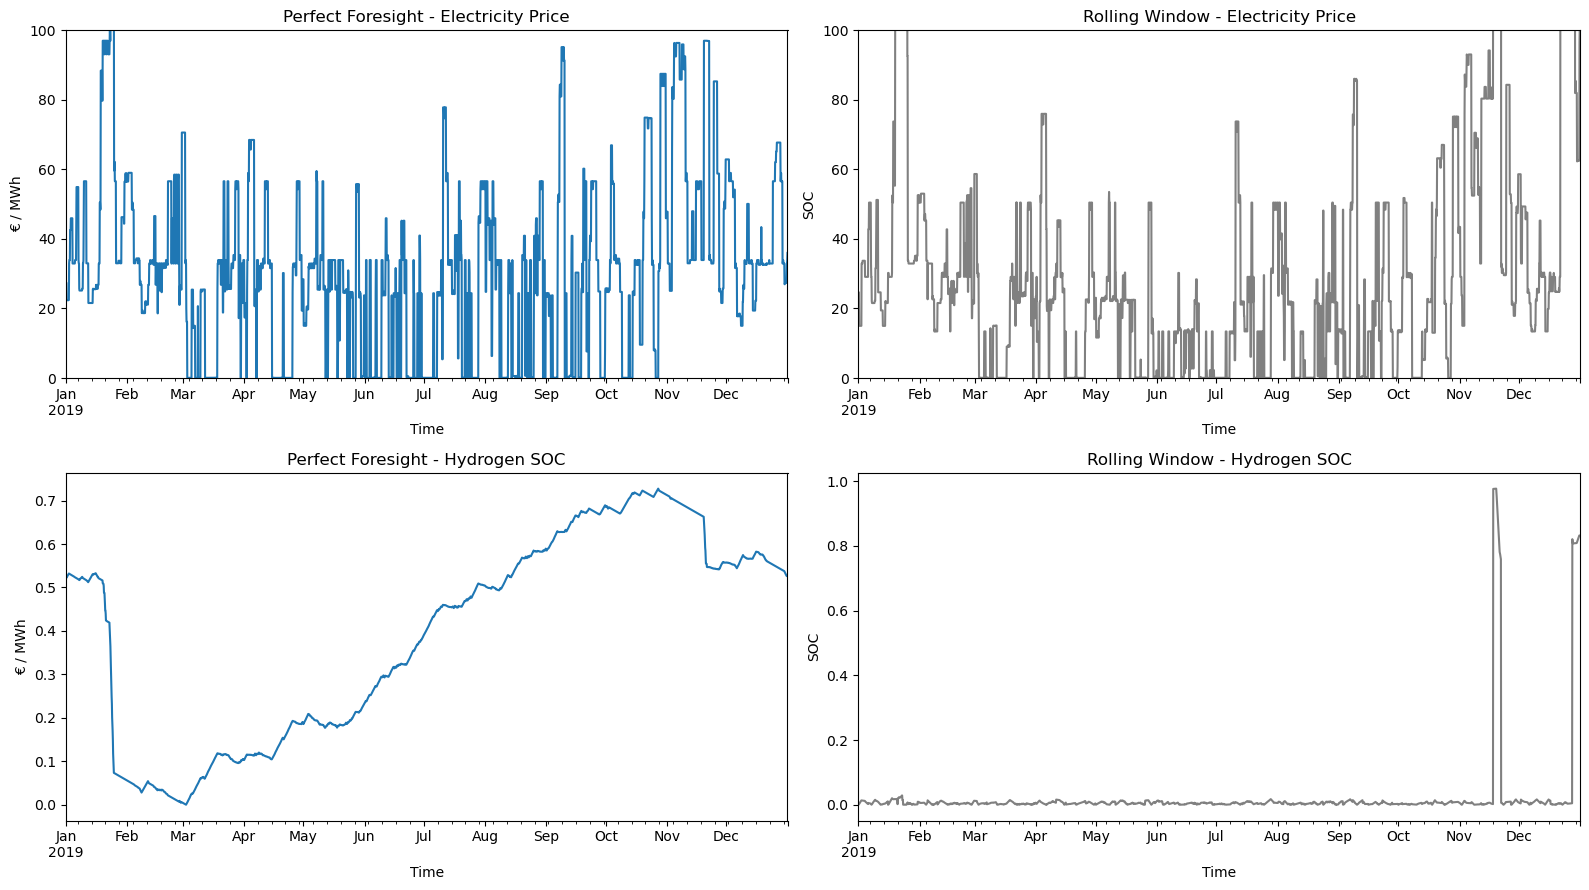

In [14]:
fig, ax = plt.subplots(2,2, figsize=(16,9))

n_perfect_foresight.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0][0],
    ylim=(0, 100),
    title = 'Perfect Foresight - Electricity Price'
)

n.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0][1],
    ylim = (0, 100),
    title = 'Rolling Window - Electricity Price',
    color = 'grey'
)

get_hydrogen_soc(n_perfect_foresight).plot(
    ax = ax[1][0],
    title = 'Perfect Foresight - Hydrogen SOC'
)
get_hydrogen_soc(n).plot(
    ax = ax[1][1],
    title = 'Rolling Window - Hydrogen SOC',
    color = 'grey'

)

ax[0][0].set_xlabel("Time")
ax[1][0].set_xlabel("Time")
ax[0][1].set_xlabel("Time")
ax[1][1].set_xlabel("Time")

ax[0][0].set_ylabel("€ / MWh")
ax[1][0].set_ylabel("€ / MWh")
ax[0][1].set_ylabel("SOC")
ax[1][1].set_ylabel("SOC")

plt.tight_layout()


- sieht nicht komplett anders aus
- hydrogen einen geringeren einfluss als im anderen Modell, deswegen sind die Ergebnisse doch ganz ähnlich.
- allerdings cyclic off und konstanter Wert wird auch gut tun

In [16]:
n_perfect_foresight.stores_t.e['DE0 0 H2 Store-2035'][0]

/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/ipykernel_78882/2927950973.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  n_perfect_foresight.stores_t.e['DE0 0 H2 Store-2035'][0]


7177471.149028538

In [15]:
n = pypsa.Network('base_s_1__none_2035_lt.nc')

# alle hydrogen related stores
stores = n.stores[n.stores.carrier.str.contains("H2", case=False, na=False)].index

# marginal price für alle der mean
for i in stores:
    n.stores.loc[i, 'marginal_cost'] = n_perfect_foresight.buses_t.marginal_price['DE0 0 H2'].mean()


n.stores.loc['DE0 0 H2 Store-2035', 'e_initial'] = 7177471
n.stores.loc['DE0 0 H2 Store-2035', 'e_cyclic'] = False

n.optimize.fix_optimal_capacities()
n.optimize.create_model()

n.optimize.optimize_with_rolling_horizon(
    horizon = 48,
    overlap = 8,
    solver_name = 'gurobi'
)

INFO:pypsa.io:Imported network base_s_1__none_2035_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-01 00:00:00:2019-01-06 21:00:00] (1/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.81it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ivfloumv.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ivfloumv.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x97700621


INFO:gurobipy:Model fingerprint: 0x97700621


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23626 rows and 3351 columns


INFO:gurobipy:Presolve removed 23626 rows and 3351 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1191 rows, 8697 columns, 17231 nonzeros


INFO:gurobipy:Presolved: 1191 rows, 8697 columns, 17231 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.302e+03


INFO:gurobipy: AA' NZ     : 3.302e+03


 Factor NZ  : 2.776e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.776e+04 (roughly 4 MB of memory)


 Factor Ops : 9.673e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.673e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.51064676e+11 -3.55592702e+12  2.59e+06 6.40e+01  3.80e+09     0s


INFO:gurobipy:   0   2.51064676e+11 -3.55592702e+12  2.59e+06 6.40e+01  3.80e+09     0s


   1   2.00219975e+10 -9.11814505e+11  1.18e+05 5.50e-11  2.12e+08     0s


INFO:gurobipy:   1   2.00219975e+10 -9.11814505e+11  1.18e+05 5.50e-11  2.12e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1675    7.5514908e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1675    7.5514908e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1675 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1675 iterations and 0.08 seconds (0.05 work units)


Optimal objective  7.551490763e+08


INFO:gurobipy:Optimal objective  7.551490763e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.55e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-06 00:00:00:2019-01-11 21:00:00] (2/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 225.14it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5k7p7dzx.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5k7p7dzx.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xe4fb7f1c


INFO:gurobipy:Model fingerprint: 0xe4fb7f1c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23627 rows and 3350 columns


INFO:gurobipy:Presolve removed 23627 rows and 3350 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1190 rows, 8698 columns, 17231 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 8698 columns, 17231 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.301e+03


INFO:gurobipy: AA' NZ     : 3.301e+03


 Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


 Factor Ops : 9.001e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.001e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.76801341e+11 -3.56069091e+12  1.89e+06 6.35e+01  2.67e+09     0s


INFO:gurobipy:   0   1.76801341e+11 -3.56069091e+12  1.89e+06 6.35e+01  2.67e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1670    8.3687497e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1670    8.3687497e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1670 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1670 iterations and 0.15 seconds (0.05 work units)


Optimal objective  8.368749671e+08


INFO:gurobipy:Optimal objective  8.368749671e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.37e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-11 00:00:00:2019-01-16 21:00:00] (3/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.71it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lor9_se8.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lor9_se8.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x05e204c1


INFO:gurobipy:Model fingerprint: 0x05e204c1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23627 rows and 3350 columns


INFO:gurobipy:Presolve removed 23627 rows and 3350 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1190 rows, 8698 columns, 17231 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 8698 columns, 17231 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.301e+03


INFO:gurobipy: AA' NZ     : 3.301e+03


 Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


 Factor Ops : 9.001e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.001e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.52424117e+11 -3.59923332e+12  2.76e+06 6.78e+01  3.82e+09     0s


INFO:gurobipy:   0   2.52424117e+11 -3.59923332e+12  2.76e+06 6.78e+01  3.82e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1704    6.0654911e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1704    6.0654911e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1704 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1704 iterations and 0.10 seconds (0.05 work units)


Optimal objective  6.065491052e+08


INFO:gurobipy:Optimal objective  6.065491052e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.07e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-16 00:00:00:2019-01-21 21:00:00] (4/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.46it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-j5elfa62.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-j5elfa62.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x6a95e6f8


INFO:gurobipy:Model fingerprint: 0x6a95e6f8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23628 rows and 3389 columns


INFO:gurobipy:Presolve removed 23628 rows and 3389 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1189 rows, 8659 columns, 17185 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 8659 columns, 17185 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.300e+03


INFO:gurobipy: AA' NZ     : 3.300e+03


 Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


 Factor Ops : 8.921e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.921e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.38074695e+11 -3.67086588e+12  4.02e+06 9.03e+01  5.18e+09     0s


INFO:gurobipy:   0   3.38074695e+11 -3.67086588e+12  4.02e+06 9.03e+01  5.18e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1583    1.0758030e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1583    1.0758030e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1583 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1583 iterations and 0.08 seconds (0.05 work units)


Optimal objective  1.075802988e+09


INFO:gurobipy:Optimal objective  1.075802988e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.08e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-21 00:00:00:2019-01-26 21:00:00] (5/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.29it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_t1gphi5.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_t1gphi5.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xd3a842bb


INFO:gurobipy:Model fingerprint: 0xd3a842bb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23628 rows and 3459 columns


INFO:gurobipy:Presolve removed 23628 rows and 3459 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1189 rows, 8589 columns, 17103 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 8589 columns, 17103 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.300e+03


INFO:gurobipy: AA' NZ     : 3.300e+03


 Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


 Factor Ops : 8.921e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.921e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.21093041e+11 -3.64584680e+12  3.84e+06 1.08e+02  4.96e+09     0s


INFO:gurobipy:   0   3.21093041e+11 -3.64584680e+12  3.84e+06 1.08e+02  4.96e+09     0s


   1   2.43213654e+10 -1.25870068e+12  1.78e+05 5.82e-11  2.88e+08     0s


INFO:gurobipy:   1   2.43213654e+10 -1.25870068e+12  1.78e+05 5.82e-11  2.88e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1603    1.4968861e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1603    1.4968861e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1603 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1603 iterations and 0.09 seconds (0.05 work units)


Optimal objective  1.496886113e+09


INFO:gurobipy:Optimal objective  1.496886113e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.50e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-26 00:00:00:2019-01-31 21:00:00] (6/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.85it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-eep98nao.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-eep98nao.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x3631f1d1


INFO:gurobipy:Model fingerprint: 0x3631f1d1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23618 rows and 3334 columns


INFO:gurobipy:Presolve removed 23618 rows and 3334 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1199 rows, 8714 columns, 17256 nonzeros


INFO:gurobipy:Presolved: 1199 rows, 8714 columns, 17256 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.310e+03


INFO:gurobipy: AA' NZ     : 3.310e+03


 Factor NZ  : 2.750e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.750e+04 (roughly 4 MB of memory)


 Factor Ops : 9.333e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.333e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.23821127e+11 -3.27053201e+12  8.20e+05 6.46e+01  1.87e+09     0s


INFO:gurobipy:   0   1.23821127e+11 -3.27053201e+12  8.20e+05 6.46e+01  1.87e+09     0s


   1   1.35173966e+10 -7.03114116e+11  3.62e+04 4.68e-11  1.11e+08     0s


INFO:gurobipy:   1   1.35173966e+10 -7.03114116e+11  3.62e+04 4.68e-11  1.11e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1619    8.9936807e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1619    8.9936807e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1619 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1619 iterations and 0.09 seconds (0.05 work units)


Optimal objective  8.993680748e+08


INFO:gurobipy:Optimal objective  8.993680748e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.99e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-31 00:00:00:2019-02-05 21:00:00] (7/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.40it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-afzz846i.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-afzz846i.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xb83867ce


INFO:gurobipy:Model fingerprint: 0xb83867ce


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23617 rows and 3325 columns


INFO:gurobipy:Presolve removed 23617 rows and 3325 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1200 rows, 8723 columns, 17266 nonzeros


INFO:gurobipy:Presolved: 1200 rows, 8723 columns, 17266 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.311e+03


INFO:gurobipy: AA' NZ     : 3.311e+03


 Factor NZ  : 2.894e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.894e+04 (roughly 4 MB of memory)


 Factor Ops : 1.113e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.113e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.63743713e+11 -3.25385834e+12  1.11e+06 6.48e+01  2.47e+09     0s


INFO:gurobipy:   0   1.63743713e+11 -3.25385834e+12  1.11e+06 6.48e+01  2.47e+09     0s


   1   1.58029832e+10 -7.31258805e+11  5.03e+04 5.18e-11  1.41e+08     0s


INFO:gurobipy:   1   1.58029832e+10 -7.31258805e+11  5.03e+04 5.18e-11  1.41e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1699    1.0349538e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1699    1.0349538e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1699 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1699 iterations and 0.09 seconds (0.05 work units)


Optimal objective  1.034953780e+09


INFO:gurobipy:Optimal objective  1.034953780e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.03e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-05 00:00:00:2019-02-10 21:00:00] (8/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.27it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-axclw42y.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-axclw42y.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x07cb9cb1


INFO:gurobipy:Model fingerprint: 0x07cb9cb1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23617 rows and 3297 columns


INFO:gurobipy:Presolve removed 23617 rows and 3297 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1200 rows, 8751 columns, 17294 nonzeros


INFO:gurobipy:Presolved: 1200 rows, 8751 columns, 17294 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.311e+03


INFO:gurobipy: AA' NZ     : 3.311e+03


 Factor NZ  : 2.894e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.894e+04 (roughly 4 MB of memory)


 Factor Ops : 1.113e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.113e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.70748385e+11 -3.24502669e+12  1.16e+06 6.32e+01  2.57e+09     0s


INFO:gurobipy:   0   1.70748385e+11 -3.24502669e+12  1.16e+06 6.32e+01  2.57e+09     0s


   1   1.57072945e+10 -7.62743365e+11  5.24e+04 5.43e-11  1.47e+08     0s


INFO:gurobipy:   1   1.57072945e+10 -7.62743365e+11  5.24e+04 5.43e-11  1.47e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1750    6.7361210e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1750    6.7361210e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1750 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1750 iterations and 0.09 seconds (0.05 work units)


Optimal objective  6.736120968e+08


INFO:gurobipy:Optimal objective  6.736120968e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.74e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-10 00:00:00:2019-02-15 21:00:00] (9/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.29it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9pw_woiz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9pw_woiz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x6b1b33fe


INFO:gurobipy:Model fingerprint: 0x6b1b33fe


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23618 rows and 3290 columns


INFO:gurobipy:Presolve removed 23618 rows and 3290 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1199 rows, 8758 columns, 17300 nonzeros


INFO:gurobipy:Presolved: 1199 rows, 8758 columns, 17300 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.310e+03


INFO:gurobipy: AA' NZ     : 3.310e+03


 Factor NZ  : 2.750e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.750e+04 (roughly 4 MB of memory)


 Factor Ops : 9.333e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.333e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.26755469e+11 -3.29843664e+12  8.39e+05 6.10e+01  1.91e+09     0s


INFO:gurobipy:   0   1.26755469e+11 -3.29843664e+12  8.39e+05 6.10e+01  1.91e+09     0s


   1   1.34204371e+10 -7.18479569e+11  3.73e+04 4.70e-11  1.14e+08     0s


INFO:gurobipy:   1   1.34204371e+10 -7.18479569e+11  3.73e+04 4.70e-11  1.14e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1695    6.8282062e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1695    6.8282062e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1695 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1695 iterations and 0.09 seconds (0.05 work units)


Optimal objective  6.828206160e+08


INFO:gurobipy:Optimal objective  6.828206160e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.83e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-15 00:00:00:2019-02-20 21:00:00] (10/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.86it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-uxxwtp69.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-uxxwtp69.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x4ad4b89e


INFO:gurobipy:Model fingerprint: 0x4ad4b89e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23619 rows and 3282 columns


INFO:gurobipy:Presolve removed 23619 rows and 3282 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1198 rows, 8766 columns, 17307 nonzeros


INFO:gurobipy:Presolved: 1198 rows, 8766 columns, 17307 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.309e+03


INFO:gurobipy: AA' NZ     : 3.309e+03


 Factor NZ  : 2.761e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.761e+04 (roughly 4 MB of memory)


 Factor Ops : 9.520e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.520e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.83074889e+11 -3.33057254e+12  1.25e+06 6.04e+01  2.76e+09     0s


INFO:gurobipy:   0   1.83074889e+11 -3.33057254e+12  1.25e+06 6.04e+01  2.76e+09     0s


   1   1.63756928e+10 -7.80977882e+11  5.67e+04 5.09e-11  1.57e+08     0s


INFO:gurobipy:   1   1.63756928e+10 -7.80977882e+11  5.67e+04 5.09e-11  1.57e+08     0s


   2   4.65018867e+09 -1.77069624e+11  2.62e+03 1.77e-09  1.46e+07     0s


INFO:gurobipy:   2   4.65018867e+09 -1.77069624e+11  2.62e+03 1.77e-09  1.46e+07     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1769    6.3953866e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1769    6.3953866e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1769 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1769 iterations and 0.10 seconds (0.05 work units)


Optimal objective  6.395386567e+08


INFO:gurobipy:Optimal objective  6.395386567e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.40e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-20 00:00:00:2019-02-25 21:00:00] (11/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.41it/s]
INFO:linopy.io: Writing time: 0.29s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-gpcgul1z.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-gpcgul1z.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x3fde8e8b


INFO:gurobipy:Model fingerprint: 0x3fde8e8b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23620 rows and 3289 columns


INFO:gurobipy:Presolve removed 23620 rows and 3289 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1197 rows, 8759 columns, 17299 nonzeros


INFO:gurobipy:Presolved: 1197 rows, 8759 columns, 17299 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.308e+03


INFO:gurobipy: AA' NZ     : 3.308e+03


 Factor NZ  : 2.765e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.765e+04 (roughly 4 MB of memory)


 Factor Ops : 9.498e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.498e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.97050068e+11 -3.35035632e+12  1.36e+06 7.06e+01  2.97e+09     0s


INFO:gurobipy:   0   1.97050068e+11 -3.35035632e+12  1.36e+06 7.06e+01  2.97e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1624    7.8531666e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1624    7.8531666e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1624 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1624 iterations and 0.09 seconds (0.05 work units)


Optimal objective  7.853166634e+08


INFO:gurobipy:Optimal objective  7.853166634e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.85e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-25 00:00:00:2019-03-02 21:00:00] (12/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.77it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-eawbc9uc.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-eawbc9uc.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x752d286c


INFO:gurobipy:Model fingerprint: 0x752d286c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23620 rows and 3292 columns


INFO:gurobipy:Presolve removed 23620 rows and 3292 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1197 rows, 8756 columns, 17296 nonzeros


INFO:gurobipy:Presolved: 1197 rows, 8756 columns, 17296 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.308e+03


INFO:gurobipy: AA' NZ     : 3.308e+03


 Factor NZ  : 2.765e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.765e+04 (roughly 4 MB of memory)


 Factor Ops : 9.498e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.498e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.85986451e+11 -3.34860805e+12  1.28e+06 7.04e+01  2.80e+09     0s


INFO:gurobipy:   0   1.85986451e+11 -3.34860805e+12  1.28e+06 7.04e+01  2.80e+09     0s


   1   1.67258319e+10 -7.77720142e+11  5.81e+04 5.71e-11  1.59e+08     0s


INFO:gurobipy:   1   1.67258319e+10 -7.77720142e+11  5.81e+04 5.71e-11  1.59e+08     0s


   2   5.34386854e+09 -1.72036902e+11  3.06e+03 2.77e-09  1.51e+07     0s


INFO:gurobipy:   2   5.34386854e+09 -1.72036902e+11  3.06e+03 2.77e-09  1.51e+07     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1756    7.7579390e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1756    7.7579390e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1756 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1756 iterations and 0.11 seconds (0.05 work units)


Optimal objective  7.757938959e+08


INFO:gurobipy:Optimal objective  7.757938959e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.76e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-02 00:00:00:2019-03-07 21:00:00] (13/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.48it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2ax5ebqz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2ax5ebqz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xa04c1fa6


INFO:gurobipy:Model fingerprint: 0xa04c1fa6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23620 rows and 3289 columns


INFO:gurobipy:Presolve removed 23620 rows and 3289 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1197 rows, 8759 columns, 17299 nonzeros


INFO:gurobipy:Presolved: 1197 rows, 8759 columns, 17299 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.308e+03


INFO:gurobipy: AA' NZ     : 3.308e+03


 Factor NZ  : 2.765e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.765e+04 (roughly 4 MB of memory)


 Factor Ops : 9.498e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.498e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.00538497e+11 -3.40997321e+12  1.39e+06 6.05e+01  3.03e+09     0s


INFO:gurobipy:   0   2.00538497e+11 -3.40997321e+12  1.39e+06 6.05e+01  3.03e+09     0s


   1   1.70042449e+10 -8.31037026e+11  6.29e+04 5.38e-11  1.72e+08     0s


INFO:gurobipy:   1   1.70042449e+10 -8.31037026e+11  6.29e+04 5.38e-11  1.72e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1815    5.0777619e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1815    5.0777619e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1815 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1815 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.077761914e+08


INFO:gurobipy:Optimal objective  5.077761914e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.08e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-07 00:00:00:2019-03-12 21:00:00] (14/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.03it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3qjd26c3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3qjd26c3.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x949dede1


INFO:gurobipy:Model fingerprint: 0x949dede1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23623 rows and 3288 columns


INFO:gurobipy:Presolve removed 23623 rows and 3288 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1194 rows, 8760 columns, 17297 nonzeros


INFO:gurobipy:Presolved: 1194 rows, 8760 columns, 17297 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.305e+03


INFO:gurobipy: AA' NZ     : 3.305e+03


 Factor NZ  : 2.673e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.673e+04 (roughly 4 MB of memory)


 Factor Ops : 8.583e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.583e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.21130703e+11 -3.48224980e+12  1.84e+06 6.09e+01  3.34e+09     0s


INFO:gurobipy:   0   2.21130703e+11 -3.48224980e+12  1.84e+06 6.09e+01  3.34e+09     0s


   1   1.80814762e+10 -8.72563183e+11  8.36e+04 4.37e-11  1.88e+08     0s


INFO:gurobipy:   1   1.80814762e+10 -8.72563183e+11  8.36e+04 4.37e-11  1.88e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1657    5.1389043e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1657    5.1389043e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1657 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1657 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.138904337e+08


INFO:gurobipy:Optimal objective  5.138904337e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.14e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-12 00:00:00:2019-03-17 21:00:00] (15/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.52it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fkwivy_9.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-fkwivy_9.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xb50f7655


INFO:gurobipy:Model fingerprint: 0xb50f7655


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 6e+02]


INFO:gurobipy:  Bounds range     [4e+02, 6e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23625 rows and 3289 columns


INFO:gurobipy:Presolve removed 23625 rows and 3289 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1192 rows, 8759 columns, 17294 nonzeros


INFO:gurobipy:Presolved: 1192 rows, 8759 columns, 17294 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.303e+03


INFO:gurobipy: AA' NZ     : 3.303e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 9.678e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.678e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.56283777e+11 -3.58174295e+12  2.48e+06 6.06e+01  3.88e+09     0s


INFO:gurobipy:   0   2.56283777e+11 -3.58174295e+12  2.48e+06 6.06e+01  3.88e+09     0s


   1   1.97955088e+10 -9.46022075e+11  1.13e+05 5.29e-11  2.17e+08     0s


INFO:gurobipy:   1   1.97955088e+10 -9.46022075e+11  1.13e+05 5.29e-11  2.17e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1675    4.8519081e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1675    4.8519081e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1675 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1675 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.851908090e+08


INFO:gurobipy:Optimal objective  4.851908090e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.85e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-17 00:00:00:2019-03-22 21:00:00] (16/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.62it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2w1w0l12.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2w1w0l12.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xd1dec8e8


INFO:gurobipy:Model fingerprint: 0xd1dec8e8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [6e+02, 7e+02]


INFO:gurobipy:  Bounds range     [6e+02, 7e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23627 rows and 3300 columns


INFO:gurobipy:Presolve removed 23627 rows and 3300 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1190 rows, 8748 columns, 17281 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 8748 columns, 17281 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.301e+03


INFO:gurobipy: AA' NZ     : 3.301e+03


 Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


 Factor Ops : 9.001e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.001e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.81902570e+11 -3.63995692e+12  1.95e+06 7.04e+01  2.76e+09     0s


INFO:gurobipy:   0   1.81902570e+11 -3.63995692e+12  1.95e+06 7.04e+01  2.76e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1588    6.0415134e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1588    6.0415134e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1588 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1588 iterations and 0.10 seconds (0.05 work units)


Optimal objective  6.041513449e+08


INFO:gurobipy:Optimal objective  6.041513449e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.04e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-22 00:00:00:2019-03-27 21:00:00] (17/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.67it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8ws86gi6.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8ws86gi6.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xc175782f


INFO:gurobipy:Model fingerprint: 0xc175782f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 7e+02]


INFO:gurobipy:  Bounds range     [5e+02, 7e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23628 rows and 3307 columns


INFO:gurobipy:Presolve removed 23628 rows and 3307 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1189 rows, 8741 columns, 17273 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 8741 columns, 17273 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.300e+03


INFO:gurobipy: AA' NZ     : 3.300e+03


 Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


 Factor Ops : 8.921e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.921e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.49878927e+11 -3.64545752e+12  2.89e+06 7.65e+01  3.79e+09     0s


INFO:gurobipy:   0   2.49878927e+11 -3.64545752e+12  2.89e+06 7.65e+01  3.79e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1610    6.4090882e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1610    6.4090882e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1610 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1610 iterations and 0.10 seconds (0.05 work units)


Optimal objective  6.409088216e+08


INFO:gurobipy:Optimal objective  6.409088216e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.41e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-27 00:00:00:2019-04-01 21:00:00] (18/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.02it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8tib1j6v.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8tib1j6v.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x2482a28d


INFO:gurobipy:Model fingerprint: 0x2482a28d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23628 rows and 3298 columns


INFO:gurobipy:Presolve removed 23628 rows and 3298 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1189 rows, 8750 columns, 17282 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 8750 columns, 17282 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.300e+03


INFO:gurobipy: AA' NZ     : 3.300e+03


 Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


 Factor Ops : 8.921e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.921e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.45656228e+11 -3.79006498e+12  4.07e+06 6.08e+01  5.24e+09     0s


INFO:gurobipy:   0   3.45656228e+11 -3.79006498e+12  4.07e+06 6.08e+01  5.24e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1563    6.1496496e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1563    6.1496496e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1563 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1563 iterations and 0.11 seconds (0.05 work units)


Optimal objective  6.149649597e+08


INFO:gurobipy:Optimal objective  6.149649597e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.15e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-01 00:00:00:2019-04-06 21:00:00] (19/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.88it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0vpyj6pp.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0vpyj6pp.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x6cec7caa


INFO:gurobipy:Model fingerprint: 0x6cec7caa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23629 rows and 3293 columns


INFO:gurobipy:Presolve removed 23629 rows and 3293 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1188 rows, 8755 columns, 17286 nonzeros


INFO:gurobipy:Presolved: 1188 rows, 8755 columns, 17286 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.299e+03


INFO:gurobipy: AA' NZ     : 3.299e+03


 Factor NZ  : 2.872e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.872e+04 (roughly 4 MB of memory)


 Factor Ops : 1.087e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.087e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.53119125e+11 -3.93716373e+12  4.40e+06 5.76e+01  5.38e+09     0s


INFO:gurobipy:   0   3.53119125e+11 -3.93716373e+12  4.40e+06 5.76e+01  5.38e+09     0s


   1   3.59843339e+10 -1.20268273e+12  3.41e+05 6.18e-11  4.59e+08     0s


INFO:gurobipy:   1   3.59843339e+10 -1.20268273e+12  3.41e+05 6.18e-11  4.59e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1625    6.8672948e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1625    6.8672948e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1625 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1625 iterations and 0.11 seconds (0.05 work units)


Optimal objective  6.867294824e+08


INFO:gurobipy:Optimal objective  6.867294824e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-06 00:00:00:2019-04-11 21:00:00] (20/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.48it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-puyvhnr0.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-puyvhnr0.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x0d634d7e


INFO:gurobipy:Model fingerprint: 0x0d634d7e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23630 rows and 3290 columns


INFO:gurobipy:Presolve removed 23630 rows and 3290 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1187 rows, 8758 columns, 17288 nonzeros


INFO:gurobipy:Presolved: 1187 rows, 8758 columns, 17288 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.298e+03


INFO:gurobipy: AA' NZ     : 3.298e+03


 Factor NZ  : 2.798e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.798e+04 (roughly 4 MB of memory)


 Factor Ops : 1.018e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.018e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.63579241e+11 -3.98326449e+12  3.43e+06 5.64e+01  4.04e+09     0s


INFO:gurobipy:   0   2.63579241e+11 -3.98326449e+12  3.43e+06 5.64e+01  4.04e+09     0s


   1   3.22545806e+10 -9.23068405e+11  3.15e+05 5.82e-11  3.93e+08     0s


INFO:gurobipy:   1   3.22545806e+10 -9.23068405e+11  3.15e+05 5.82e-11  3.93e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1652    5.8945144e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1652    5.8945144e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1652 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1652 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.894514417e+08


INFO:gurobipy:Optimal objective  5.894514417e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.89e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-11 00:00:00:2019-04-16 21:00:00] (21/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.60it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ux6n2pd2.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ux6n2pd2.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x5006130a


INFO:gurobipy:Model fingerprint: 0x5006130a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23631 rows and 3273 columns


INFO:gurobipy:Presolve removed 23631 rows and 3273 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1186 rows, 8775 columns, 17304 nonzeros


INFO:gurobipy:Presolved: 1186 rows, 8775 columns, 17304 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.297e+03


INFO:gurobipy: AA' NZ     : 3.297e+03


 Factor NZ  : 2.824e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.824e+04 (roughly 4 MB of memory)


 Factor Ops : 1.041e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.041e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.05901312e+11 -3.94382207e+12  4.17e+06 5.78e+01  4.64e+09     0s


INFO:gurobipy:   0   3.05901312e+11 -3.94382207e+12  4.17e+06 5.78e+01  4.64e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1570    6.7862512e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1570    6.7862512e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1570 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1570 iterations and 0.09 seconds (0.05 work units)


Optimal objective  6.786251168e+08


INFO:gurobipy:Optimal objective  6.786251168e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.79e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-16 00:00:00:2019-04-21 21:00:00] (22/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.27it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wb9cicnn.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wb9cicnn.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x8a5f4f69


INFO:gurobipy:Model fingerprint: 0x8a5f4f69


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23630 rows and 3372 columns


INFO:gurobipy:Presolve removed 23630 rows and 3372 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1187 rows, 8676 columns, 17144 nonzeros


INFO:gurobipy:Presolved: 1187 rows, 8676 columns, 17144 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.298e+03


INFO:gurobipy: AA' NZ     : 3.298e+03


 Factor NZ  : 2.798e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.798e+04 (roughly 4 MB of memory)


 Factor Ops : 1.018e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.018e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.06319016e+11 -3.97888533e+12  2.68e+06 3.38e+02  3.19e+09     0s


INFO:gurobipy:   0   2.06319016e+11 -3.97888533e+12  2.68e+06 3.38e+02  3.19e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1503    4.7119860e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1503    4.7119860e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1503 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1503 iterations and 0.09 seconds (0.05 work units)


Optimal objective  4.711986034e+08


INFO:gurobipy:Optimal objective  4.711986034e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.71e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-21 00:00:00:2019-04-26 21:00:00] (23/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.40it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_ex1t8_a.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_ex1t8_a.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x7dbbc787


INFO:gurobipy:Model fingerprint: 0x7dbbc787


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23622 rows and 3443 columns


INFO:gurobipy:Presolve removed 23622 rows and 3443 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1195 rows, 8605 columns, 20038 nonzeros


INFO:gurobipy:Presolved: 1195 rows, 8605 columns, 20038 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.924e+03


INFO:gurobipy: AA' NZ     : 3.924e+03


 Factor NZ  : 2.934e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.934e+04 (roughly 4 MB of memory)


 Factor Ops : 1.130e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.130e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.68014939e+12 -5.64517508e+12  9.07e+08 4.53e+02  1.48e+11     0s


INFO:gurobipy:   0   9.68014939e+12 -5.64517508e+12  9.07e+08 4.53e+02  1.48e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1475    4.8397756e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1475    4.8397756e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1475 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1475 iterations and 0.08 seconds (0.05 work units)


Optimal objective  4.839775635e+08


INFO:gurobipy:Optimal objective  4.839775635e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-26 00:00:00:2019-05-01 21:00:00] (24/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.98it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6g8nkzhz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6g8nkzhz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xa9e597ce


INFO:gurobipy:Model fingerprint: 0xa9e597ce


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23617 rows and 3274 columns


INFO:gurobipy:Presolve removed 23617 rows and 3274 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1200 rows, 8774 columns, 20350 nonzeros


INFO:gurobipy:Presolved: 1200 rows, 8774 columns, 20350 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.935e+03


INFO:gurobipy: AA' NZ     : 3.935e+03


 Factor NZ  : 2.934e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.934e+04 (roughly 4 MB of memory)


 Factor Ops : 1.161e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.161e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.12177899e+13 -7.18403227e+12  7.29e+08 5.68e+01  1.70e+11     0s


INFO:gurobipy:   0   1.12177899e+13 -7.18403227e+12  7.29e+08 5.68e+01  1.70e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1561    5.8702358e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1561    5.8702358e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1561 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1561 iterations and 0.09 seconds (0.05 work units)


Optimal objective  5.870235849e+08


INFO:gurobipy:Optimal objective  5.870235849e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-01 00:00:00:2019-05-06 21:00:00] (25/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.42it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-as7t878t.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-as7t878t.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xa4619cfb


INFO:gurobipy:Model fingerprint: 0xa4619cfb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23616 rows and 3249 columns


INFO:gurobipy:Presolve removed 23616 rows and 3249 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1201 rows, 8799 columns, 20376 nonzeros


INFO:gurobipy:Presolved: 1201 rows, 8799 columns, 20376 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.937e+03


INFO:gurobipy: AA' NZ     : 3.937e+03


 Factor NZ  : 2.722e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.722e+04 (roughly 4 MB of memory)


 Factor Ops : 9.132e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.132e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.03921470e+13 -7.19617593e+12  4.65e+08 5.38e+01  1.57e+11     0s


INFO:gurobipy:   0   1.03921470e+13 -7.19617593e+12  4.65e+08 5.38e+01  1.57e+11     0s


   1   8.87167381e+11 -4.94830387e+12  3.85e+07 1.22e+04  1.34e+10     0s


INFO:gurobipy:   1   8.87167381e+11 -4.94830387e+12  3.85e+07 1.22e+04  1.34e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1599    5.6026074e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1599    5.6026074e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1599 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1599 iterations and 0.09 seconds (0.05 work units)


Optimal objective  5.602607385e+08


INFO:gurobipy:Optimal objective  5.602607385e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.60e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-06 00:00:00:2019-05-11 21:00:00] (26/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.36it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vm6k086o.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vm6k086o.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x64b9387b


INFO:gurobipy:Model fingerprint: 0x64b9387b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3238 columns


INFO:gurobipy:Presolve removed 23608 rows and 3238 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8810 columns, 20395 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8810 columns, 20395 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.05656642e+13 -7.48906495e+12  4.74e+08 6.44e+01  1.60e+11     0s


INFO:gurobipy:   0   1.05656642e+13 -7.48906495e+12  4.74e+08 6.44e+01  1.60e+11     0s


   1   8.88901699e+11 -5.41502519e+12  3.86e+07 1.18e+04  1.34e+10     0s


INFO:gurobipy:   1   8.88901699e+11 -5.41502519e+12  3.86e+07 1.18e+04  1.34e+10     0s


   2   7.45055343e+10 -1.92510444e+12  2.88e+06 6.69e-11  1.07e+09     0s


INFO:gurobipy:   2   7.45055343e+10 -1.92510444e+12  2.88e+06 6.69e-11  1.07e+09     0s


   3   9.42747703e+09 -4.75228858e+11  1.34e+05 1.33e-10  6.97e+07     0s


INFO:gurobipy:   3   9.42747703e+09 -4.75228858e+11  1.34e+05 1.33e-10  6.97e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1652    6.2144359e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1652    6.2144359e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1652 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1652 iterations and 0.11 seconds (0.06 work units)


Optimal objective  6.214435865e+08


INFO:gurobipy:Optimal objective  6.214435865e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.21e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-11 00:00:00:2019-05-16 21:00:00] (27/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.00it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ktpprs7d.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ktpprs7d.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xbe919311


INFO:gurobipy:Model fingerprint: 0xbe919311


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3210 columns


INFO:gurobipy:Presolve removed 23608 rows and 3210 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8838 columns, 20423 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8838 columns, 20423 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.08466254e+13 -7.47082462e+12  4.84e+08 5.37e+01  1.64e+11     0s


INFO:gurobipy:   0   1.08466254e+13 -7.47082462e+12  4.84e+08 5.37e+01  1.64e+11     0s


   1   8.89639731e+11 -5.42530541e+12  3.86e+07 1.22e+04  1.34e+10     0s


INFO:gurobipy:   1   8.89639731e+11 -5.42530541e+12  3.86e+07 1.22e+04  1.34e+10     0s


   2   7.27614181e+10 -1.93329185e+12  2.79e+06 7.82e-11  1.04e+09     0s


INFO:gurobipy:   2   7.27614181e+10 -1.93329185e+12  2.79e+06 7.82e-11  1.04e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1781    5.7010195e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1781    5.7010195e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1781 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1781 iterations and 0.10 seconds (0.06 work units)


Optimal objective  5.701019471e+08


INFO:gurobipy:Optimal objective  5.701019471e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.70e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-16 00:00:00:2019-05-21 21:00:00] (28/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.42it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-oo1y81tq.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-oo1y81tq.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x7beb275a


INFO:gurobipy:Model fingerprint: 0x7beb275a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 5e+02]


INFO:gurobipy:  Bounds range     [2e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3349 columns


INFO:gurobipy:Presolve removed 23608 rows and 3349 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8699 columns, 20182 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8699 columns, 20182 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.08118313e+13 -7.44770507e+12  4.90e+08 3.77e+02  1.65e+11     0s


INFO:gurobipy:   0   1.08118313e+13 -7.44770507e+12  4.90e+08 3.77e+02  1.65e+11     0s


   1   9.98136387e+11 -5.15869622e+12  4.29e+07 1.25e+04  1.49e+10     0s


INFO:gurobipy:   1   9.98136387e+11 -5.15869622e+12  4.29e+07 1.25e+04  1.49e+10     0s


   2   8.59414995e+10 -2.01512972e+12  3.31e+06 6.46e-11  1.24e+09     0s


INFO:gurobipy:   2   8.59414995e+10 -2.01512972e+12  3.31e+06 6.46e-11  1.24e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1666    5.2312947e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1666    5.2312947e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1666 iterations and 0.13 seconds (0.06 work units)


INFO:gurobipy:Solved in 1666 iterations and 0.13 seconds (0.06 work units)


Optimal objective  5.231294742e+08


INFO:gurobipy:Optimal objective  5.231294742e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.23e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-21 00:00:00:2019-05-26 21:00:00] (29/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.81it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-kg0wayep.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-kg0wayep.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x08b171e2


INFO:gurobipy:Model fingerprint: 0x08b171e2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3366 columns


INFO:gurobipy:Presolve removed 23608 rows and 3366 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8682 columns, 20147 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8682 columns, 20147 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.09219129e+13 -7.45341907e+12  4.96e+08 3.77e+02  1.66e+11     0s


INFO:gurobipy:   0   1.09219129e+13 -7.45341907e+12  4.96e+08 3.77e+02  1.66e+11     0s


   1   1.04848847e+12 -5.37511171e+12  4.50e+07 1.20e+04  1.55e+10     0s


INFO:gurobipy:   1   1.04848847e+12 -5.37511171e+12  4.50e+07 1.20e+04  1.55e+10     0s


   2   8.87563582e+10 -2.08822724e+12  3.50e+06 6.06e-11  1.30e+09     0s


INFO:gurobipy:   2   8.87563582e+10 -2.08822724e+12  3.50e+06 6.06e-11  1.30e+09     0s


   3   9.23740720e+09 -4.80686041e+11  1.38e+05 7.82e-11  7.22e+07     0s


INFO:gurobipy:   3   9.23740720e+09 -4.80686041e+11  1.38e+05 7.82e-11  7.22e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1709    4.8024994e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1709    4.8024994e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1709 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1709 iterations and 0.10 seconds (0.06 work units)


Optimal objective  4.802499354e+08


INFO:gurobipy:Optimal objective  4.802499354e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.80e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-26 00:00:00:2019-05-31 21:00:00] (30/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.03it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5qlj7p_o.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5qlj7p_o.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xa6f4aab2


INFO:gurobipy:Model fingerprint: 0xa6f4aab2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 5e+02]


INFO:gurobipy:  Bounds range     [3e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3386 columns


INFO:gurobipy:Presolve removed 23608 rows and 3386 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8662 columns, 20101 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8662 columns, 20101 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.10771080e+13 -7.45120993e+12  5.03e+08 4.43e+02  1.69e+11     0s


INFO:gurobipy:   0   1.10771080e+13 -7.45120993e+12  5.03e+08 4.43e+02  1.69e+11     0s


   1   1.07671361e+12 -5.33266422e+12  4.60e+07 1.19e+04  1.58e+10     0s


INFO:gurobipy:   1   1.07671361e+12 -5.33266422e+12  4.60e+07 1.19e+04  1.58e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1523    5.0279178e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1523    5.0279178e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1523 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1523 iterations and 0.10 seconds (0.06 work units)


Optimal objective  5.027917816e+08


INFO:gurobipy:Optimal objective  5.027917816e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.03e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-31 00:00:00:2019-06-05 21:00:00] (31/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.13it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_82l8cal.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_82l8cal.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xf7796dfa


INFO:gurobipy:Model fingerprint: 0xf7796dfa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3487 columns


INFO:gurobipy:Presolve removed 23608 rows and 3487 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8561 columns, 19906 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8561 columns, 19906 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.11423754e+13 -7.43222791e+12  5.06e+08 4.38e+02  1.69e+11     0s


INFO:gurobipy:   0   1.11423754e+13 -7.43222791e+12  5.06e+08 4.38e+02  1.69e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1571    4.8593696e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1571    4.8593696e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1571 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1571 iterations and 0.10 seconds (0.05 work units)


Optimal objective  4.859369583e+08


INFO:gurobipy:Optimal objective  4.859369583e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.86e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-05 00:00:00:2019-06-10 21:00:00] (32/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.69it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-a74_6p3m.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-a74_6p3m.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x7c610137


INFO:gurobipy:Model fingerprint: 0x7c610137


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3489 columns


INFO:gurobipy:Presolve removed 23608 rows and 3489 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8559 columns, 19904 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8559 columns, 19904 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.12093378e+13 -7.44063323e+12  5.09e+08 4.34e+02  1.70e+11     0s


INFO:gurobipy:   0   1.12093378e+13 -7.44063323e+12  5.09e+08 4.34e+02  1.70e+11     0s


   1   1.18182262e+12 -5.40628398e+12  4.99e+07 1.28e+04  1.71e+10     0s


INFO:gurobipy:   1   1.18182262e+12 -5.40628398e+12  4.99e+07 1.28e+04  1.71e+10     0s


   2   8.74916800e+10 -2.18867528e+12  3.39e+06 5.75e-11  1.26e+09     0s


INFO:gurobipy:   2   8.74916800e+10 -2.18867528e+12  3.39e+06 5.75e-11  1.26e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1739    4.8314471e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1739    4.8314471e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1739 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1739 iterations and 0.10 seconds (0.06 work units)


Optimal objective  4.831447140e+08


INFO:gurobipy:Optimal objective  4.831447140e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.83e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-10 00:00:00:2019-06-15 21:00:00] (33/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.91it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-eeua6x4o.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-eeua6x4o.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x9fc72d89


INFO:gurobipy:Model fingerprint: 0x9fc72d89


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3517 columns


INFO:gurobipy:Presolve removed 23608 rows and 3517 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8531 columns, 19840 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8531 columns, 19840 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.13335741e+13 -7.43702898e+12  5.15e+08 4.32e+02  1.72e+11     0s


INFO:gurobipy:   0   1.13335741e+13 -7.43702898e+12  5.15e+08 4.32e+02  1.72e+11     0s


   1   1.20180858e+12 -5.36990676e+12  5.13e+07 1.26e+04  1.75e+10     0s


INFO:gurobipy:   1   1.20180858e+12 -5.36990676e+12  5.13e+07 1.26e+04  1.75e+10     0s


   2   8.73208344e+10 -2.19921291e+12  3.41e+06 5.77e-11  1.27e+09     0s


INFO:gurobipy:   2   8.73208344e+10 -2.19921291e+12  3.41e+06 5.77e-11  1.27e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1672    4.9512750e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1672    4.9512750e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1672 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1672 iterations and 0.11 seconds (0.06 work units)


Optimal objective  4.951275024e+08


INFO:gurobipy:Optimal objective  4.951275024e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.95e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-15 00:00:00:2019-06-20 21:00:00] (34/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.24it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4bw17kn2.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4bw17kn2.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x94f86b63


INFO:gurobipy:Model fingerprint: 0x94f86b63


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3579 columns


INFO:gurobipy:Presolve removed 23608 rows and 3579 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8469 columns, 19718 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8469 columns, 19718 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.14759904e+13 -7.42585331e+12  5.22e+08 4.75e+02  1.73e+11     0s


INFO:gurobipy:   0   1.14759904e+13 -7.42585331e+12  5.22e+08 4.75e+02  1.73e+11     0s


   1   1.14758516e+12 -5.35524325e+12  4.95e+07 1.27e+04  1.69e+10     0s


INFO:gurobipy:   1   1.14758516e+12 -5.35524325e+12  4.95e+07 1.27e+04  1.69e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1630    4.9480145e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1630    4.9480145e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1630 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1630 iterations and 0.12 seconds (0.06 work units)


Optimal objective  4.948014488e+08


INFO:gurobipy:Optimal objective  4.948014488e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.95e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-20 00:00:00:2019-06-25 21:00:00] (35/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.70it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_x32vxwm.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_x32vxwm.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xddcae791


INFO:gurobipy:Model fingerprint: 0xddcae791


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3573 columns


INFO:gurobipy:Presolve removed 23608 rows and 3573 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8475 columns, 19724 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8475 columns, 19724 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1618    4.9613606e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1618    4.9613606e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1618 iterations and 0.13 seconds (0.06 work units)


INFO:gurobipy:Solved in 1618 iterations and 0.13 seconds (0.06 work units)


Optimal objective  4.961360643e+08


INFO:gurobipy:Optimal objective  4.961360643e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.96e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-25 00:00:00:2019-06-30 21:00:00] (36/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.28it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4k9jofic.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4k9jofic.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x801460b3


INFO:gurobipy:Model fingerprint: 0x801460b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3573 columns


INFO:gurobipy:Presolve removed 23608 rows and 3573 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8475 columns, 19724 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8475 columns, 19724 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.16772928e+13 -7.45163626e+12  5.31e+08 4.32e+02  1.77e+11     0s


INFO:gurobipy:   0   1.16772928e+13 -7.45163626e+12  5.31e+08 4.32e+02  1.77e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1592    4.9274562e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1592    4.9274562e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1592 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1592 iterations and 0.12 seconds (0.05 work units)


Optimal objective  4.927456164e+08


INFO:gurobipy:Optimal objective  4.927456164e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.93e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-30 00:00:00:2019-07-05 21:00:00] (37/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 243.64it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-90726qyz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-90726qyz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x1c478566


INFO:gurobipy:Model fingerprint: 0x1c478566


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3567 columns


INFO:gurobipy:Presolve removed 23608 rows and 3567 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8481 columns, 19736 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8481 columns, 19736 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.17993486e+13 -7.44823046e+12  5.36e+08 4.34e+02  1.78e+11     0s


INFO:gurobipy:   0   1.17993486e+13 -7.44823046e+12  5.36e+08 4.34e+02  1.78e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1603    4.8784706e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1603    4.8784706e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1603 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1603 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.878470555e+08


INFO:gurobipy:Optimal objective  4.878470555e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.88e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-05 00:00:00:2019-07-10 21:00:00] (38/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.92it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pvg5vch4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pvg5vch4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x68d15001


INFO:gurobipy:Model fingerprint: 0x68d15001


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3487 columns


INFO:gurobipy:Presolve removed 23608 rows and 3487 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8561 columns, 19896 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8561 columns, 19896 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.18631050e+13 -8.32628396e+12  5.39e+08 4.40e+02  1.80e+11     0s


INFO:gurobipy:   0   1.18631050e+13 -8.32628396e+12  5.39e+08 4.40e+02  1.80e+11     0s


   1   1.13555756e+12 -6.14746029e+12  4.89e+07 1.24e+04  1.68e+10     0s


INFO:gurobipy:   1   1.13555756e+12 -6.14746029e+12  4.89e+07 1.24e+04  1.68e+10     0s


   2   2.04952732e+11 -2.29173004e+12  8.55e+06 7.00e-11  3.01e+09     0s


INFO:gurobipy:   2   2.04952732e+11 -2.29173004e+12  8.55e+06 7.00e-11  3.01e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1702    4.8208481e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1702    4.8208481e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1702 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1702 iterations and 0.11 seconds (0.06 work units)


Optimal objective  4.820848137e+08


INFO:gurobipy:Optimal objective  4.820848137e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.82e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-10 00:00:00:2019-07-15 21:00:00] (39/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.54it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1dpma4ok.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1dpma4ok.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x13179390


INFO:gurobipy:Model fingerprint: 0x13179390


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3587 columns


INFO:gurobipy:Presolve removed 23608 rows and 3587 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8461 columns, 19710 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8461 columns, 19710 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.19420697e+13 -1.04192834e+13  5.43e+08 4.33e+02  1.81e+11     0s


INFO:gurobipy:   0   1.19420697e+13 -1.04192834e+13  5.43e+08 4.33e+02  1.81e+11     0s


   1   1.25303908e+12 -8.00096672e+12  5.44e+07 1.29e+04  1.87e+10     0s


INFO:gurobipy:   1   1.25303908e+12 -8.00096672e+12  5.44e+07 1.29e+04  1.87e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1492    5.7817824e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1492    5.7817824e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1492 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1492 iterations and 0.10 seconds (0.06 work units)


Optimal objective  5.781782405e+08


INFO:gurobipy:Optimal objective  5.781782405e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.78e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-15 00:00:00:2019-07-20 21:00:00] (40/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 247.45it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-izzyivpc.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-izzyivpc.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xc70b0347


INFO:gurobipy:Model fingerprint: 0xc70b0347


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3617 columns


INFO:gurobipy:Presolve removed 23608 rows and 3617 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8431 columns, 19680 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8431 columns, 19680 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.21504552e+13 -1.04174886e+13  5.52e+08 4.34e+02  1.84e+11     0s


INFO:gurobipy:   0   1.21504552e+13 -1.04174886e+13  5.52e+08 4.34e+02  1.84e+11     0s


   1   1.28534502e+12 -7.94415598e+12  5.57e+07 1.25e+04  1.92e+10     0s


INFO:gurobipy:   1   1.28534502e+12 -7.94415598e+12  5.57e+07 1.25e+04  1.92e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1548    5.2222286e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1548    5.2222286e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1548 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1548 iterations and 0.12 seconds (0.06 work units)


Optimal objective  5.222228595e+08


INFO:gurobipy:Optimal objective  5.222228595e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.22e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-20 00:00:00:2019-07-25 21:00:00] (41/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.45it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-12akdnzr.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-12akdnzr.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xb52b87d5


INFO:gurobipy:Model fingerprint: 0xb52b87d5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3587 columns


INFO:gurobipy:Presolve removed 23608 rows and 3587 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8461 columns, 19710 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8461 columns, 19710 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.23128939e+13 -1.04260519e+13  5.60e+08 4.33e+02  1.86e+11     0s


INFO:gurobipy:   0   1.23128939e+13 -1.04260519e+13  5.60e+08 4.33e+02  1.86e+11     0s


   1   1.52759590e+12 -7.95902721e+12  6.69e+07 1.26e+04  2.28e+10     0s


INFO:gurobipy:   1   1.52759590e+12 -7.95902721e+12  6.69e+07 1.26e+04  2.28e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1663    4.9001736e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1663    4.9001736e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1663 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1663 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.900173649e+08


INFO:gurobipy:Optimal objective  4.900173649e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.90e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-25 00:00:00:2019-07-30 21:00:00] (42/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 247.82it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-andxint_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-andxint_.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x381f3a03


INFO:gurobipy:Model fingerprint: 0x381f3a03


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3577 columns


INFO:gurobipy:Presolve removed 23608 rows and 3577 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8471 columns, 19720 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8471 columns, 19720 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.23981773e+13 -1.04175473e+13  5.63e+08 4.30e+02  1.88e+11     0s


INFO:gurobipy:   0   1.23981773e+13 -1.04175473e+13  5.63e+08 4.30e+02  1.88e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1623    5.1890752e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1623    5.1890752e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1623 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1623 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.189075225e+08


INFO:gurobipy:Optimal objective  5.189075225e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.19e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-30 00:00:00:2019-08-04 21:00:00] (43/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 256.79it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d2eb2y6m.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d2eb2y6m.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x059c4fcb


INFO:gurobipy:Model fingerprint: 0x059c4fcb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3606 columns


INFO:gurobipy:Presolve removed 23608 rows and 3606 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8442 columns, 19691 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8442 columns, 19691 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.24749373e+13 -1.04031884e+13  5.67e+08 4.29e+02  1.89e+11     0s


INFO:gurobipy:   0   1.24749373e+13 -1.04031884e+13  5.67e+08 4.29e+02  1.89e+11     0s


   1   1.41416021e+12 -7.88393652e+12  6.16e+07 1.23e+04  2.11e+10     0s


INFO:gurobipy:   1   1.41416021e+12 -7.88393652e+12  6.16e+07 1.23e+04  2.11e+10     0s


   2   9.19022814e+10 -2.61437102e+12  3.67e+06 6.69e-11  1.38e+09     0s


INFO:gurobipy:   2   9.19022814e+10 -2.61437102e+12  3.67e+06 6.69e-11  1.38e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1639    5.6091940e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1639    5.6091940e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1639 iterations and 0.09 seconds (0.06 work units)


INFO:gurobipy:Solved in 1639 iterations and 0.09 seconds (0.06 work units)


Optimal objective  5.609193977e+08


INFO:gurobipy:Optimal objective  5.609193977e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.61e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-04 00:00:00:2019-08-09 21:00:00] (44/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.45it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-eea0_mrf.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-eea0_mrf.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xe5382934


INFO:gurobipy:Model fingerprint: 0xe5382934


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3609 columns


INFO:gurobipy:Presolve removed 23608 rows and 3609 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8439 columns, 19688 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8439 columns, 19688 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.26954173e+13 -1.04121778e+13  5.77e+08 4.36e+02  1.92e+11     0s


INFO:gurobipy:   0   1.26954173e+13 -1.04121778e+13  5.77e+08 4.36e+02  1.92e+11     0s


   1   1.34645972e+12 -7.88725568e+12  5.85e+07 1.24e+04  2.01e+10     0s


INFO:gurobipy:   1   1.34645972e+12 -7.88725568e+12  5.85e+07 1.24e+04  2.01e+10     0s


   2   8.85062277e+10 -2.57950654e+12  3.54e+06 6.08e-11  1.33e+09     0s


INFO:gurobipy:   2   8.85062277e+10 -2.57950654e+12  3.54e+06 6.08e-11  1.33e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1566    5.2168623e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1566    5.2168623e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1566 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1566 iterations and 0.12 seconds (0.06 work units)


Optimal objective  5.216862338e+08


INFO:gurobipy:Optimal objective  5.216862338e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.22e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-09 00:00:00:2019-08-14 21:00:00] (45/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 259.73it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-816c4se0.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-816c4se0.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xf8902127


INFO:gurobipy:Model fingerprint: 0xf8902127


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3623 columns


INFO:gurobipy:Presolve removed 23608 rows and 3623 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8425 columns, 19674 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8425 columns, 19674 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.28368266e+13 -1.04144381e+13  5.83e+08 4.38e+02  1.94e+11     0s


INFO:gurobipy:   0   1.28368266e+13 -1.04144381e+13  5.83e+08 4.38e+02  1.94e+11     0s


   1   1.35249295e+12 -7.93123111e+12  5.89e+07 1.28e+04  2.03e+10     0s


INFO:gurobipy:   1   1.35249295e+12 -7.93123111e+12  5.89e+07 1.28e+04  2.03e+10     0s


   2   9.64548495e+10 -2.63876396e+12  3.93e+06 5.92e-11  1.47e+09     0s


INFO:gurobipy:   2   9.64548495e+10 -2.63876396e+12  3.93e+06 5.92e-11  1.47e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1747    4.8518821e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1747    4.8518821e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1747 iterations and 0.14 seconds (0.06 work units)


INFO:gurobipy:Solved in 1747 iterations and 0.14 seconds (0.06 work units)


Optimal objective  4.851882055e+08


INFO:gurobipy:Optimal objective  4.851882055e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.85e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-14 00:00:00:2019-08-19 21:00:00] (46/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.36it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-jjib9q56.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-jjib9q56.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xcc3ee882


INFO:gurobipy:Model fingerprint: 0xcc3ee882


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3627 columns


INFO:gurobipy:Presolve removed 23608 rows and 3627 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8421 columns, 19670 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8421 columns, 19670 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.28968544e+13 -1.04035938e+13  5.86e+08 4.36e+02  1.95e+11     0s


INFO:gurobipy:   0   1.28968544e+13 -1.04035938e+13  5.86e+08 4.36e+02  1.95e+11     0s


   1   1.40142429e+12 -7.92880077e+12  6.12e+07 1.28e+04  2.10e+10     0s


INFO:gurobipy:   1   1.40142429e+12 -7.92880077e+12  6.12e+07 1.28e+04  2.10e+10     0s


   2   8.87728614e+10 -2.65481285e+12  3.60e+06 5.86e-11  1.36e+09     0s


INFO:gurobipy:   2   8.87728614e+10 -2.65481285e+12  3.60e+06 5.86e-11  1.36e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1760    4.8017475e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1760    4.8017475e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1760 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1760 iterations and 0.10 seconds (0.06 work units)


Optimal objective  4.801747454e+08


INFO:gurobipy:Optimal objective  4.801747454e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.80e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-19 00:00:00:2019-08-24 21:00:00] (47/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 168.42it/s]
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-73jn32_h.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-73jn32_h.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xc649839a


INFO:gurobipy:Model fingerprint: 0xc649839a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3627 columns


INFO:gurobipy:Presolve removed 23608 rows and 3627 columns


Presolve time: 0.09s


INFO:gurobipy:Presolve time: 0.09s


Presolved: 1209 rows, 8421 columns, 19670 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8421 columns, 19670 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.30037435e+13 -1.04169197e+13  5.91e+08 4.30e+02  1.97e+11     0s


INFO:gurobipy:   0   1.30037435e+13 -1.04169197e+13  5.91e+08 4.30e+02  1.97e+11     0s


   1   1.41526440e+12 -7.88797938e+12  6.17e+07 1.24e+04  2.12e+10     0s


INFO:gurobipy:   1   1.41526440e+12 -7.88797938e+12  6.17e+07 1.24e+04  2.12e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.17 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.17 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1623    5.0523841e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1623    5.0523841e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1623 iterations and 0.19 seconds (0.05 work units)


INFO:gurobipy:Solved in 1623 iterations and 0.19 seconds (0.05 work units)


Optimal objective  5.052384065e+08


INFO:gurobipy:Optimal objective  5.052384065e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.05e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-24 00:00:00:2019-08-29 21:00:00] (48/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.85it/s]
INFO:linopy.io: Writing time: 0.37s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8z7l0iq1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8z7l0iq1.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x1bd8fa8f


INFO:gurobipy:Model fingerprint: 0x1bd8fa8f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3627 columns


INFO:gurobipy:Presolve removed 23608 rows and 3627 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8421 columns, 19670 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8421 columns, 19670 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.31521173e+13 -1.04044859e+13  5.98e+08 4.35e+02  1.99e+11     0s


INFO:gurobipy:   0   1.31521173e+13 -1.04044859e+13  5.98e+08 4.35e+02  1.99e+11     0s


   1   1.39681325e+12 -7.87865157e+12  6.09e+07 1.26e+04  2.09e+10     0s


INFO:gurobipy:   1   1.39681325e+12 -7.87865157e+12  6.09e+07 1.26e+04  2.09e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1656    5.3520571e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1656    5.3520571e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1656 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1656 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.352057129e+08


INFO:gurobipy:Optimal objective  5.352057129e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.35e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-29 00:00:00:2019-09-03 21:00:00] (49/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.05it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-c8hvj7rd.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-c8hvj7rd.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x046f6b19


INFO:gurobipy:Model fingerprint: 0x046f6b19


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3649 columns


INFO:gurobipy:Presolve removed 23608 rows and 3649 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8399 columns, 19648 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8399 columns, 19648 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.32641458e+13 -1.04003490e+13  6.03e+08 4.27e+02  2.01e+11     0s


INFO:gurobipy:   0   1.32641458e+13 -1.04003490e+13  6.03e+08 4.27e+02  2.01e+11     0s


   1   1.42901553e+12 -7.93387915e+12  6.23e+07 1.30e+04  2.14e+10     0s


INFO:gurobipy:   1   1.42901553e+12 -7.93387915e+12  6.23e+07 1.30e+04  2.14e+10     0s


   2   9.35334245e+10 -2.70332274e+12  3.81e+06 5.86e-11  1.44e+09     0s


INFO:gurobipy:   2   9.35334245e+10 -2.70332274e+12  3.81e+06 5.86e-11  1.44e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1685    5.0214297e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1685    5.0214297e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1685 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1685 iterations and 0.11 seconds (0.05 work units)


Optimal objective  5.021429692e+08


INFO:gurobipy:Optimal objective  5.021429692e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.02e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-03 00:00:00:2019-09-08 21:00:00] (50/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.69it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-z2vzryln.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-z2vzryln.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x08980ec5


INFO:gurobipy:Model fingerprint: 0x08980ec5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3501 columns


INFO:gurobipy:Presolve removed 23608 rows and 3501 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8547 columns, 19962 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8547 columns, 19962 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.34135545e+13 -1.04375227e+13  6.10e+08 4.36e+02  2.04e+11     0s


INFO:gurobipy:   0   1.34135545e+13 -1.04375227e+13  6.10e+08 4.36e+02  2.04e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1543    5.2085842e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1543    5.2085842e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1543 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1543 iterations and 0.08 seconds (0.05 work units)


Optimal objective  5.208584161e+08


INFO:gurobipy:Optimal objective  5.208584161e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.21e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-08 00:00:00:2019-09-13 21:00:00] (51/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 240.80it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8abfv4n1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8abfv4n1.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xe75bd37b


INFO:gurobipy:Model fingerprint: 0xe75bd37b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3489 columns


INFO:gurobipy:Presolve removed 23608 rows and 3489 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1209 rows, 8559 columns, 19980 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8559 columns, 19980 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.35468837e+13 -1.04339403e+13  6.16e+08 4.11e+02  2.06e+11     0s


INFO:gurobipy:   0   1.35468837e+13 -1.04339403e+13  6.16e+08 4.11e+02  2.06e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1559    5.8341997e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1559    5.8341997e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1559 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1559 iterations and 0.11 seconds (0.05 work units)


Optimal objective  5.834199660e+08


INFO:gurobipy:Optimal objective  5.834199660e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.83e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-13 00:00:00:2019-09-18 21:00:00] (52/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.06it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-dv9w6yuw.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-dv9w6yuw.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12045 columns, 48955 nonzeros


INFO:gurobipy:obj: 24817 rows, 12045 columns, 48955 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12045 columns and 48955 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12045 columns and 48955 nonzeros


Model fingerprint: 0x906cc612


INFO:gurobipy:Model fingerprint: 0x906cc612


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 1e+02]


INFO:gurobipy:  Bounds range     [2e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23610 rows and 3471 columns


INFO:gurobipy:Presolve removed 23610 rows and 3471 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1207 rows, 8574 columns, 20000 nonzeros


INFO:gurobipy:Presolved: 1207 rows, 8574 columns, 20000 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.951e+03


INFO:gurobipy: AA' NZ     : 3.951e+03


 Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


 Factor Ops : 9.710e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.710e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.36983850e+13 -1.04291727e+13  6.22e+08 4.33e+02  2.09e+11     0s


INFO:gurobipy:   0   1.36983850e+13 -1.04291727e+13  6.22e+08 4.33e+02  2.09e+11     0s


   1   1.39099030e+12 -7.93865585e+12  6.10e+07 1.30e+04  2.10e+10     0s


INFO:gurobipy:   1   1.39099030e+12 -7.93865585e+12  6.10e+07 1.30e+04  2.10e+10     0s


   2   1.11855760e+11 -2.68825724e+12  4.61e+06 6.10e-11  1.71e+09     0s


INFO:gurobipy:   2   1.11855760e+11 -2.68825724e+12  4.61e+06 6.10e-11  1.71e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1692    4.8743109e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1692    4.8743109e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1692 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1692 iterations and 0.11 seconds (0.06 work units)


Optimal objective  4.874310871e+08


INFO:gurobipy:Optimal objective  4.874310871e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12045 primals, 24817 duals
Objective: 4.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-18 00:00:00:2019-09-23 21:00:00] (53/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.99it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-c65i212w.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-c65i212w.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12038 columns, 48948 nonzeros


INFO:gurobipy:obj: 24817 rows, 12038 columns, 48948 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12038 columns and 48948 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12038 columns and 48948 nonzeros


Model fingerprint: 0x2661b0bd


INFO:gurobipy:Model fingerprint: 0x2661b0bd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 8e+01]


INFO:gurobipy:  Bounds range     [2e+01, 8e+01]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23617 rows and 3423 columns


INFO:gurobipy:Presolve removed 23617 rows and 3423 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1200 rows, 8615 columns, 20091 nonzeros


INFO:gurobipy:Presolved: 1200 rows, 8615 columns, 20091 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.944e+03


INFO:gurobipy: AA' NZ     : 3.944e+03


 Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


 Factor Ops : 1.022e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.022e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.39663347e+13 -1.04346665e+13  6.32e+08 3.32e+02  2.13e+11     0s


INFO:gurobipy:   0   1.39663347e+13 -1.04346665e+13  6.32e+08 3.32e+02  2.13e+11     0s


   1   1.45122152e+12 -7.87808213e+12  6.37e+07 1.21e+04  2.19e+10     0s


INFO:gurobipy:   1   1.45122152e+12 -7.87808213e+12  6.37e+07 1.21e+04  2.19e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1587    5.3960395e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1587    5.3960395e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1587 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1587 iterations and 0.11 seconds (0.05 work units)


Optimal objective  5.396039486e+08


INFO:gurobipy:Optimal objective  5.396039486e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12038 primals, 24817 duals
Objective: 5.40e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-23 00:00:00:2019-09-28 21:00:00] (54/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.02it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d7vnphm9.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d7vnphm9.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x0301a336


INFO:gurobipy:Model fingerprint: 0x0301a336


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3547 columns


INFO:gurobipy:Presolve removed 23608 rows and 3547 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8501 columns, 19854 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8501 columns, 19854 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.40739731e+13 -1.04182956e+13  6.40e+08 4.29e+02  2.14e+11     0s


INFO:gurobipy:   0   1.40739731e+13 -1.04182956e+13  6.40e+08 4.29e+02  2.14e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1453    5.6337015e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1453    5.6337015e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1453 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1453 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.633701548e+08


INFO:gurobipy:Optimal objective  5.633701548e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.63e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-28 00:00:00:2019-10-03 21:00:00] (55/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 234.69it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8fpvagu8.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-8fpvagu8.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x73209acc


INFO:gurobipy:Model fingerprint: 0x73209acc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3437 columns


INFO:gurobipy:Presolve removed 23608 rows and 3437 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8611 columns, 20065 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8611 columns, 20065 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.43182460e+13 -1.04418226e+13  6.48e+08 4.35e+02  2.18e+11     0s


INFO:gurobipy:   0   1.43182460e+13 -1.04418226e+13  6.48e+08 4.35e+02  2.18e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1650    4.9126514e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1650    4.9126514e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1650 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1650 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.912651446e+08


INFO:gurobipy:Optimal objective  4.912651446e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.91e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-03 00:00:00:2019-10-08 21:00:00] (56/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.91it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7dwik_s3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7dwik_s3.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x3147d6ac


INFO:gurobipy:Model fingerprint: 0x3147d6ac


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3282 columns


INFO:gurobipy:Presolve removed 23608 rows and 3282 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8766 columns, 20351 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8766 columns, 20351 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.46907061e+13 -1.04434049e+13  6.58e+08 6.03e+01  2.23e+11     0s


INFO:gurobipy:   0   1.46907061e+13 -1.04434049e+13  6.58e+08 6.03e+01  2.23e+11     0s


   1   1.43866880e+12 -7.89874332e+12  6.31e+07 1.24e+04  2.18e+10     0s


INFO:gurobipy:   1   1.43866880e+12 -7.89874332e+12  6.31e+07 1.24e+04  2.18e+10     0s


   2   1.61554375e+11 -2.60841828e+12  6.74e+06 7.00e-11  2.41e+09     0s


INFO:gurobipy:   2   1.61554375e+11 -2.60841828e+12  6.74e+06 7.00e-11  2.41e+09     0s


   3   1.62290981e+10 -7.73604649e+11  3.95e+05 6.27e-11  1.74e+08     0s


INFO:gurobipy:   3   1.62290981e+10 -7.73604649e+11  3.95e+05 6.27e-11  1.74e+08     0s


   4   4.59688146e+09 -1.60662856e+11  2.21e+04 1.18e-10  1.53e+07     0s


INFO:gurobipy:   4   4.59688146e+09 -1.60662856e+11  2.21e+04 1.18e-10  1.53e+07     0s


INFO:gurobipy:


Barrier performed 4 iterations in 0.10 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 4 iterations in 0.10 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1932    6.3218626e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1932    6.3218626e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1932 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1932 iterations and 0.12 seconds (0.06 work units)


Optimal objective  6.321862609e+08


INFO:gurobipy:Optimal objective  6.321862609e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.32e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-08 00:00:00:2019-10-13 21:00:00] (57/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.16it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-k2mn753h.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-k2mn753h.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xb6e18893


INFO:gurobipy:Model fingerprint: 0xb6e18893


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3394 columns


INFO:gurobipy:Presolve removed 23608 rows and 3394 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8654 columns, 20155 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8654 columns, 20155 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.47331971e+13 -1.04440690e+13  6.68e+08 4.01e+02  2.25e+11     0s


INFO:gurobipy:   0   1.47331971e+13 -1.04440690e+13  6.68e+08 4.01e+02  2.25e+11     0s


   1   1.80208528e+12 -7.70749907e+12  7.95e+07 1.07e+04  2.72e+10     0s


INFO:gurobipy:   1   1.80208528e+12 -7.70749907e+12  7.95e+07 1.07e+04  2.72e+10     0s


   2   1.87536575e+11 -2.88817096e+12  7.99e+06 5.96e-11  2.84e+09     0s


INFO:gurobipy:   2   1.87536575e+11 -2.88817096e+12  7.99e+06 5.96e-11  2.84e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1856    4.8365581e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1856    4.8365581e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1856 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1856 iterations and 0.11 seconds (0.06 work units)


Optimal objective  4.836558085e+08


INFO:gurobipy:Optimal objective  4.836558085e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-13 00:00:00:2019-10-18 21:00:00] (58/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 256.80it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-s489jaag.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-s489jaag.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x5ce7278c


INFO:gurobipy:Model fingerprint: 0x5ce7278c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3477 columns


INFO:gurobipy:Presolve removed 23608 rows and 3477 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8571 columns, 19994 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8571 columns, 19994 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.47322685e+13 -1.04158829e+13  6.70e+08 4.37e+02  2.24e+11     0s


INFO:gurobipy:   0   1.47322685e+13 -1.04158829e+13  6.70e+08 4.37e+02  2.24e+11     0s


   1   1.56506484e+12 -7.74108536e+12  6.84e+07 1.17e+04  2.35e+10     0s


INFO:gurobipy:   1   1.56506484e+12 -7.74108536e+12  6.84e+07 1.17e+04  2.35e+10     0s


   2   1.82655324e+11 -2.66266142e+12  7.71e+06 5.31e-11  2.73e+09     0s


INFO:gurobipy:   2   1.82655324e+11 -2.66266142e+12  7.71e+06 5.31e-11  2.73e+09     0s


   3   2.16095911e+10 -8.38474187e+11  6.41e+05 7.32e-11  2.59e+08     0s


INFO:gurobipy:   3   2.16095911e+10 -8.38474187e+11  6.41e+05 7.32e-11  2.59e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1752    5.0214900e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1752    5.0214900e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1752 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1752 iterations and 0.11 seconds (0.06 work units)


Optimal objective  5.021490033e+08


INFO:gurobipy:Optimal objective  5.021490033e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.02e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-18 00:00:00:2019-10-23 21:00:00] (59/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 257.21it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-t_a47orn.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-t_a47orn.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x136ac427


INFO:gurobipy:Model fingerprint: 0x136ac427


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3345 columns


INFO:gurobipy:Presolve removed 23608 rows and 3345 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8703 columns, 20258 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8703 columns, 20258 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.49588546e+13 -1.04227116e+13  6.80e+08 2.60e+02  2.29e+11     0s


INFO:gurobipy:   0   1.49588546e+13 -1.04227116e+13  6.80e+08 2.60e+02  2.29e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1622    6.2615025e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1622    6.2615025e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1622 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1622 iterations and 0.11 seconds (0.06 work units)


Optimal objective  6.261502497e+08


INFO:gurobipy:Optimal objective  6.261502497e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.26e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-23 00:00:00:2019-10-28 21:00:00] (60/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.96it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2ko502v2.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2ko502v2.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x44070ea8


INFO:gurobipy:Model fingerprint: 0x44070ea8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3350 columns


INFO:gurobipy:Presolve removed 23608 rows and 3350 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8698 columns, 20249 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8698 columns, 20249 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.52789855e+13 -1.04331731e+13  6.92e+08 2.81e+02  2.33e+11     0s


INFO:gurobipy:   0   1.52789855e+13 -1.04331731e+13  6.92e+08 2.81e+02  2.33e+11     0s


   1   1.77278702e+12 -7.78730306e+12  7.81e+07 1.16e+04  2.68e+10     0s


INFO:gurobipy:   1   1.77278702e+12 -7.78730306e+12  7.81e+07 1.16e+04  2.68e+10     0s


   2   2.26066605e+11 -2.87950430e+12  9.67e+06 5.86e-11  3.40e+09     0s


INFO:gurobipy:   2   2.26066605e+11 -2.87950430e+12  9.67e+06 5.86e-11  3.40e+09     0s


   3   2.54288796e+10 -8.75268205e+11  8.01e+05 5.91e-11  3.15e+08     0s


INFO:gurobipy:   3   2.54288796e+10 -8.75268205e+11  8.01e+05 5.91e-11  3.15e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.10 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.10 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1678    5.5737771e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1678    5.5737771e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1678 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1678 iterations and 0.12 seconds (0.06 work units)


Optimal objective  5.573777148e+08


INFO:gurobipy:Optimal objective  5.573777148e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.57e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-28 00:00:00:2019-11-02 21:00:00] (61/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 261.88it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-owbmr6p4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-owbmr6p4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x2d0ce570


INFO:gurobipy:Model fingerprint: 0x2d0ce570


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3304 columns


INFO:gurobipy:Presolve removed 23608 rows and 3304 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8744 columns, 20329 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8744 columns, 20329 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.56334206e+13 -1.04336179e+13  6.98e+08 5.91e+01  2.36e+11     0s


INFO:gurobipy:   0   1.56334206e+13 -1.04336179e+13  6.98e+08 5.91e+01  2.36e+11     0s


   1   1.61997645e+12 -7.75365534e+12  7.09e+07 1.16e+04  2.44e+10     0s


INFO:gurobipy:   1   1.61997645e+12 -7.75365534e+12  7.09e+07 1.16e+04  2.44e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1652    8.4222768e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1652    8.4222768e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1652 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1652 iterations and 0.11 seconds (0.05 work units)


Optimal objective  8.422276782e+08


INFO:gurobipy:Optimal objective  8.422276782e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.42e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-02 00:00:00:2019-11-07 21:00:00] (62/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.14it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2x05yfhk.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2x05yfhk.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x8d2c170a


INFO:gurobipy:Model fingerprint: 0x8d2c170a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3336 columns


INFO:gurobipy:Presolve removed 23608 rows and 3336 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8712 columns, 20297 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8712 columns, 20297 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.58638421e+13 -1.04288008e+13  7.11e+08 6.16e+01  2.40e+11     0s


INFO:gurobipy:   0   1.58638421e+13 -1.04288008e+13  7.11e+08 6.16e+01  2.40e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1494    7.8894789e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1494    7.8894789e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1494 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1494 iterations and 0.11 seconds (0.05 work units)


Optimal objective  7.889478874e+08


INFO:gurobipy:Optimal objective  7.889478874e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.89e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-07 00:00:00:2019-11-12 21:00:00] (63/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 259.62it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-18ys98xe.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-18ys98xe.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xe358d839


INFO:gurobipy:Model fingerprint: 0xe358d839


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3317 columns


INFO:gurobipy:Presolve removed 23608 rows and 3317 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8731 columns, 20316 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8731 columns, 20316 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.63262297e+13 -1.04415217e+13  7.27e+08 6.01e+01  2.46e+11     0s


INFO:gurobipy:   0   1.63262297e+13 -1.04415217e+13  7.27e+08 6.01e+01  2.46e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1611    8.9795246e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1611    8.9795246e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1611 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1611 iterations and 0.11 seconds (0.05 work units)


Optimal objective  8.979524627e+08


INFO:gurobipy:Optimal objective  8.979524627e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.98e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-12 00:00:00:2019-11-17 21:00:00] (64/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 258.76it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tiqbb2lb.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tiqbb2lb.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x9eff4c1e


INFO:gurobipy:Model fingerprint: 0x9eff4c1e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 21649 rows and 990 columns


INFO:gurobipy:Presolve removed 21649 rows and 990 columns


Presolve time: 0.01s


INFO:gurobipy:Presolve time: 0.01s


INFO:gurobipy:


Solved in 0 iterations and 0.01 seconds (0.00 work units)


INFO:gurobipy:Solved in 0 iterations and 0.01 seconds (0.00 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-17 00:00:00:2019-11-22 21:00:00] (65/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.85it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-87t2d030.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-87t2d030.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x34faa343


INFO:gurobipy:Model fingerprint: 0x34faa343


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23610 rows and 3342 columns


INFO:gurobipy:Presolve removed 23610 rows and 3342 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1207 rows, 8706 columns, 20289 nonzeros


INFO:gurobipy:Presolved: 1207 rows, 8706 columns, 20289 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.949e+03


INFO:gurobipy: AA' NZ     : 3.949e+03


 Factor NZ  : 2.942e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.942e+04 (roughly 4 MB of memory)


 Factor Ops : 1.115e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.115e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.80922069e+13 -8.85533228e+12  8.05e+08 5.84e+01  2.72e+11     0s


INFO:gurobipy:   0   1.80922069e+13 -8.85533228e+12  8.05e+08 5.84e+01  2.72e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1463    1.0544432e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1463    1.0544432e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1463 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1463 iterations and 0.12 seconds (0.05 work units)


Optimal objective  1.054443179e+09


INFO:gurobipy:Optimal objective  1.054443179e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.05e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-22 00:00:00:2019-11-27 21:00:00] (66/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.44it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-crdofex8.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-crdofex8.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xedb532d3


INFO:gurobipy:Model fingerprint: 0xedb532d3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23620 rows and 3349 columns


INFO:gurobipy:Presolve removed 23620 rows and 3349 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1197 rows, 8699 columns, 20272 nonzeros


INFO:gurobipy:Presolved: 1197 rows, 8699 columns, 20272 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.929e+03


INFO:gurobipy: AA' NZ     : 3.929e+03


 Factor NZ  : 2.998e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.998e+04 (roughly 4 MB of memory)


 Factor Ops : 1.203e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.203e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.50756217e+13 -1.01159979e+13  6.71e+08 7.80e+01  2.27e+11     0s


INFO:gurobipy:   0   1.50756217e+13 -1.01159979e+13  6.71e+08 7.80e+01  2.27e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1528    8.3831300e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1528    8.3831300e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1528 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1528 iterations and 0.11 seconds (0.05 work units)


Optimal objective  8.383130028e+08


INFO:gurobipy:Optimal objective  8.383130028e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.38e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-27 00:00:00:2019-12-02 21:00:00] (67/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.97it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ydt4ta5v.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ydt4ta5v.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x74fde9be


INFO:gurobipy:Model fingerprint: 0x74fde9be


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23621 rows and 3348 columns


INFO:gurobipy:Presolve removed 23621 rows and 3348 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1196 rows, 8700 columns, 20272 nonzeros


INFO:gurobipy:Presolved: 1196 rows, 8700 columns, 20272 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.927e+03


INFO:gurobipy: AA' NZ     : 3.927e+03


 Factor NZ  : 2.930e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.930e+04 (roughly 4 MB of memory)


 Factor Ops : 1.117e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.117e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.53790696e+13 -1.01014558e+13  6.85e+08 7.39e+01  2.32e+11     0s


INFO:gurobipy:   0   1.53790696e+13 -1.01014558e+13  6.85e+08 7.39e+01  2.32e+11     0s


   1   1.66597351e+12 -7.47328224e+12  7.28e+07 1.18e+04  2.51e+10     0s


INFO:gurobipy:   1   1.66597351e+12 -7.47328224e+12  7.28e+07 1.18e+04  2.51e+10     0s


   2   2.77454742e+11 -2.75651686e+12  1.18e+07 7.00e-11  4.14e+09     0s


INFO:gurobipy:   2   2.77454742e+11 -2.75651686e+12  1.18e+07 7.00e-11  4.14e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1775    8.0676681e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1775    8.0676681e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1775 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1775 iterations and 0.11 seconds (0.06 work units)


Optimal objective  8.067668126e+08


INFO:gurobipy:Optimal objective  8.067668126e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.07e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-02 00:00:00:2019-12-07 21:00:00] (68/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.79it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_8uq25n6.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_8uq25n6.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x85ca9df4


INFO:gurobipy:Model fingerprint: 0x85ca9df4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23620 rows and 3338 columns


INFO:gurobipy:Presolve removed 23620 rows and 3338 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1197 rows, 8710 columns, 20283 nonzeros


INFO:gurobipy:Presolved: 1197 rows, 8710 columns, 20283 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.929e+03


INFO:gurobipy: AA' NZ     : 3.929e+03


 Factor NZ  : 2.998e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.998e+04 (roughly 4 MB of memory)


 Factor Ops : 1.203e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.203e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.56635060e+13 -1.01223655e+13  6.98e+08 6.54e+01  2.36e+11     0s


INFO:gurobipy:   0   1.56635060e+13 -1.01223655e+13  6.98e+08 6.54e+01  2.36e+11     0s


   1   1.73219585e+12 -7.45320430e+12  7.58e+07 1.15e+04  2.61e+10     0s


INFO:gurobipy:   1   1.73219585e+12 -7.45320430e+12  7.58e+07 1.15e+04  2.61e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1756    8.0049377e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1756    8.0049377e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1756 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1756 iterations and 0.11 seconds (0.05 work units)


Optimal objective  8.004937690e+08


INFO:gurobipy:Optimal objective  8.004937690e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.00e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-07 00:00:00:2019-12-12 21:00:00] (69/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 247.83it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-l0h75tox.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-l0h75tox.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x8c5e9598


INFO:gurobipy:Model fingerprint: 0x8c5e9598


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23619 rows and 3333 columns


INFO:gurobipy:Presolve removed 23619 rows and 3333 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1198 rows, 8715 columns, 20289 nonzeros


INFO:gurobipy:Presolved: 1198 rows, 8715 columns, 20289 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.931e+03


INFO:gurobipy: AA' NZ     : 3.931e+03


 Factor NZ  : 2.794e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.794e+04 (roughly 4 MB of memory)


 Factor Ops : 9.537e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.537e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.59406148e+13 -1.01366058e+13  7.10e+08 6.13e+01  2.40e+11     0s


INFO:gurobipy:   0   1.59406148e+13 -1.01366058e+13  7.10e+08 6.13e+01  2.40e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1703    6.4749153e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1703    6.4749153e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1703 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1703 iterations and 0.11 seconds (0.05 work units)


Optimal objective  6.474915349e+08


INFO:gurobipy:Optimal objective  6.474915349e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.47e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-12 00:00:00:2019-12-17 21:00:00] (70/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.93it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6hkk366s.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6hkk366s.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x25fa32f8


INFO:gurobipy:Model fingerprint: 0x25fa32f8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23617 rows and 3332 columns


INFO:gurobipy:Presolve removed 23617 rows and 3332 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1200 rows, 8716 columns, 20292 nonzeros


INFO:gurobipy:Presolved: 1200 rows, 8716 columns, 20292 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.935e+03


INFO:gurobipy: AA' NZ     : 3.935e+03


 Factor NZ  : 2.922e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.922e+04 (roughly 4 MB of memory)


 Factor Ops : 1.143e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.143e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.96703791e+13 -8.65688735e+12  8.76e+08 6.35e+01  2.96e+11     0s


INFO:gurobipy:   0   1.96703791e+13 -8.65688735e+12  8.76e+08 6.35e+01  2.96e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1659    6.5705678e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1659    6.5705678e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1659 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1659 iterations and 0.11 seconds (0.05 work units)


Optimal objective  6.570567837e+08


INFO:gurobipy:Optimal objective  6.570567837e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.57e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-17 00:00:00:2019-12-22 21:00:00] (71/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 242.83it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ysx7ne_m.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ysx7ne_m.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x297929e0


INFO:gurobipy:Model fingerprint: 0x297929e0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23615 rows and 3330 columns


INFO:gurobipy:Presolve removed 23615 rows and 3330 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1202 rows, 8718 columns, 20296 nonzeros


INFO:gurobipy:Presolved: 1202 rows, 8718 columns, 20296 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.939e+03


INFO:gurobipy: AA' NZ     : 3.939e+03


 Factor NZ  : 2.894e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.894e+04 (roughly 4 MB of memory)


 Factor Ops : 1.065e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.065e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.64248811e+13 -1.01587183e+13  7.32e+08 6.35e+01  2.47e+11     0s


INFO:gurobipy:   0   1.64248811e+13 -1.01587183e+13  7.32e+08 6.35e+01  2.47e+11     0s


   1   1.92428234e+12 -7.42057856e+12  8.43e+07 1.11e+04  2.89e+10     0s


INFO:gurobipy:   1   1.92428234e+12 -7.42057856e+12  8.43e+07 1.11e+04  2.89e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1607    6.4581737e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1607    6.4581737e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1607 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1607 iterations and 0.11 seconds (0.05 work units)


Optimal objective  6.458173665e+08


INFO:gurobipy:Optimal objective  6.458173665e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.46e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-22 00:00:00:2019-12-27 21:00:00] (72/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 258.20it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f3zxmrg0.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f3zxmrg0.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x034b90ea


INFO:gurobipy:Model fingerprint: 0x034b90ea


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23615 rows and 3328 columns


INFO:gurobipy:Presolve removed 23615 rows and 3328 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1202 rows, 8720 columns, 20298 nonzeros


INFO:gurobipy:Presolved: 1202 rows, 8720 columns, 20298 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.939e+03


INFO:gurobipy: AA' NZ     : 3.939e+03


 Factor NZ  : 2.894e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.894e+04 (roughly 4 MB of memory)


 Factor Ops : 1.065e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.065e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.66846184e+13 -1.01415930e+13  7.43e+08 5.85e+01  2.51e+11     0s


INFO:gurobipy:   0   1.66846184e+13 -1.01415930e+13  7.43e+08 5.85e+01  2.51e+11     0s


   1   1.80324656e+12 -7.45584356e+12  7.88e+07 1.16e+04  2.71e+10     0s


INFO:gurobipy:   1   1.80324656e+12 -7.45584356e+12  7.88e+07 1.16e+04  2.71e+10     0s


   2   3.30580663e+11 -2.97778303e+12  1.42e+07 5.23e-11  4.96e+09     0s


INFO:gurobipy:   2   3.30580663e+11 -2.97778303e+12  1.42e+07 5.23e-11  4.96e+09     0s


   3   2.91388122e+10 -1.09695882e+12  9.12e+05 5.55e-11  3.71e+08     0s


INFO:gurobipy:   3   2.91388122e+10 -1.09695882e+12  9.12e+05 5.55e-11  3.71e+08     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1841    1.0332324e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1841    1.0332324e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1841 iterations and 0.12 seconds (0.07 work units)


INFO:gurobipy:Solved in 1841 iterations and 0.12 seconds (0.07 work units)


Optimal objective  1.033232404e+09


INFO:gurobipy:Optimal objective  1.033232404e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.03e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-27 00:00:00:2019-12-31 21:00:00] (73/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 273.61it/s]
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-q66c6faz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-q66c6faz.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 20681 rows, 10040 columns, 40798 nonzeros


INFO:gurobipy:obj: 20681 rows, 10040 columns, 40798 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 20681 rows, 10040 columns and 40798 nonzeros


INFO:gurobipy:Optimize a model with 20681 rows, 10040 columns and 40798 nonzeros


Model fingerprint: 0x655b9187


INFO:gurobipy:Model fingerprint: 0x655b9187


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 18041 rows and 825 columns


INFO:gurobipy:Presolve removed 18041 rows and 825 columns


Presolve time: 0.01s


INFO:gurobipy:Presolve time: 0.01s


INFO:gurobipy:


Solved in 0 iterations and 0.01 seconds (0.00 work units)


INFO:gurobipy:Solved in 0 iterations and 0.01 seconds (0.00 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4



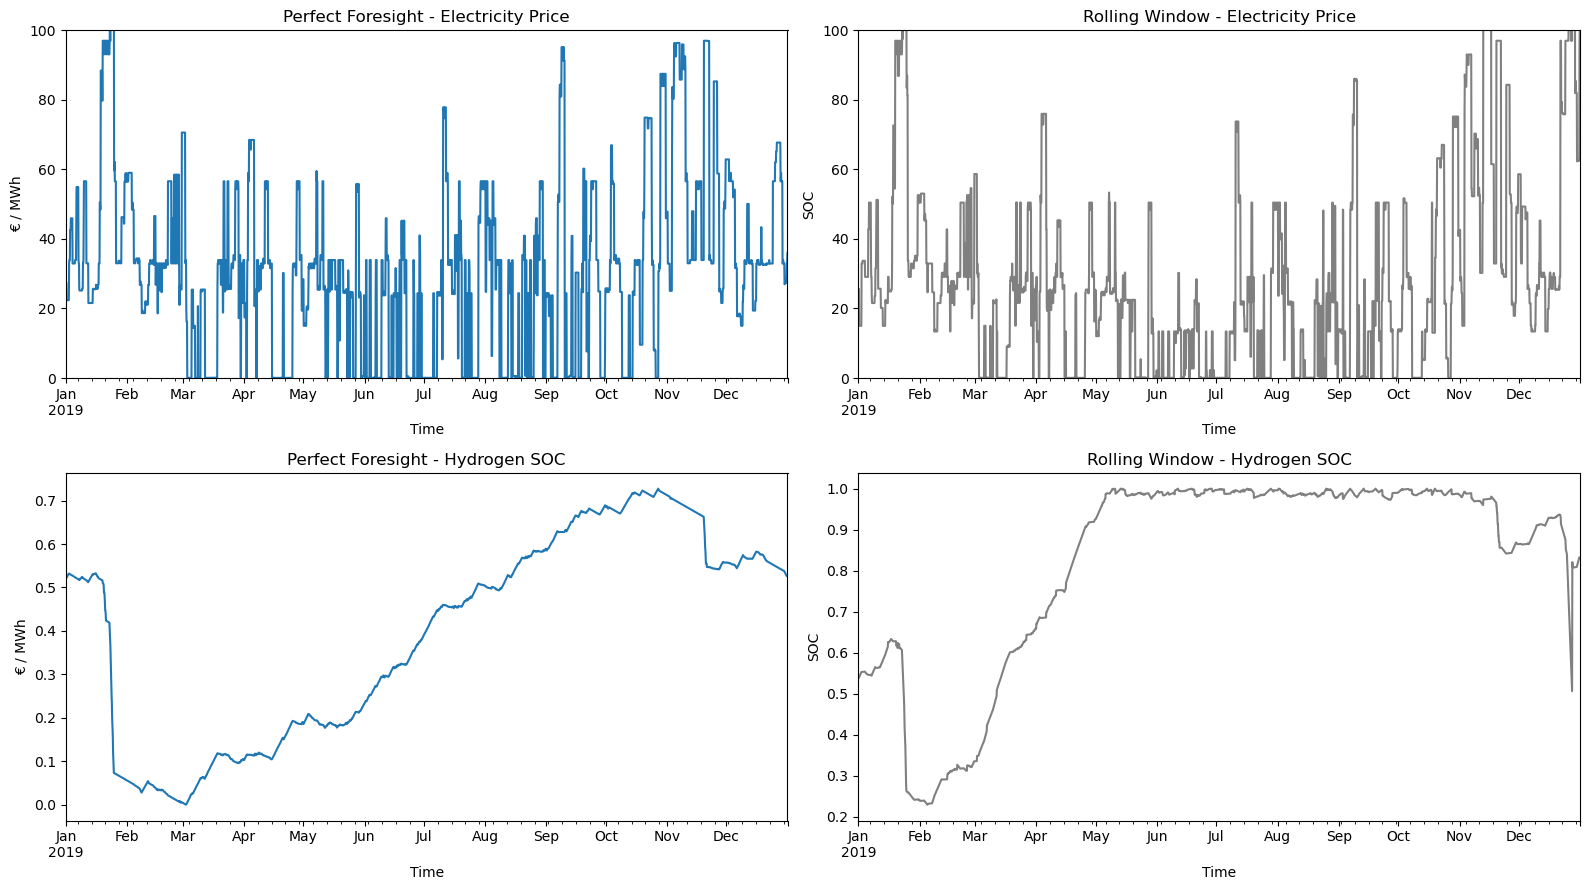

In [16]:
fig, ax = plt.subplots(2,2, figsize=(16,9))

n_perfect_foresight.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0][0],
    ylim=(0, 100),
    title = 'Perfect Foresight - Electricity Price'
)

n.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0][1],
    ylim = (0, 100),
    title = 'Rolling Window - Electricity Price',
    color = 'grey'
)

get_hydrogen_soc(n_perfect_foresight).plot(
    ax = ax[1][0],
    title = 'Perfect Foresight - Hydrogen SOC'
)
get_hydrogen_soc(n).plot(
    ax = ax[1][1],
    title = 'Rolling Window - Hydrogen SOC',
    color = 'grey'

)

ax[0][0].set_xlabel("Time")
ax[1][0].set_xlabel("Time")
ax[0][1].set_xlabel("Time")
ax[1][1].set_xlabel("Time")

ax[0][0].set_ylabel("€ / MWh")
ax[1][0].set_ylabel("€ / MWh")
ax[0][1].set_ylabel("SOC")
ax[1][1].set_ylabel("SOC")

plt.tight_layout()

- Preisunterschied im März löst es, deswegen den im Sommer vermutlich auch, sobald man einen Verbraucher einfhrt sodass der Speicher nicht bei 100% landet und dadurch den marginal preis verändert

# Erzeugung:

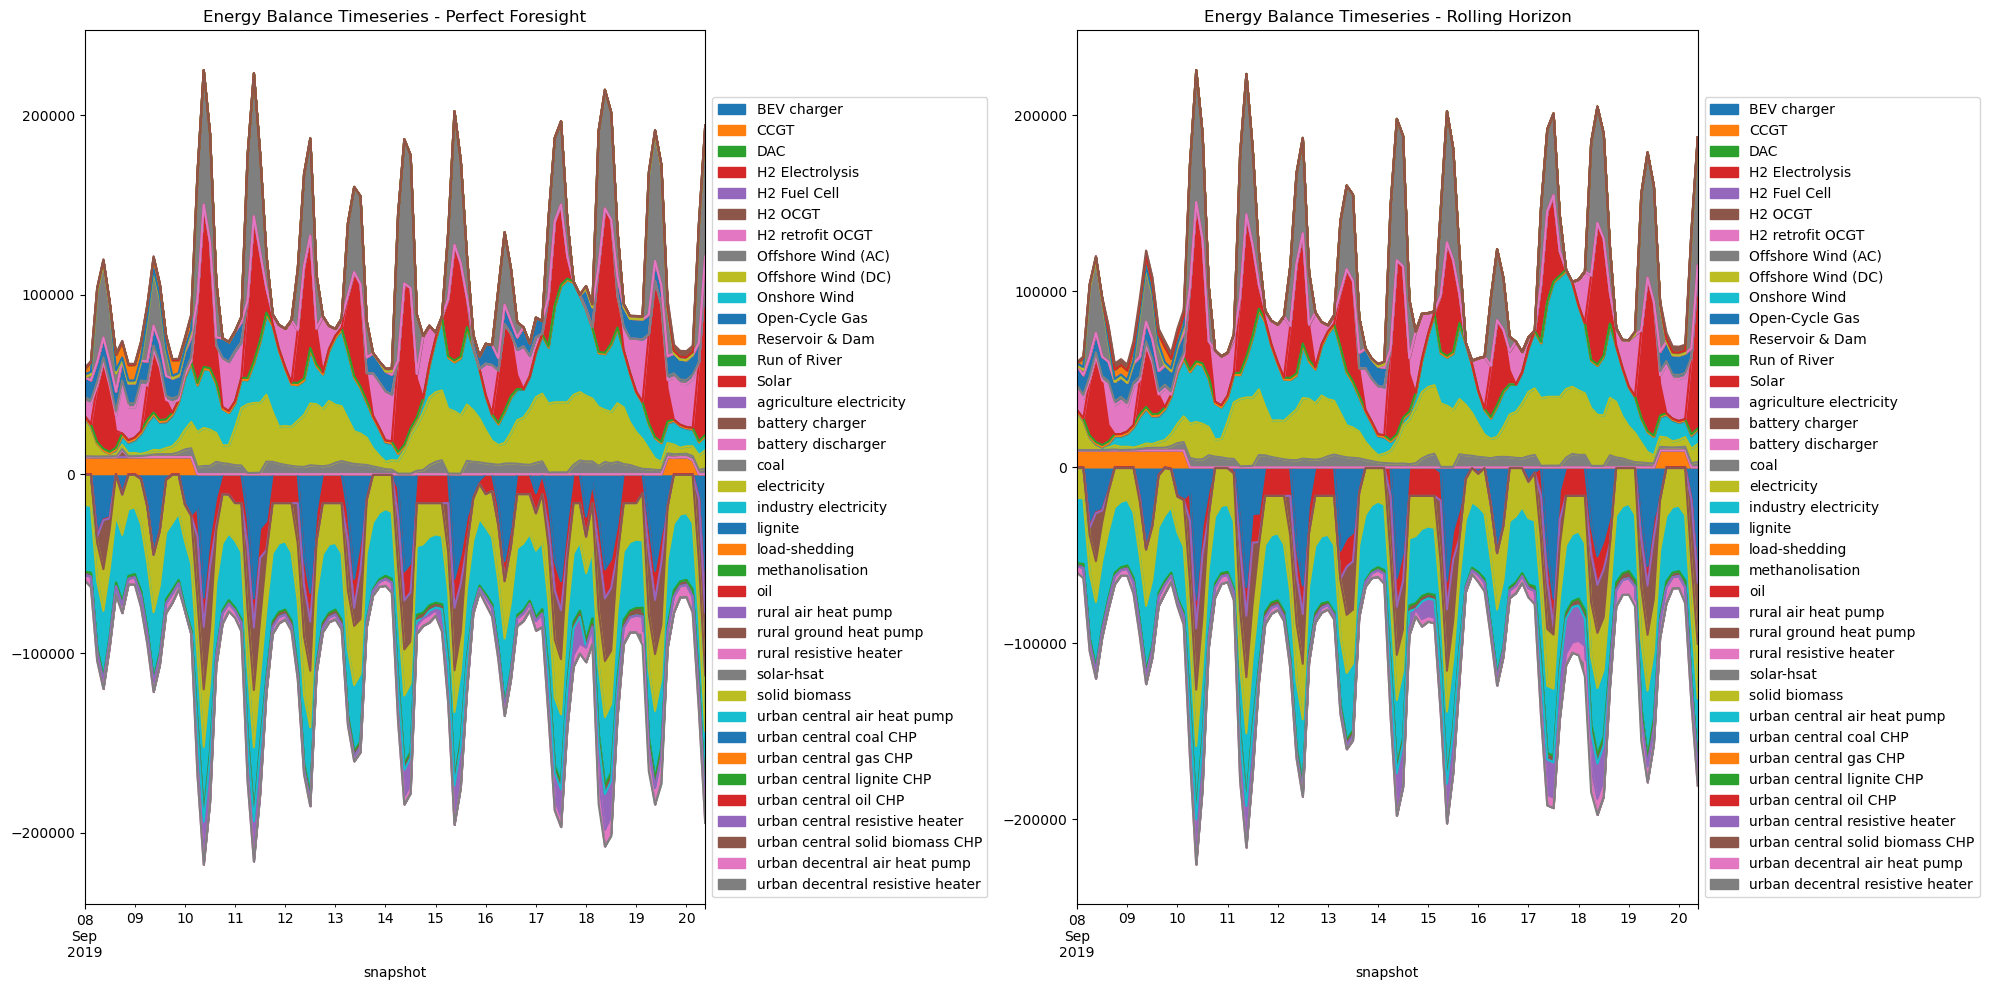

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

n.statistics.energy_balance(aggregate_time=False).loc[:, :, "AC"].droplevel(0).iloc[
    :, 2000:2100
].groupby("carrier").sum().where(lambda x: np.abs(x) > 1).fillna(0).drop("Pumped Hydro Storage", axis=0, errors="ignore").T.plot.area(
    ax = ax[0],
    title="Energy Balance Timeseries - Perfect Foresight"
)
ax[0].legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.tight_layout()

n_perfect_foresight.statistics.energy_balance(aggregate_time=False).loc[:, :, "AC"].droplevel(0).iloc[
    :, 2000:2100
].groupby("carrier").sum().where(lambda x: np.abs(x) > 1).fillna(0).drop("Pumped Hydro Storage", axis=0, errors="ignore").T.plot.area(
    ax = ax[1],
    title="Energy Balance Timeseries - Rolling Horizon"
)
ax[1].legend(bbox_to_anchor=(1, 0), loc="lower left", title=None, ncol=1)
plt.tight_layout()

In [8]:
# Wrapper Funktion um cf übergeben zu können
def change_wind_noise():
    # eigentliche funktion zum ändern der Constraints
    def change_wind(n, sns):
        rhs = n.model.constraints["Generator-fix-p-upper"].rhs
        years = [2035, 2030, 2025, 2020]

        for year in years:
            selector = {"Generator-fix": f"DE0 0 onwind-{year}"}
            scaling_factor = np.std(rhs.sel(selector).data)
            p_nom = n.generators.p_nom[f"DE0 0 onwind-{year}"]
            wind_power = rhs.sel(selector) + wind_noise(len(sns), scaling_factor)
            wind_power = wind_power.where(wind_power >= 0, 0)
            wind_power = wind_power.where(wind_power <= p_nom, p_nom)
            rhs.loc[selector] = wind_power

    return change_wind

def wind_noise(hours, scaling_factor):

    # 2. MSE-Werte für LSTM-Modell aus Tabelle bis 168h --> aus der Tabelle des Papers (0 von mir)
    horizons = np.array([0, 24, 48, 72, 96, 168, 336])
    mse_values = np.array([0, 0.499, 0.794, 0.899, 0.943, 1.011, 1.064])
    rmse_std = np.sqrt(mse_values)  # RMSE in Standardform

    # 3. Skaliere RMSE auf echte MW-Einheit
    rmse_MW = rmse_std * scaling_factor

    # 4. Interpolation der RMSE auf 144h
    interp_rmse = interp1d(horizons, rmse_MW, kind='linear', fill_value='extrapolate')
    rmse_per_hour = interp_rmse(np.arange(0, hours*3, 3))  # Stunden 1–144


    # 5. Rauschen generieren und synthetische Prognose erzeugen
    noise = np.random.normal(loc=0, scale=1.2*rmse_per_hour)
    #noise = np.clip(noise, 0, None)  # alles < 0 → 0, Rest bleibt
    return noise


In [9]:
n_wind_noise = pypsa.Network('base_s_1__none_2035_lt.nc')

# alle hydrogen related stores
stores = n_wind_noise.stores[n_wind_noise.stores.carrier.str.contains("H2", case=False, na=False)].index

# marginal price für alle der mean
for i in stores:
    n_wind_noise.stores.loc[i, 'marginal_cost'] = n_perfect_foresight.buses_t.marginal_price['DE0 0 H2'].mean()


n_wind_noise.stores.loc['DE0 0 H2 Store-2035', 'e_initial'] = 7177471
n_wind_noise.stores.loc['DE0 0 H2 Store-2035', 'e_cyclic'] = False

n_wind_noise.optimize.fix_optimal_capacities()
n_wind_noise.optimize.create_model()

n_wind_noise.optimize.optimize_with_rolling_horizon(
    horizon = 48,
    overlap = 8,
    solver_name = 'gurobi',
    extra_functionality = change_wind_noise()
)

INFO:pypsa.io:Imported network base_s_1__none_2035_lt.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
{'DE', 'EU'}
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-01 00:00:00:2019-01-06 21:00:00] (1/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 198.30it/s]
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-dbtu_iw0.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-dbtu_iw0.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xb7c36575


INFO:gurobipy:Model fingerprint: 0xb7c36575


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23626 rows and 3369 columns


INFO:gurobipy:Presolve removed 23626 rows and 3369 columns


Presolve time: 0.21s


INFO:gurobipy:Presolve time: 0.21s


Presolved: 1191 rows, 8679 columns, 17213 nonzeros


INFO:gurobipy:Presolved: 1191 rows, 8679 columns, 17213 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.302e+03


INFO:gurobipy: AA' NZ     : 3.302e+03


 Factor NZ  : 2.776e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.776e+04 (roughly 4 MB of memory)


 Factor Ops : 9.673e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.673e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.38 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.38 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1659    7.3040083e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1659    7.3040083e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1659 iterations and 0.43 seconds (0.05 work units)


INFO:gurobipy:Solved in 1659 iterations and 0.43 seconds (0.05 work units)


Optimal objective  7.304008310e+08


INFO:gurobipy:Optimal objective  7.304008310e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.30e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-06 00:00:00:2019-01-11 21:00:00] (2/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 231.73it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-47g97g8t.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-47g97g8t.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xea8c264c


INFO:gurobipy:Model fingerprint: 0xea8c264c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23627 rows and 3371 columns


INFO:gurobipy:Presolve removed 23627 rows and 3371 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1190 rows, 8677 columns, 17210 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 8677 columns, 17210 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.301e+03


INFO:gurobipy: AA' NZ     : 3.301e+03


 Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


 Factor Ops : 9.001e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.001e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.76905624e+11 -3.56235616e+12  1.89e+06 6.13e+01  2.68e+09     0s


INFO:gurobipy:   0   1.76905624e+11 -3.56235616e+12  1.89e+06 6.13e+01  2.68e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1591    8.1956745e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1591    8.1956745e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1591 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1591 iterations and 0.12 seconds (0.05 work units)


Optimal objective  8.195674474e+08


INFO:gurobipy:Optimal objective  8.195674474e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.20e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-11 00:00:00:2019-01-16 21:00:00] (3/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 145.26it/s]
INFO:linopy.io: Writing time: 0.36s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-o1rcg_gh.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-o1rcg_gh.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xafa23f89


INFO:gurobipy:Model fingerprint: 0xafa23f89


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23627 rows and 3350 columns


INFO:gurobipy:Presolve removed 23627 rows and 3350 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1190 rows, 8698 columns, 17231 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 8698 columns, 17231 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.301e+03


INFO:gurobipy: AA' NZ     : 3.301e+03


 Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


 Factor Ops : 9.001e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.001e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.53020627e+11 -3.60182928e+12  2.77e+06 6.78e+01  3.83e+09     0s


INFO:gurobipy:   0   2.53020627e+11 -3.60182928e+12  2.77e+06 6.78e+01  3.83e+09     0s


   1   1.99172970e+10 -9.22623487e+11  1.26e+05 5.29e-11  2.14e+08     0s


INFO:gurobipy:   1   1.99172970e+10 -9.22623487e+11  1.26e+05 5.29e-11  2.14e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1904    6.1694256e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1904    6.1694256e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1904 iterations and 0.17 seconds (0.06 work units)


INFO:gurobipy:Solved in 1904 iterations and 0.17 seconds (0.06 work units)


Optimal objective  6.169425575e+08


INFO:gurobipy:Optimal objective  6.169425575e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.17e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-16 00:00:00:2019-01-21 21:00:00] (4/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.08it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tzix3pj8.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tzix3pj8.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xf12ece82


INFO:gurobipy:Model fingerprint: 0xf12ece82


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23628 rows and 3425 columns


INFO:gurobipy:Presolve removed 23628 rows and 3425 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1189 rows, 8623 columns, 17149 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 8623 columns, 17149 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.300e+03


INFO:gurobipy: AA' NZ     : 3.300e+03


 Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


 Factor Ops : 8.921e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.921e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.36226814e+11 -3.65159361e+12  4.00e+06 8.19e+01  5.15e+09     0s


INFO:gurobipy:   0   3.36226814e+11 -3.65159361e+12  4.00e+06 8.19e+01  5.15e+09     0s


   1   2.59424706e+10 -1.17915210e+12  2.00e+05 5.09e-11  3.09e+08     0s


INFO:gurobipy:   1   2.59424706e+10 -1.17915210e+12  2.00e+05 5.09e-11  3.09e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1735    9.9791647e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1735    9.9791647e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1735 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1735 iterations and 0.09 seconds (0.05 work units)


Optimal objective  9.979164652e+08


INFO:gurobipy:Optimal objective  9.979164652e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 9.98e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-21 00:00:00:2019-01-26 21:00:00] (5/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 216.47it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vkcoh1zz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vkcoh1zz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x558b43af


INFO:gurobipy:Model fingerprint: 0x558b43af


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23628 rows and 3478 columns


INFO:gurobipy:Presolve removed 23628 rows and 3478 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1189 rows, 8570 columns, 17084 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 8570 columns, 17084 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.300e+03


INFO:gurobipy: AA' NZ     : 3.300e+03


 Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


 Factor Ops : 8.921e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.921e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.39194467e+11 -3.76086440e+12  4.07e+06 7.33e+01  5.25e+09     0s


INFO:gurobipy:   0   3.39194467e+11 -3.76086440e+12  4.07e+06 7.33e+01  5.25e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1623    1.4456736e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1623    1.4456736e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1623 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1623 iterations and 0.11 seconds (0.05 work units)


Optimal objective  1.445673585e+09


INFO:gurobipy:Optimal objective  1.445673585e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.45e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-26 00:00:00:2019-01-31 21:00:00] (6/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 221.88it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9rqzikup.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9rqzikup.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xa68dedaf


INFO:gurobipy:Model fingerprint: 0xa68dedaf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23621 rows and 3344 columns


INFO:gurobipy:Presolve removed 23621 rows and 3344 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1196 rows, 8704 columns, 17243 nonzeros


INFO:gurobipy:Presolved: 1196 rows, 8704 columns, 17243 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.307e+03


INFO:gurobipy: AA' NZ     : 3.307e+03


 Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


 Factor Ops : 8.633e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.633e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.44846749e+11 -3.40773267e+12  9.88e+05 6.40e+01  2.19e+09     0s


INFO:gurobipy:   0   1.44846749e+11 -3.40773267e+12  9.88e+05 6.40e+01  2.19e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1621    8.9069109e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1621    8.9069109e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1621 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1621 iterations and 0.09 seconds (0.05 work units)


Optimal objective  8.906910927e+08


INFO:gurobipy:Optimal objective  8.906910927e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.91e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-01-31 00:00:00:2019-02-05 21:00:00] (7/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.29it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-xzbo5k84.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-xzbo5k84.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xc92c222b


INFO:gurobipy:Model fingerprint: 0xc92c222b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23621 rows and 3346 columns


INFO:gurobipy:Presolve removed 23621 rows and 3346 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1196 rows, 8702 columns, 17241 nonzeros


INFO:gurobipy:Presolved: 1196 rows, 8702 columns, 17241 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.307e+03


INFO:gurobipy: AA' NZ     : 3.307e+03


 Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


 Factor Ops : 8.633e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.633e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.96780673e+11 -3.40256485e+12  1.38e+06 7.22e+01  2.98e+09     0s


INFO:gurobipy:   0   1.96780673e+11 -3.40256485e+12  1.38e+06 7.22e+01  2.98e+09     0s


   1   1.75354005e+10 -8.01458313e+11  6.27e+04 5.34e-11  1.69e+08     0s


INFO:gurobipy:   1   1.75354005e+10 -8.01458313e+11  6.27e+04 5.34e-11  1.69e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1725    1.0331479e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1725    1.0331479e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1725 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1725 iterations and 0.09 seconds (0.05 work units)


Optimal objective  1.033147901e+09


INFO:gurobipy:Optimal objective  1.033147901e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 1.03e+09
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-05 00:00:00:2019-02-10 21:00:00] (8/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 256.44it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ygx71qbi.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ygx71qbi.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xbb3a5ffe


INFO:gurobipy:Model fingerprint: 0xbb3a5ffe


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23621 rows and 3306 columns


INFO:gurobipy:Presolve removed 23621 rows and 3306 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1196 rows, 8742 columns, 17281 nonzeros


INFO:gurobipy:Presolved: 1196 rows, 8742 columns, 17281 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.307e+03


INFO:gurobipy: AA' NZ     : 3.307e+03


 Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


 Factor Ops : 8.633e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.633e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.10580940e+11 -3.41628393e+12  1.47e+06 6.32e+01  3.18e+09     0s


INFO:gurobipy:   0   2.10580940e+11 -3.41628393e+12  1.47e+06 6.32e+01  3.18e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1643    6.7865129e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1643    6.7865129e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1643 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1643 iterations and 0.09 seconds (0.05 work units)


Optimal objective  6.786512894e+08


INFO:gurobipy:Optimal objective  6.786512894e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.79e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-10 00:00:00:2019-02-15 21:00:00] (9/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 258.08it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-i4d2rnge.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-i4d2rnge.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x2af4d579


INFO:gurobipy:Model fingerprint: 0x2af4d579


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23622 rows and 3328 columns


INFO:gurobipy:Presolve removed 23622 rows and 3328 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1195 rows, 8720 columns, 17258 nonzeros


INFO:gurobipy:Presolved: 1195 rows, 8720 columns, 17258 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.306e+03


INFO:gurobipy: AA' NZ     : 3.306e+03


 Factor NZ  : 2.806e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.806e+04 (roughly 4 MB of memory)


 Factor Ops : 9.680e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.680e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.54496638e+11 -3.47655037e+12  1.15e+06 7.34e+01  2.34e+09     0s


INFO:gurobipy:   0   1.54496638e+11 -3.47655037e+12  1.15e+06 7.34e+01  2.34e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1605    6.6325942e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1605    6.6325942e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1605 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1605 iterations and 0.09 seconds (0.05 work units)


Optimal objective  6.632594244e+08


INFO:gurobipy:Optimal objective  6.632594244e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.63e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-15 00:00:00:2019-02-20 21:00:00] (10/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 265.02it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tjes9mmo.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tjes9mmo.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xd4197d9a


INFO:gurobipy:Model fingerprint: 0xd4197d9a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23624 rows and 3304 columns


INFO:gurobipy:Presolve removed 23624 rows and 3304 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1193 rows, 8744 columns, 17280 nonzeros


INFO:gurobipy:Presolved: 1193 rows, 8744 columns, 17280 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.304e+03


INFO:gurobipy: AA' NZ     : 3.304e+03


 Factor NZ  : 2.737e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.737e+04 (roughly 4 MB of memory)


 Factor Ops : 9.397e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.397e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23300528e+11 -3.49598528e+12  2.00e+06 6.04e+01  3.37e+09     0s


INFO:gurobipy:   0   2.23300528e+11 -3.49598528e+12  2.00e+06 6.04e+01  3.37e+09     0s


   1   1.84814732e+10 -8.60360032e+11  9.11e+04 5.09e-11  1.90e+08     0s


INFO:gurobipy:   1   1.84814732e+10 -8.60360032e+11  9.11e+04 5.09e-11  1.90e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1730    6.3480503e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1730    6.3480503e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1730 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1730 iterations and 0.08 seconds (0.05 work units)


Optimal objective  6.348050304e+08


INFO:gurobipy:Optimal objective  6.348050304e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.35e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-20 00:00:00:2019-02-25 21:00:00] (11/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.68it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7li5kwzu.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7li5kwzu.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x84618002


INFO:gurobipy:Model fingerprint: 0x84618002


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23624 rows and 3314 columns


INFO:gurobipy:Presolve removed 23624 rows and 3314 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1193 rows, 8734 columns, 17270 nonzeros


INFO:gurobipy:Presolved: 1193 rows, 8734 columns, 17270 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.304e+03


INFO:gurobipy: AA' NZ     : 3.304e+03


 Factor NZ  : 2.737e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.737e+04 (roughly 4 MB of memory)


 Factor Ops : 9.397e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.397e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.39041084e+11 -3.53142810e+12  2.14e+06 7.57e+01  3.61e+09     0s


INFO:gurobipy:   0   2.39041084e+11 -3.53142810e+12  2.14e+06 7.57e+01  3.61e+09     0s


   1   1.95033824e+10 -8.84595310e+11  9.84e+04 5.35e-11  2.02e+08     0s


INFO:gurobipy:   1   1.95033824e+10 -8.84595310e+11  9.84e+04 5.35e-11  2.02e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1763    7.7542870e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1763    7.7542870e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1763 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1763 iterations and 0.10 seconds (0.05 work units)


Optimal objective  7.754287005e+08


INFO:gurobipy:Optimal objective  7.754287005e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.75e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-02-25 00:00:00:2019-03-02 21:00:00] (12/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 262.31it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-i89k6eqg.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-i89k6eqg.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x9579143d


INFO:gurobipy:Model fingerprint: 0x9579143d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23624 rows and 3333 columns


INFO:gurobipy:Presolve removed 23624 rows and 3333 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1193 rows, 8715 columns, 17251 nonzeros


INFO:gurobipy:Presolved: 1193 rows, 8715 columns, 17251 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.304e+03


INFO:gurobipy: AA' NZ     : 3.304e+03


 Factor NZ  : 2.737e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.737e+04 (roughly 4 MB of memory)


 Factor Ops : 9.397e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.397e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25937664e+11 -3.53435997e+12  2.02e+06 6.73e+01  3.42e+09     0s


INFO:gurobipy:   0   2.25937664e+11 -3.53435997e+12  2.02e+06 6.73e+01  3.42e+09     0s


   1   1.88097429e+10 -8.57255246e+11  9.27e+04 4.52e-11  1.92e+08     0s


INFO:gurobipy:   1   1.88097429e+10 -8.57255246e+11  9.27e+04 4.52e-11  1.92e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1660    7.7582775e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1660    7.7582775e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1660 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1660 iterations and 0.10 seconds (0.05 work units)


Optimal objective  7.758277458e+08


INFO:gurobipy:Optimal objective  7.758277458e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.76e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-02 00:00:00:2019-03-07 21:00:00] (13/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 260.26it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wrvqdsu5.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-wrvqdsu5.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x007cad6e


INFO:gurobipy:Model fingerprint: 0x007cad6e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23625 rows and 3301 columns


INFO:gurobipy:Presolve removed 23625 rows and 3301 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1192 rows, 8747 columns, 17282 nonzeros


INFO:gurobipy:Presolved: 1192 rows, 8747 columns, 17282 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.303e+03


INFO:gurobipy: AA' NZ     : 3.303e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 9.678e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.678e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.40922479e+11 -3.56362016e+12  2.33e+06 6.38e+01  3.65e+09     0s


INFO:gurobipy:   0   2.40922479e+11 -3.56362016e+12  2.33e+06 6.38e+01  3.65e+09     0s


   1   1.91215565e+10 -9.07552184e+11  1.06e+05 4.97e-11  2.05e+08     0s


INFO:gurobipy:   1   1.91215565e+10 -9.07552184e+11  1.06e+05 4.97e-11  2.05e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1732    5.0365396e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1732    5.0365396e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1732 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1732 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.036539606e+08


INFO:gurobipy:Optimal objective  5.036539606e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.04e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-07 00:00:00:2019-03-12 21:00:00] (14/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.31it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f3wksiwb.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f3wksiwb.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x92ef9890


INFO:gurobipy:Model fingerprint: 0x92ef9890


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23627 rows and 3293 columns


INFO:gurobipy:Presolve removed 23627 rows and 3293 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1190 rows, 8755 columns, 17288 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 8755 columns, 17288 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.301e+03


INFO:gurobipy: AA' NZ     : 3.301e+03


 Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


 Factor Ops : 9.001e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.001e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.58591776e+11 -3.62463971e+12  2.83e+06 6.12e+01  3.92e+09     0s


INFO:gurobipy:   0   2.58591776e+11 -3.62463971e+12  2.83e+06 6.12e+01  3.92e+09     0s


   1   2.00432229e+10 -9.39776144e+11  1.30e+05 5.16e-11  2.19e+08     0s


INFO:gurobipy:   1   2.00432229e+10 -9.39776144e+11  1.30e+05 5.16e-11  2.19e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1646    5.1083210e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1646    5.1083210e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1646 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1646 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.108321005e+08


INFO:gurobipy:Optimal objective  5.108321005e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.11e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-12 00:00:00:2019-03-17 21:00:00] (15/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.17it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-uvvrm068.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-uvvrm068.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x95043987


INFO:gurobipy:Model fingerprint: 0x95043987


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 6e+02]


INFO:gurobipy:  Bounds range     [4e+02, 6e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23629 rows and 3293 columns


INFO:gurobipy:Presolve removed 23629 rows and 3293 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1188 rows, 8755 columns, 17286 nonzeros


INFO:gurobipy:Presolved: 1188 rows, 8755 columns, 17286 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.299e+03


INFO:gurobipy: AA' NZ     : 3.299e+03


 Factor NZ  : 2.872e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.872e+04 (roughly 4 MB of memory)


 Factor Ops : 1.087e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.087e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.51858933e+11 -3.82361029e+12  4.37e+06 6.06e+01  5.33e+09     0s


INFO:gurobipy:   0   3.51858933e+11 -3.82361029e+12  4.37e+06 6.06e+01  5.33e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1768    4.8516040e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1768    4.8516040e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1768 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1768 iterations and 0.13 seconds (0.05 work units)


Optimal objective  4.851603968e+08


INFO:gurobipy:Optimal objective  4.851603968e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.85e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-17 00:00:00:2019-03-22 21:00:00] (16/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 258.22it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-63exz2lq.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-63exz2lq.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xd3c3cff5


INFO:gurobipy:Model fingerprint: 0xd3c3cff5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [6e+02, 7e+02]


INFO:gurobipy:  Bounds range     [6e+02, 7e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23630 rows and 3346 columns


INFO:gurobipy:Presolve removed 23630 rows and 3346 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1187 rows, 8702 columns, 17232 nonzeros


INFO:gurobipy:Presolved: 1187 rows, 8702 columns, 17232 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.298e+03


INFO:gurobipy: AA' NZ     : 3.298e+03


 Factor NZ  : 2.798e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.798e+04 (roughly 4 MB of memory)


 Factor Ops : 1.018e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.018e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.04264836e+11 -3.97932353e+12  2.60e+06 7.54e+01  3.12e+09     0s


INFO:gurobipy:   0   2.04264836e+11 -3.97932353e+12  2.60e+06 7.54e+01  3.12e+09     0s


   1   1.73902031e+10 -9.02901085e+11  1.19e+05 5.09e-11  1.80e+08     0s


INFO:gurobipy:   1   1.73902031e+10 -9.02901085e+11  1.19e+05 5.09e-11  1.80e+08     0s


   2   4.72974932e+09 -1.68013413e+11  6.02e+03 1.44e-09  1.51e+07     0s


INFO:gurobipy:   2   4.72974932e+09 -1.68013413e+11  6.02e+03 1.44e-09  1.51e+07     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1655    5.7705776e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1655    5.7705776e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1655 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1655 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.770577581e+08


INFO:gurobipy:Optimal objective  5.770577581e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.77e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-22 00:00:00:2019-03-27 21:00:00] (17/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 199.47it/s]
INFO:linopy.io: Writing time: 0.38s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vl11asc_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-vl11asc_.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x91cef39c


INFO:gurobipy:Model fingerprint: 0x91cef39c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 7e+02]


INFO:gurobipy:  Bounds range     [5e+02, 7e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23628 rows and 3326 columns


INFO:gurobipy:Presolve removed 23628 rows and 3326 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1189 rows, 8722 columns, 17254 nonzeros


INFO:gurobipy:Presolved: 1189 rows, 8722 columns, 17254 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.300e+03


INFO:gurobipy: AA' NZ     : 3.300e+03


 Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.678e+04 (roughly 4 MB of memory)


 Factor Ops : 8.921e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.921e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.86925022e+11 -4.03955745e+12  3.35e+06 7.70e+01  4.37e+09     0s


INFO:gurobipy:   0   2.86925022e+11 -4.03955745e+12  3.35e+06 7.70e+01  4.37e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.13 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.13 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1690    6.3748020e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1690    6.3748020e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1690 iterations and 0.16 seconds (0.05 work units)


INFO:gurobipy:Solved in 1690 iterations and 0.16 seconds (0.05 work units)


Optimal objective  6.374802008e+08


INFO:gurobipy:Optimal objective  6.374802008e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.37e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-03-27 00:00:00:2019-04-01 21:00:00] (18/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 256.61it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-thpq8i3o.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-thpq8i3o.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xe2f65643


INFO:gurobipy:Model fingerprint: 0xe2f65643


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23627 rows and 3313 columns


INFO:gurobipy:Presolve removed 23627 rows and 3313 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1190 rows, 8735 columns, 17268 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 8735 columns, 17268 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.301e+03


INFO:gurobipy: AA' NZ     : 3.301e+03


 Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.697e+04 (roughly 4 MB of memory)


 Factor Ops : 9.001e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.001e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.88607699e+11 -4.06375558e+12  3.18e+06 6.63e+01  4.40e+09     0s


INFO:gurobipy:   0   2.88607699e+11 -4.06375558e+12  3.18e+06 6.63e+01  4.40e+09     0s


   1   3.08998342e+10 -9.70569813e+11  2.49e+05 4.83e-11  3.73e+08     0s


INFO:gurobipy:   1   3.08998342e+10 -9.70569813e+11  2.49e+05 4.83e-11  3.73e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1577    6.2102947e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1577    6.2102947e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1577 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1577 iterations and 0.11 seconds (0.05 work units)


Optimal objective  6.210294696e+08


INFO:gurobipy:Optimal objective  6.210294696e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.21e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-01 00:00:00:2019-04-06 21:00:00] (19/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 226.07it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qbq74h8d.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qbq74h8d.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x80cc7e90


INFO:gurobipy:Model fingerprint: 0x80cc7e90


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23626 rows and 3324 columns


INFO:gurobipy:Presolve removed 23626 rows and 3324 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1191 rows, 8724 columns, 17258 nonzeros


INFO:gurobipy:Presolved: 1191 rows, 8724 columns, 17258 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.302e+03


INFO:gurobipy: AA' NZ     : 3.302e+03


 Factor NZ  : 2.776e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.776e+04 (roughly 4 MB of memory)


 Factor Ops : 9.673e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.673e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.52783886e+11 -4.10674172e+12  3.70e+06 6.59e+01  5.38e+09     0s


INFO:gurobipy:   0   3.52783886e+11 -4.10674172e+12  3.70e+06 6.59e+01  5.38e+09     0s


   1   3.60213562e+10 -1.09673807e+12  2.88e+05 5.32e-11  4.54e+08     0s


INFO:gurobipy:   1   3.60213562e+10 -1.09673807e+12  2.88e+05 5.32e-11  4.54e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1594    6.7966948e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1594    6.7966948e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1594 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1594 iterations and 0.09 seconds (0.05 work units)


Optimal objective  6.796694829e+08


INFO:gurobipy:Optimal objective  6.796694829e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.80e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-06 00:00:00:2019-04-11 21:00:00] (20/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.87it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4w9urigk.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-4w9urigk.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xc6a36cf7


INFO:gurobipy:Model fingerprint: 0xc6a36cf7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [5e+02, 5e+02]


INFO:gurobipy:  Bounds range     [5e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23625 rows and 3294 columns


INFO:gurobipy:Presolve removed 23625 rows and 3294 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1192 rows, 8754 columns, 17289 nonzeros


INFO:gurobipy:Presolved: 1192 rows, 8754 columns, 17289 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.303e+03


INFO:gurobipy: AA' NZ     : 3.303e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 9.678e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.678e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.92817743e+11 -4.12209955e+12  2.87e+06 6.23e+01  4.49e+09     0s


INFO:gurobipy:   0   2.92817743e+11 -4.12209955e+12  2.87e+06 6.23e+01  4.49e+09     0s


   1   3.51632032e+10 -9.86994835e+11  2.65e+05 5.82e-11  4.39e+08     0s


INFO:gurobipy:   1   3.51632032e+10 -9.86994835e+11  2.65e+05 5.82e-11  4.39e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1618    5.8743471e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1618    5.8743471e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1618 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1618 iterations and 0.11 seconds (0.05 work units)


Optimal objective  5.874347065e+08


INFO:gurobipy:Optimal objective  5.874347065e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-11 00:00:00:2019-04-16 21:00:00] (21/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 260.75it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-gjpsejoa.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-gjpsejoa.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xf0372782


INFO:gurobipy:Model fingerprint: 0xf0372782


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23621 rows and 3265 columns


INFO:gurobipy:Presolve removed 23621 rows and 3265 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 1196 rows, 8783 columns, 17322 nonzeros


INFO:gurobipy:Presolved: 1196 rows, 8783 columns, 17322 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.307e+03


INFO:gurobipy: AA' NZ     : 3.307e+03


 Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


 Factor Ops : 8.633e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.633e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.38050308e+11 -4.19423398e+12  2.42e+06 5.78e+01  5.14e+09     0s


INFO:gurobipy:   0   3.38050308e+11 -4.19423398e+12  2.42e+06 5.78e+01  5.14e+09     0s


   1   2.44103286e+10 -1.08142174e+12  1.12e+05 5.08e-11  2.83e+08     0s


INFO:gurobipy:   1   2.44103286e+10 -1.08142174e+12  1.12e+05 5.08e-11  2.83e+08     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1590    6.7657283e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1590    6.7657283e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1590 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1590 iterations and 0.08 seconds (0.05 work units)


Optimal objective  6.765728265e+08


INFO:gurobipy:Optimal objective  6.765728265e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.77e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-16 00:00:00:2019-04-21 21:00:00] (22/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.14it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-bknytyjo.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-bknytyjo.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x75210e96


INFO:gurobipy:Model fingerprint: 0x75210e96


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 4e+02]


INFO:gurobipy:  Bounds range     [4e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23621 rows and 3382 columns


INFO:gurobipy:Presolve removed 23621 rows and 3382 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1196 rows, 8666 columns, 17143 nonzeros


INFO:gurobipy:Presolved: 1196 rows, 8666 columns, 17143 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.307e+03


INFO:gurobipy: AA' NZ     : 3.307e+03


 Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.690e+04 (roughly 4 MB of memory)


 Factor Ops : 8.633e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.633e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.27369577e+11 -4.18605939e+12  1.63e+06 3.34e+02  3.52e+09     0s


INFO:gurobipy:   0   2.27369577e+11 -4.18605939e+12  1.63e+06 3.34e+02  3.52e+09     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1557    4.7125721e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1557    4.7125721e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1557 iterations and 0.08 seconds (0.05 work units)


INFO:gurobipy:Solved in 1557 iterations and 0.08 seconds (0.05 work units)


Optimal objective  4.712572129e+08


INFO:gurobipy:Optimal objective  4.712572129e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.71e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-21 00:00:00:2019-04-26 21:00:00] (23/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 256.91it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rztfzfq6.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rztfzfq6.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x6f2b45a3


INFO:gurobipy:Model fingerprint: 0x6f2b45a3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23612 rows and 3454 columns


INFO:gurobipy:Presolve removed 23612 rows and 3454 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1205 rows, 8594 columns, 20037 nonzeros


INFO:gurobipy:Presolved: 1205 rows, 8594 columns, 20037 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.944e+03


INFO:gurobipy: AA' NZ     : 3.944e+03


 Factor NZ  : 2.720e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.720e+04 (roughly 4 MB of memory)


 Factor Ops : 8.637e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.637e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.05282752e+13 -5.84574114e+12  1.12e+09 4.42e+02  1.60e+11     0s


INFO:gurobipy:   0   1.05282752e+13 -5.84574114e+12  1.12e+09 4.42e+02  1.60e+11     0s


   1   1.04199586e+12 -4.43144379e+12  1.05e+08 1.14e+04  1.54e+10     0s


INFO:gurobipy:   1   1.04199586e+12 -4.43144379e+12  1.05e+08 1.14e+04  1.54e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1596    4.8586121e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1596    4.8586121e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1596 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1596 iterations and 0.10 seconds (0.05 work units)


Optimal objective  4.858612143e+08


INFO:gurobipy:Optimal objective  4.858612143e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.86e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-04-26 00:00:00:2019-05-01 21:00:00] (24/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.43it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-85tq98n7.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-85tq98n7.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x5a509108


INFO:gurobipy:Model fingerprint: 0x5a509108


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3271 columns


INFO:gurobipy:Presolve removed 23608 rows and 3271 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8777 columns, 20362 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8777 columns, 20362 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.927e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.927e+04 (roughly 4 MB of memory)


 Factor Ops : 1.059e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.059e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   9.82256597e+12 -7.45542697e+12  7.61e+08 6.66e+01  1.49e+11     0s


INFO:gurobipy:   0   9.82256597e+12 -7.45542697e+12  7.61e+08 6.66e+01  1.49e+11     0s


   1   7.97659604e+11 -5.27874869e+12  5.98e+07 1.31e+04  1.21e+10     0s


INFO:gurobipy:   1   7.97659604e+11 -5.27874869e+12  5.98e+07 1.31e+04  1.21e+10     0s


   2   6.86899605e+10 -1.81583941e+12  4.55e+06 1.45e+02  9.90e+08     0s


INFO:gurobipy:   2   6.86899605e+10 -1.81583941e+12  4.55e+06 1.45e+02  9.90e+08     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1670    5.8658212e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1670    5.8658212e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1670 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1670 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.865821189e+08


INFO:gurobipy:Optimal objective  5.865821189e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.87e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-01 00:00:00:2019-05-06 21:00:00] (25/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.84it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0y7ngorl.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0y7ngorl.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xd485e0ed


INFO:gurobipy:Model fingerprint: 0xd485e0ed


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3248 columns


INFO:gurobipy:Presolve removed 23608 rows and 3248 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8800 columns, 20385 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8800 columns, 20385 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.03379349e+13 -7.46927206e+12  4.62e+08 5.50e+01  1.56e+11     0s


INFO:gurobipy:   0   1.03379349e+13 -7.46927206e+12  4.62e+08 5.50e+01  1.56e+11     0s


   1   8.79675956e+11 -5.19069493e+12  3.81e+07 1.22e+04  1.33e+10     0s


INFO:gurobipy:   1   8.79675956e+11 -5.19069493e+12  3.81e+07 1.22e+04  1.33e+10     0s


   2   7.19618371e+10 -1.90462706e+12  2.77e+06 7.82e-11  1.04e+09     0s


INFO:gurobipy:   2   7.19618371e+10 -1.90462706e+12  2.77e+06 7.82e-11  1.04e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1717    5.6427247e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1717    5.6427247e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1717 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1717 iterations and 0.10 seconds (0.06 work units)


Optimal objective  5.642724653e+08


INFO:gurobipy:Optimal objective  5.642724653e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.64e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-06 00:00:00:2019-05-11 21:00:00] (26/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 261.72it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_sbi2m1t.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-_sbi2m1t.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x78f29193


INFO:gurobipy:Model fingerprint: 0x78f29193


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3256 columns


INFO:gurobipy:Presolve removed 23608 rows and 3256 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8792 columns, 20377 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8792 columns, 20377 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.05058709e+13 -7.47258930e+12  4.71e+08 6.15e+01  1.59e+11     0s


INFO:gurobipy:   0   1.05058709e+13 -7.47258930e+12  4.71e+08 6.15e+01  1.59e+11     0s


   1   8.81330737e+11 -5.40354764e+12  3.83e+07 1.18e+04  1.33e+10     0s


INFO:gurobipy:   1   8.81330737e+11 -5.40354764e+12  3.83e+07 1.18e+04  1.33e+10     0s


   2   7.54942254e+10 -1.91082722e+12  2.93e+06 6.36e-11  1.09e+09     0s


INFO:gurobipy:   2   7.54942254e+10 -1.91082722e+12  2.93e+06 6.36e-11  1.09e+09     0s


   3   9.62102146e+09 -4.77279297e+11  1.40e+05 8.51e-11  7.18e+07     0s


INFO:gurobipy:   3   9.62102146e+09 -4.77279297e+11  1.40e+05 8.51e-11  7.18e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.08 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1672    6.2444715e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1672    6.2444715e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1672 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1672 iterations and 0.10 seconds (0.06 work units)


Optimal objective  6.244471464e+08


INFO:gurobipy:Optimal objective  6.244471464e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.24e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-11 00:00:00:2019-05-16 21:00:00] (27/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 244.28it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2xjvv32x.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2xjvv32x.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x52b82fb3


INFO:gurobipy:Model fingerprint: 0x52b82fb3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3210 columns


INFO:gurobipy:Presolve removed 23608 rows and 3210 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8838 columns, 20423 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8838 columns, 20423 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.07870387e+13 -7.46900329e+12  4.82e+08 5.37e+01  1.63e+11     0s


INFO:gurobipy:   0   1.07870387e+13 -7.46900329e+12  4.82e+08 5.37e+01  1.63e+11     0s


   1   8.82211972e+11 -5.42724997e+12  3.82e+07 1.22e+04  1.33e+10     0s


INFO:gurobipy:   1   8.82211972e+11 -5.42724997e+12  3.82e+07 1.22e+04  1.33e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1772    5.7189761e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1772    5.7189761e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1772 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1772 iterations and 0.11 seconds (0.06 work units)


Optimal objective  5.718976088e+08


INFO:gurobipy:Optimal objective  5.718976088e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.72e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-16 00:00:00:2019-05-21 21:00:00] (28/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 259.47it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-cpadwqhx.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-cpadwqhx.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x87a74c7a


INFO:gurobipy:Model fingerprint: 0x87a74c7a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 5e+02]


INFO:gurobipy:  Bounds range     [2e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3371 columns


INFO:gurobipy:Presolve removed 23608 rows and 3371 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8677 columns, 20160 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8677 columns, 20160 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.07557626e+13 -7.44641156e+12  4.87e+08 3.88e+02  1.64e+11     0s


INFO:gurobipy:   0   1.07557626e+13 -7.44641156e+12  4.87e+08 3.88e+02  1.64e+11     0s


   1   9.92967811e+11 -5.15892255e+12  4.26e+07 1.25e+04  1.48e+10     0s


INFO:gurobipy:   1   9.92967811e+11 -5.15892255e+12  4.26e+07 1.25e+04  1.48e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1512    5.2103493e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1512    5.2103493e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1512 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1512 iterations and 0.11 seconds (0.05 work units)


Optimal objective  5.210349280e+08


INFO:gurobipy:Optimal objective  5.210349280e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.21e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-21 00:00:00:2019-05-26 21:00:00] (29/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.08it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7ojt58c3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7ojt58c3.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x5e5cc9a9


INFO:gurobipy:Model fingerprint: 0x5e5cc9a9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [4e+02, 5e+02]


INFO:gurobipy:  Bounds range     [4e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3392 columns


INFO:gurobipy:Presolve removed 23608 rows and 3392 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8656 columns, 20121 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8656 columns, 20121 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.08633738e+13 -7.45245160e+12  4.94e+08 3.73e+02  1.66e+11     0s


INFO:gurobipy:   0   1.08633738e+13 -7.45245160e+12  4.94e+08 3.73e+02  1.66e+11     0s


   1   1.04063902e+12 -5.37812331e+12  4.46e+07 1.20e+04  1.54e+10     0s


INFO:gurobipy:   1   1.04063902e+12 -5.37812331e+12  4.46e+07 1.20e+04  1.54e+10     0s


   2   8.76735772e+10 -2.08079965e+12  3.45e+06 5.86e-11  1.29e+09     0s


INFO:gurobipy:   2   8.76735772e+10 -2.08079965e+12  3.45e+06 5.86e-11  1.29e+09     0s


   3   9.19370175e+09 -4.78403114e+11  1.37e+05 4.58e-10  7.17e+07     0s


INFO:gurobipy:   3   9.19370175e+09 -4.78403114e+11  1.37e+05 4.58e-10  7.17e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1672    4.8033283e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1672    4.8033283e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1672 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1672 iterations and 0.12 seconds (0.06 work units)


Optimal objective  4.803328343e+08


INFO:gurobipy:Optimal objective  4.803328343e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.80e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-26 00:00:00:2019-05-31 21:00:00] (30/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.69it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lr3_6oxe.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lr3_6oxe.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xc38520c2


INFO:gurobipy:Model fingerprint: 0xc38520c2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 5e+02]


INFO:gurobipy:  Bounds range     [3e+02, 5e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3418 columns


INFO:gurobipy:Presolve removed 23608 rows and 3418 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8630 columns, 20069 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8630 columns, 20069 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.10203686e+13 -7.45025420e+12  5.01e+08 4.41e+02  1.68e+11     0s


INFO:gurobipy:   0   1.10203686e+13 -7.45025420e+12  5.01e+08 4.41e+02  1.68e+11     0s


   1   1.07172738e+12 -5.33586962e+12  4.57e+07 1.19e+04  1.57e+10     0s


INFO:gurobipy:   1   1.07172738e+12 -5.33586962e+12  4.57e+07 1.19e+04  1.57e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1554    4.9622483e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1554    4.9622483e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1554 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1554 iterations and 0.09 seconds (0.05 work units)


Optimal objective  4.962248297e+08


INFO:gurobipy:Optimal objective  4.962248297e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.96e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-05-31 00:00:00:2019-06-05 21:00:00] (31/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 245.36it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tkvwd1ap.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tkvwd1ap.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x40c9f1e6


INFO:gurobipy:Model fingerprint: 0x40c9f1e6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 4e+02]


INFO:gurobipy:  Bounds range     [3e+02, 4e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3516 columns


INFO:gurobipy:Presolve removed 23608 rows and 3516 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8532 columns, 19877 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8532 columns, 19877 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.10806481e+13 -7.43341618e+12  5.03e+08 4.44e+02  1.68e+11     0s


INFO:gurobipy:   0   1.10806481e+13 -7.43341618e+12  5.03e+08 4.44e+02  1.68e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.06 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1566    4.8389913e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1566    4.8389913e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1566 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1566 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.838991313e+08


INFO:gurobipy:Optimal objective  4.838991313e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-05 00:00:00:2019-06-10 21:00:00] (32/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 261.34it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-e2m285gh.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-e2m285gh.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x62fc172c


INFO:gurobipy:Model fingerprint: 0x62fc172c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3525 columns


INFO:gurobipy:Presolve removed 23608 rows and 3525 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8523 columns, 19868 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8523 columns, 19868 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.11449566e+13 -7.43872384e+12  5.06e+08 4.33e+02  1.69e+11     0s


INFO:gurobipy:   0   1.11449566e+13 -7.43872384e+12  5.06e+08 4.33e+02  1.69e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1612    4.8303237e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1612    4.8303237e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1612 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1612 iterations and 0.10 seconds (0.05 work units)


Optimal objective  4.830323715e+08


INFO:gurobipy:Optimal objective  4.830323715e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.83e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-10 00:00:00:2019-06-15 21:00:00] (33/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 249.38it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-cmr1r9g9.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-cmr1r9g9.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x28b28bc9


INFO:gurobipy:Model fingerprint: 0x28b28bc9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [3e+02, 3e+02]


INFO:gurobipy:  Bounds range     [3e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3527 columns


INFO:gurobipy:Presolve removed 23608 rows and 3527 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8521 columns, 19830 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8521 columns, 19830 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.12676409e+13 -7.43459403e+12  5.12e+08 4.30e+02  1.71e+11     0s


INFO:gurobipy:   0   1.12676409e+13 -7.43459403e+12  5.12e+08 4.30e+02  1.71e+11     0s


   1   1.19203349e+12 -5.37232025e+12  5.08e+07 1.26e+04  1.74e+10     0s


INFO:gurobipy:   1   1.19203349e+12 -5.37232025e+12  5.08e+07 1.26e+04  1.74e+10     0s


   2   8.72559029e+10 -2.19066750e+12  3.41e+06 5.86e-11  1.27e+09     0s


INFO:gurobipy:   2   8.72559029e+10 -2.19066750e+12  3.41e+06 5.86e-11  1.27e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1659    4.9616237e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1659    4.9616237e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1659 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1659 iterations and 0.10 seconds (0.06 work units)


Optimal objective  4.961623695e+08


INFO:gurobipy:Optimal objective  4.961623695e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.96e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-15 00:00:00:2019-06-20 21:00:00] (34/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.88it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-osednobl.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-osednobl.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x10566cc4


INFO:gurobipy:Model fingerprint: 0x10566cc4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3612 columns


INFO:gurobipy:Presolve removed 23608 rows and 3612 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8436 columns, 19685 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8436 columns, 19685 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.14123869e+13 -7.42755772e+12  5.19e+08 4.37e+02  1.73e+11     0s


INFO:gurobipy:   0   1.14123869e+13 -7.42755772e+12  5.19e+08 4.37e+02  1.73e+11     0s


   1   1.13964071e+12 -5.36131708e+12  4.91e+07 1.27e+04  1.68e+10     0s


INFO:gurobipy:   1   1.13964071e+12 -5.36131708e+12  4.91e+07 1.27e+04  1.68e+10     0s


   2   8.46960211e+10 -2.15725411e+12  3.35e+06 5.55e-11  1.25e+09     0s


INFO:gurobipy:   2   8.46960211e+10 -2.15725411e+12  3.35e+06 5.55e-11  1.25e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.07 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1640    4.9297942e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1640    4.9297942e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1640 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1640 iterations and 0.10 seconds (0.06 work units)


Optimal objective  4.929794201e+08


INFO:gurobipy:Optimal objective  4.929794201e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.93e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-20 00:00:00:2019-06-25 21:00:00] (35/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.84it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f5pf1dqe.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-f5pf1dqe.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xb271bf70


INFO:gurobipy:Model fingerprint: 0xb271bf70


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3594 columns


INFO:gurobipy:Presolve removed 23608 rows and 3594 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8454 columns, 19703 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8454 columns, 19703 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.14991390e+13 -7.44241844e+12  5.23e+08 4.33e+02  1.74e+11     0s


INFO:gurobipy:   0   1.14991390e+13 -7.44241844e+12  5.23e+08 4.33e+02  1.74e+11     0s


   1   1.17602127e+12 -5.41099186e+12  5.08e+07 1.31e+04  1.74e+10     0s


INFO:gurobipy:   1   1.17602127e+12 -5.41099186e+12  5.08e+07 1.31e+04  1.74e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1618    4.9552470e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1618    4.9552470e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1618 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1618 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.955247040e+08


INFO:gurobipy:Optimal objective  4.955247040e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.96e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-25 00:00:00:2019-06-30 21:00:00] (36/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 247.74it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3csv2f8p.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-3csv2f8p.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x1d766915


INFO:gurobipy:Model fingerprint: 0x1d766915


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3601 columns


INFO:gurobipy:Presolve removed 23608 rows and 3601 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8447 columns, 19696 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8447 columns, 19696 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.16097732e+13 -7.45385124e+12  5.28e+08 4.30e+02  1.76e+11     0s


INFO:gurobipy:   0   1.16097732e+13 -7.45385124e+12  5.28e+08 4.30e+02  1.76e+11     0s


   1   1.30530245e+12 -5.36111061e+12  5.68e+07 1.25e+04  1.94e+10     0s


INFO:gurobipy:   1   1.30530245e+12 -5.36111061e+12  5.68e+07 1.25e+04  1.94e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1614    4.9269719e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1614    4.9269719e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1614 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1614 iterations and 0.10 seconds (0.05 work units)


Optimal objective  4.926971905e+08


INFO:gurobipy:Optimal objective  4.926971905e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.93e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-06-30 00:00:00:2019-07-05 21:00:00] (37/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 260.90it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5y8hykda.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5y8hykda.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x614af1d8


INFO:gurobipy:Model fingerprint: 0x614af1d8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3573 columns


INFO:gurobipy:Presolve removed 23608 rows and 3573 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8475 columns, 19730 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8475 columns, 19730 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.17320623e+13 -7.44711761e+12  5.33e+08 4.36e+02  1.77e+11     0s


INFO:gurobipy:   0   1.17320623e+13 -7.44711761e+12  5.33e+08 4.36e+02  1.77e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1591    4.8784917e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1591    4.8784917e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1591 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1591 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.878491678e+08


INFO:gurobipy:Optimal objective  4.878491678e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.88e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-05 00:00:00:2019-07-10 21:00:00] (38/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.13it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-u8h3_pka.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-u8h3_pka.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x4bf41d03


INFO:gurobipy:Model fingerprint: 0x4bf41d03


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3504 columns


INFO:gurobipy:Presolve removed 23608 rows and 3504 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8544 columns, 19879 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8544 columns, 19879 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.17908801e+13 -7.97256153e+12  5.36e+08 4.43e+02  1.79e+11     0s


INFO:gurobipy:   0   1.17908801e+13 -7.97256153e+12  5.36e+08 4.43e+02  1.79e+11     0s


   1   1.12722780e+12 -5.82092779e+12  4.86e+07 1.24e+04  1.67e+10     0s


INFO:gurobipy:   1   1.12722780e+12 -5.82092779e+12  4.86e+07 1.24e+04  1.67e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1640    4.8229295e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1640    4.8229295e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1640 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1640 iterations and 0.10 seconds (0.06 work units)


Optimal objective  4.822929510e+08


INFO:gurobipy:Optimal objective  4.822929510e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.82e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-10 00:00:00:2019-07-15 21:00:00] (39/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 264.52it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-e9bo_kf8.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-e9bo_kf8.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x227be52e


INFO:gurobipy:Model fingerprint: 0x227be52e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3604 columns


INFO:gurobipy:Presolve removed 23608 rows and 3604 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8444 columns, 19693 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8444 columns, 19693 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.18532019e+13 -8.93743093e+12  5.39e+08 4.67e+02  1.79e+11     0s


INFO:gurobipy:   0   1.18532019e+13 -8.93743093e+12  5.39e+08 4.67e+02  1.79e+11     0s


   1   1.23001453e+12 -6.77220443e+12  5.33e+07 1.29e+04  1.83e+10     0s


INFO:gurobipy:   1   1.23001453e+12 -6.77220443e+12  5.33e+07 1.29e+04  1.83e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1517    5.7366884e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1517    5.7366884e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1517 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1517 iterations and 0.11 seconds (0.06 work units)


Optimal objective  5.736688374e+08


INFO:gurobipy:Optimal objective  5.736688374e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.74e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-15 00:00:00:2019-07-20 21:00:00] (40/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 263.45it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2pjlr_uv.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-2pjlr_uv.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x7b9d0679


INFO:gurobipy:Model fingerprint: 0x7b9d0679


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3621 columns


INFO:gurobipy:Presolve removed 23608 rows and 3621 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8427 columns, 19676 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8427 columns, 19676 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.20826306e+13 -1.04185093e+13  5.49e+08 4.31e+02  1.83e+11     0s


INFO:gurobipy:   0   1.20826306e+13 -1.04185093e+13  5.49e+08 4.31e+02  1.83e+11     0s


   1   1.27509283e+12 -7.94828343e+12  5.53e+07 1.25e+04  1.90e+10     0s


INFO:gurobipy:   1   1.27509283e+12 -7.94828343e+12  5.53e+07 1.25e+04  1.90e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1573    5.1906556e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1573    5.1906556e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1573 iterations and 0.13 seconds (0.06 work units)


INFO:gurobipy:Solved in 1573 iterations and 0.13 seconds (0.06 work units)


Optimal objective  5.190655645e+08


INFO:gurobipy:Optimal objective  5.190655645e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.19e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-20 00:00:00:2019-07-25 21:00:00] (41/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 233.14it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rqw6ezwq.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rqw6ezwq.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x67aa7b72


INFO:gurobipy:Model fingerprint: 0x67aa7b72


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3620 columns


INFO:gurobipy:Presolve removed 23608 rows and 3620 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8428 columns, 19677 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8428 columns, 19677 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.22462776e+13 -1.04266779e+13  5.57e+08 4.29e+02  1.85e+11     0s


INFO:gurobipy:   0   1.22462776e+13 -1.04266779e+13  5.57e+08 4.29e+02  1.85e+11     0s


   1   1.51971749e+12 -7.96425204e+12  6.65e+07 1.26e+04  2.27e+10     0s


INFO:gurobipy:   1   1.51971749e+12 -7.96425204e+12  6.65e+07 1.26e+04  2.27e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1689    4.8895394e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1689    4.8895394e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1689 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1689 iterations and 0.12 seconds (0.05 work units)


Optimal objective  4.889539379e+08


INFO:gurobipy:Optimal objective  4.889539379e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.89e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-25 00:00:00:2019-07-30 21:00:00] (42/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 235.05it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-g3txzatt.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-g3txzatt.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xe9d414ae


INFO:gurobipy:Model fingerprint: 0xe9d414ae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 5e+00]


INFO:gurobipy:  Matrix range     [8e-03, 5e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3603 columns


INFO:gurobipy:Presolve removed 23608 rows and 3603 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1209 rows, 8445 columns, 19694 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8445 columns, 19694 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.23288019e+13 -1.04180247e+13  5.60e+08 4.44e+02  1.87e+11     0s


INFO:gurobipy:   0   1.23288019e+13 -1.04180247e+13  5.60e+08 4.44e+02  1.87e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1590    5.1526908e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1590    5.1526908e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1590 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1590 iterations and 0.15 seconds (0.05 work units)


Optimal objective  5.152690807e+08


INFO:gurobipy:Optimal objective  5.152690807e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.15e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-07-30 00:00:00:2019-08-04 21:00:00] (43/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.52it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5fhavejy.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5fhavejy.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x7455f57f


INFO:gurobipy:Model fingerprint: 0x7455f57f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3613 columns


INFO:gurobipy:Presolve removed 23608 rows and 3613 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8435 columns, 19684 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8435 columns, 19684 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.24043735e+13 -1.04128954e+13  5.64e+08 4.27e+02  1.88e+11     0s


INFO:gurobipy:   0   1.24043735e+13 -1.04128954e+13  5.64e+08 4.27e+02  1.88e+11     0s


   1   1.40037631e+12 -7.89653833e+12  6.09e+07 1.23e+04  2.09e+10     0s


INFO:gurobipy:   1   1.40037631e+12 -7.89653833e+12  6.09e+07 1.23e+04  2.09e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1582    5.5915462e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1582    5.5915462e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1582 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1582 iterations and 0.11 seconds (0.05 work units)


Optimal objective  5.591546169e+08


INFO:gurobipy:Optimal objective  5.591546169e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.59e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-04 00:00:00:2019-08-09 21:00:00] (44/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.67it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qzt6olbv.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qzt6olbv.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x7a698edd


INFO:gurobipy:Model fingerprint: 0x7a698edd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3636 columns


INFO:gurobipy:Presolve removed 23608 rows and 3636 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8412 columns, 19661 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8412 columns, 19661 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.26268591e+13 -1.04227609e+13  5.74e+08 4.60e+02  1.91e+11     0s


INFO:gurobipy:   0   1.26268591e+13 -1.04227609e+13  5.74e+08 4.60e+02  1.91e+11     0s


   1   1.33713381e+12 -7.90159673e+12  5.80e+07 1.24e+04  1.99e+10     0s


INFO:gurobipy:   1   1.33713381e+12 -7.90159673e+12  5.80e+07 1.24e+04  1.99e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1571    5.2262726e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1571    5.2262726e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1571 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1571 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.226272576e+08


INFO:gurobipy:Optimal objective  5.226272576e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.23e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-09 00:00:00:2019-08-14 21:00:00] (45/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.20it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-sirpmbft.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-sirpmbft.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x43150fb5


INFO:gurobipy:Model fingerprint: 0x43150fb5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3650 columns


INFO:gurobipy:Presolve removed 23608 rows and 3650 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8398 columns, 19647 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8398 columns, 19647 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.27708065e+13 -1.04167268e+13  5.80e+08 4.58e+02  1.93e+11     0s


INFO:gurobipy:   0   1.27708065e+13 -1.04167268e+13  5.80e+08 4.58e+02  1.93e+11     0s


   1   1.34384878e+12 -7.93816047e+12  5.85e+07 1.28e+04  2.01e+10     0s


INFO:gurobipy:   1   1.34384878e+12 -7.93816047e+12  5.85e+07 1.28e+04  2.01e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1684    4.8129348e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1684    4.8129348e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1684 iterations and 0.09 seconds (0.06 work units)


INFO:gurobipy:Solved in 1684 iterations and 0.09 seconds (0.06 work units)


Optimal objective  4.812934773e+08


INFO:gurobipy:Optimal objective  4.812934773e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.81e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-14 00:00:00:2019-08-19 21:00:00] (46/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.34it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-iro1zs7p.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-iro1zs7p.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xbc1c46eb


INFO:gurobipy:Model fingerprint: 0xbc1c46eb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3635 columns


INFO:gurobipy:Presolve removed 23608 rows and 3635 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8413 columns, 19662 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8413 columns, 19662 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.28229661e+13 -1.04040355e+13  5.83e+08 4.66e+02  1.94e+11     0s


INFO:gurobipy:   0   1.28229661e+13 -1.04040355e+13  5.83e+08 4.66e+02  1.94e+11     0s


   1   1.39021547e+12 -7.93390384e+12  6.06e+07 1.28e+04  2.08e+10     0s


INFO:gurobipy:   1   1.39021547e+12 -7.93390384e+12  6.06e+07 1.28e+04  2.08e+10     0s


   2   8.87018744e+10 -2.64611249e+12  3.60e+06 5.29e-11  1.36e+09     0s


INFO:gurobipy:   2   8.87018744e+10 -2.64611249e+12  3.60e+06 5.29e-11  1.36e+09     0s


   3   1.09445842e+10 -5.35002107e+11  2.07e+05 1.18e-09  9.92e+07     0s


INFO:gurobipy:   3   1.09445842e+10 -5.35002107e+11  2.07e+05 1.18e-09  9.92e+07     0s


INFO:gurobipy:


Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 3 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1847    4.8010901e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1847    4.8010901e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1847 iterations and 0.11 seconds (0.06 work units)


INFO:gurobipy:Solved in 1847 iterations and 0.11 seconds (0.06 work units)


Optimal objective  4.801090083e+08


INFO:gurobipy:Optimal objective  4.801090083e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.80e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-19 00:00:00:2019-08-24 21:00:00] (47/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.35it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6rpzl4sh.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-6rpzl4sh.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x87cd7397


INFO:gurobipy:Model fingerprint: 0x87cd7397


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3667 columns


INFO:gurobipy:Presolve removed 23608 rows and 3667 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8381 columns, 19630 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8381 columns, 19630 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.29308593e+13 -1.04286968e+13  5.88e+08 4.62e+02  1.96e+11     0s


INFO:gurobipy:   0   1.29308593e+13 -1.04286968e+13  5.88e+08 4.62e+02  1.96e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1616    5.0585837e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1616    5.0585837e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1616 iterations and 0.10 seconds (0.05 work units)


INFO:gurobipy:Solved in 1616 iterations and 0.10 seconds (0.05 work units)


Optimal objective  5.058583727e+08


INFO:gurobipy:Optimal objective  5.058583727e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.06e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-24 00:00:00:2019-08-29 21:00:00] (48/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 236.62it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ckx62902.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-ckx62902.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x4ca1feaf


INFO:gurobipy:Model fingerprint: 0x4ca1feaf


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3656 columns


INFO:gurobipy:Presolve removed 23608 rows and 3656 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8392 columns, 19641 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8392 columns, 19641 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.30819755e+13 -1.04052830e+13  5.95e+08 4.36e+02  1.98e+11     0s


INFO:gurobipy:   0   1.30819755e+13 -1.04052830e+13  5.95e+08 4.36e+02  1.98e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.07 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1593    5.3543708e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1593    5.3543708e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1593 iterations and 0.09 seconds (0.05 work units)


INFO:gurobipy:Solved in 1593 iterations and 0.09 seconds (0.05 work units)


Optimal objective  5.354370787e+08


INFO:gurobipy:Optimal objective  5.354370787e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.35e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-08-29 00:00:00:2019-09-03 21:00:00] (49/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 254.00it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d66va5a3.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d66va5a3.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x29d5fe41


INFO:gurobipy:Model fingerprint: 0x29d5fe41


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3671 columns


INFO:gurobipy:Presolve removed 23608 rows and 3671 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8377 columns, 19626 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8377 columns, 19626 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.31950576e+13 -1.04081617e+13  6.00e+08 4.39e+02  2.00e+11     0s


INFO:gurobipy:   0   1.31950576e+13 -1.04081617e+13  6.00e+08 4.39e+02  2.00e+11     0s


   1   1.41934185e+12 -7.94629214e+12  6.18e+07 1.31e+04  2.12e+10     0s


INFO:gurobipy:   1   1.41934185e+12 -7.94629214e+12  6.18e+07 1.31e+04  2.12e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1609    4.9852145e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1609    4.9852145e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1609 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1609 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.985214463e+08


INFO:gurobipy:Optimal objective  4.985214463e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.99e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-03 00:00:00:2019-09-08 21:00:00] (50/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 253.87it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qsdzp7f7.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-qsdzp7f7.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x2932dc46


INFO:gurobipy:Model fingerprint: 0x2932dc46


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3507 columns


INFO:gurobipy:Presolve removed 23608 rows and 3507 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8541 columns, 19956 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8541 columns, 19956 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.33439459e+13 -1.04391433e+13  6.07e+08 4.38e+02  2.03e+11     0s


INFO:gurobipy:   0   1.33439459e+13 -1.04391433e+13  6.07e+08 4.38e+02  2.03e+11     0s


   1   1.46105255e+12 -7.84589323e+12  6.41e+07 1.19e+04  2.20e+10     0s


INFO:gurobipy:   1   1.46105255e+12 -7.84589323e+12  6.41e+07 1.19e+04  2.20e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1645    5.0510882e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1645    5.0510882e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1645 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1645 iterations and 0.11 seconds (0.05 work units)


Optimal objective  5.051088201e+08


INFO:gurobipy:Optimal objective  5.051088201e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.05e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-08 00:00:00:2019-09-13 21:00:00] (51/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 251.30it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hj54evv4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-hj54evv4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x7e94e34d


INFO:gurobipy:Model fingerprint: 0x7e94e34d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3496 columns


INFO:gurobipy:Presolve removed 23608 rows and 3496 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8552 columns, 19973 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8552 columns, 19973 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1556    5.8782119e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1556    5.8782119e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1556 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1556 iterations and 0.15 seconds (0.05 work units)


Optimal objective  5.878211945e+08


INFO:gurobipy:Optimal objective  5.878211945e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.88e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-13 00:00:00:2019-09-18 21:00:00] (52/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 233.72it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-b_j_zh80.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-b_j_zh80.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12045 columns, 48955 nonzeros


INFO:gurobipy:obj: 24817 rows, 12045 columns, 48955 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12045 columns and 48955 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12045 columns and 48955 nonzeros


Model fingerprint: 0x5c4038df


INFO:gurobipy:Model fingerprint: 0x5c4038df


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 1e+02]


INFO:gurobipy:  Bounds range     [2e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23610 rows and 3492 columns


INFO:gurobipy:Presolve removed 23610 rows and 3492 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1207 rows, 8553 columns, 19979 nonzeros


INFO:gurobipy:Presolved: 1207 rows, 8553 columns, 19979 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.03s


INFO:gurobipy:Ordering time: 0.03s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.951e+03


INFO:gurobipy: AA' NZ     : 3.951e+03


 Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


 Factor Ops : 9.710e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.710e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.36303723e+13 -1.04272784e+13  6.19e+08 4.48e+02  2.07e+11     0s


INFO:gurobipy:   0   1.36303723e+13 -1.04272784e+13  6.19e+08 4.48e+02  2.07e+11     0s


   1   1.38061592e+12 -7.94199107e+12  6.05e+07 1.30e+04  2.09e+10     0s


INFO:gurobipy:   1   1.38061592e+12 -7.94199107e+12  6.05e+07 1.30e+04  2.09e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.13 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.13 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1581    4.8410677e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1581    4.8410677e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1581 iterations and 0.16 seconds (0.06 work units)


INFO:gurobipy:Solved in 1581 iterations and 0.16 seconds (0.06 work units)


Optimal objective  4.841067730e+08


INFO:gurobipy:Optimal objective  4.841067730e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12045 primals, 24817 duals
Objective: 4.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-18 00:00:00:2019-09-23 21:00:00] (53/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 198.67it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rxkkrkbi.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-rxkkrkbi.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12038 columns, 48948 nonzeros


INFO:gurobipy:obj: 24817 rows, 12038 columns, 48948 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12038 columns and 48948 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12038 columns and 48948 nonzeros


Model fingerprint: 0x61b0d463


INFO:gurobipy:Model fingerprint: 0x61b0d463


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+01, 8e+01]


INFO:gurobipy:  Bounds range     [2e+01, 8e+01]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23617 rows and 3442 columns


INFO:gurobipy:Presolve removed 23617 rows and 3442 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1200 rows, 8596 columns, 20072 nonzeros


INFO:gurobipy:Presolved: 1200 rows, 8596 columns, 20072 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.944e+03


INFO:gurobipy: AA' NZ     : 3.944e+03


 Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.835e+04 (roughly 4 MB of memory)


 Factor Ops : 1.022e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.022e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.38513446e+13 -1.04347431e+13  6.27e+08 3.30e+02  2.11e+11     0s


INFO:gurobipy:   0   1.38513446e+13 -1.04347431e+13  6.27e+08 3.30e+02  2.11e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1521    5.3040435e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1521    5.3040435e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1521 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1521 iterations and 0.12 seconds (0.05 work units)


Optimal objective  5.304043481e+08


INFO:gurobipy:Optimal objective  5.304043481e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12038 primals, 24817 duals
Objective: 5.30e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-23 00:00:00:2019-09-28 21:00:00] (54/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 259.12it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-egv2tqjc.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-egv2tqjc.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x4c55c287


INFO:gurobipy:Model fingerprint: 0x4c55c287


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3581 columns


INFO:gurobipy:Presolve removed 23608 rows and 3581 columns


Presolve time: 0.06s


INFO:gurobipy:Presolve time: 0.06s


Presolved: 1209 rows, 8467 columns, 19820 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8467 columns, 19820 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.39578830e+13 -1.04161082e+13  6.34e+08 4.41e+02  2.12e+11     0s


INFO:gurobipy:   0   1.39578830e+13 -1.04161082e+13  6.34e+08 4.41e+02  2.12e+11     0s


   1   1.55979792e+12 -7.78358721e+12  6.87e+07 1.15e+04  2.35e+10     0s


INFO:gurobipy:   1   1.55979792e+12 -7.78358721e+12  6.87e+07 1.15e+04  2.35e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1592    5.5339880e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1592    5.5339880e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1592 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1592 iterations and 0.11 seconds (0.05 work units)


Optimal objective  5.533988043e+08


INFO:gurobipy:Optimal objective  5.533988043e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.53e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-09-28 00:00:00:2019-10-03 21:00:00] (55/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 256.50it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-uq6oqxjz.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-uq6oqxjz.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x01e93503


INFO:gurobipy:Model fingerprint: 0x01e93503


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3451 columns


INFO:gurobipy:Presolve removed 23608 rows and 3451 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8597 columns, 20051 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8597 columns, 20051 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.41912415e+13 -1.04417893e+13  6.42e+08 4.35e+02  2.16e+11     0s


INFO:gurobipy:   0   1.41912415e+13 -1.04417893e+13  6.42e+08 4.35e+02  2.16e+11     0s


   1   1.36525103e+12 -7.83859513e+12  6.00e+07 1.19e+04  2.07e+10     0s


INFO:gurobipy:   1   1.36525103e+12 -7.83859513e+12  6.00e+07 1.19e+04  2.07e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1750    4.8265068e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1750    4.8265068e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1750 iterations and 0.10 seconds (0.06 work units)


INFO:gurobipy:Solved in 1750 iterations and 0.10 seconds (0.06 work units)


Optimal objective  4.826506783e+08


INFO:gurobipy:Optimal objective  4.826506783e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.83e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-03 00:00:00:2019-10-08 21:00:00] (56/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 237.29it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-saepkazf.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-saepkazf.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xbe97895c


INFO:gurobipy:Model fingerprint: 0xbe97895c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3299 columns


INFO:gurobipy:Presolve removed 23608 rows and 3299 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8749 columns, 20334 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8749 columns, 20334 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.45430274e+13 -1.04458218e+13  6.51e+08 6.88e+01  2.20e+11     0s


INFO:gurobipy:   0   1.45430274e+13 -1.04458218e+13  6.51e+08 6.88e+01  2.20e+11     0s


   1   1.42040356e+12 -7.90783583e+12  6.23e+07 1.24e+04  2.15e+10     0s


INFO:gurobipy:   1   1.42040356e+12 -7.90783583e+12  6.23e+07 1.24e+04  2.15e+10     0s


   2   1.57972489e+11 -2.59928403e+12  6.58e+06 5.73e-11  2.35e+09     0s


INFO:gurobipy:   2   1.57972489e+11 -2.59928403e+12  6.58e+06 5.73e-11  2.35e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.09 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1667    6.2417929e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1667    6.2417929e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1667 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1667 iterations and 0.12 seconds (0.06 work units)


Optimal objective  6.241792866e+08


INFO:gurobipy:Optimal objective  6.241792866e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.24e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-08 00:00:00:2019-10-13 21:00:00] (57/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 250.91it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pxwg7zo1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pxwg7zo1.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xdd24b77d


INFO:gurobipy:Model fingerprint: 0xdd24b77d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3395 columns


INFO:gurobipy:Presolve removed 23608 rows and 3395 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8653 columns, 20154 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8653 columns, 20154 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.45838771e+13 -1.04450529e+13  6.61e+08 4.01e+02  2.23e+11     0s


INFO:gurobipy:   0   1.45838771e+13 -1.04450529e+13  6.61e+08 4.01e+02  2.23e+11     0s


   1   1.77838138e+12 -7.71626100e+12  7.84e+07 1.08e+04  2.69e+10     0s


INFO:gurobipy:   1   1.77838138e+12 -7.71626100e+12  7.84e+07 1.08e+04  2.69e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.09 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1674    4.8364998e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1674    4.8364998e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1674 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1674 iterations and 0.11 seconds (0.05 work units)


Optimal objective  4.836499805e+08


INFO:gurobipy:Optimal objective  4.836499805e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 4.84e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-13 00:00:00:2019-10-18 21:00:00] (58/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 257.91it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1q3cy8pu.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-1q3cy8pu.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x7df25ede


INFO:gurobipy:Model fingerprint: 0x7df25ede


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3498 columns


INFO:gurobipy:Presolve removed 23608 rows and 3498 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8550 columns, 19973 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8550 columns, 19973 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.45858623e+13 -1.04156003e+13  6.63e+08 4.33e+02  2.22e+11     0s


INFO:gurobipy:   0   1.45858623e+13 -1.04156003e+13  6.63e+08 4.33e+02  2.22e+11     0s


   1   1.53816514e+12 -7.74965988e+12  6.72e+07 1.17e+04  2.31e+10     0s


INFO:gurobipy:   1   1.53816514e+12 -7.74965988e+12  6.72e+07 1.17e+04  2.31e+10     0s


   2   1.77082840e+11 -2.64154735e+12  7.45e+06 5.86e-11  2.65e+09     0s


INFO:gurobipy:   2   1.77082840e+11 -2.64154735e+12  7.45e+06 5.86e-11  2.65e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.11 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.11 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1851    5.0372371e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1851    5.0372371e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1851 iterations and 0.13 seconds (0.06 work units)


INFO:gurobipy:Solved in 1851 iterations and 0.13 seconds (0.06 work units)


Optimal objective  5.037237150e+08


INFO:gurobipy:Optimal objective  5.037237150e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.04e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-18 00:00:00:2019-10-23 21:00:00] (59/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 248.28it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9sxi9tor.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-9sxi9tor.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xcf01a838


INFO:gurobipy:Model fingerprint: 0xcf01a838


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3385 columns


INFO:gurobipy:Presolve removed 23608 rows and 3385 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8663 columns, 20218 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8663 columns, 20218 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1545    6.0757420e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1545    6.0757420e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1545 iterations and 0.13 seconds (0.05 work units)


INFO:gurobipy:Solved in 1545 iterations and 0.13 seconds (0.05 work units)


Optimal objective  6.075741988e+08


INFO:gurobipy:Optimal objective  6.075741988e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.08e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-23 00:00:00:2019-10-28 21:00:00] (60/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 257.45it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-csk16nz1.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-csk16nz1.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xe15b67b3


INFO:gurobipy:Model fingerprint: 0xe15b67b3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3377 columns


INFO:gurobipy:Presolve removed 23608 rows and 3377 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1209 rows, 8671 columns, 20222 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8671 columns, 20222 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.51311154e+13 -1.04287163e+13  6.85e+08 2.81e+02  2.31e+11     0s


INFO:gurobipy:   0   1.51311154e+13 -1.04287163e+13  6.85e+08 2.81e+02  2.31e+11     0s


   1   1.74852925e+12 -7.79020498e+12  7.70e+07 1.16e+04  2.64e+10     0s


INFO:gurobipy:   1   1.74852925e+12 -7.79020498e+12  7.70e+07 1.16e+04  2.64e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1647    5.4897716e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1647    5.4897716e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1647 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1647 iterations and 0.12 seconds (0.06 work units)


Optimal objective  5.489771599e+08


INFO:gurobipy:Optimal objective  5.489771599e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 5.49e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-10-28 00:00:00:2019-11-02 21:00:00] (61/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 247.19it/s]
INFO:linopy.io: Writing time: 0.24s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-goe95g73.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-goe95g73.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x61b8949e


INFO:gurobipy:Model fingerprint: 0x61b8949e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3344 columns


INFO:gurobipy:Presolve removed 23608 rows and 3344 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8704 columns, 20289 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8704 columns, 20289 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.54819907e+13 -1.04324485e+13  6.91e+08 6.36e+01  2.34e+11     0s


INFO:gurobipy:   0   1.54819907e+13 -1.04324485e+13  6.91e+08 6.36e+01  2.34e+11     0s


   1   1.59519282e+12 -7.76112294e+12  6.98e+07 1.16e+04  2.41e+10     0s


INFO:gurobipy:   1   1.59519282e+12 -7.76112294e+12  6.98e+07 1.16e+04  2.41e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1623    8.3298275e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1623    8.3298275e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1623 iterations and 0.12 seconds (0.05 work units)


INFO:gurobipy:Solved in 1623 iterations and 0.12 seconds (0.05 work units)


Optimal objective  8.329827499e+08


INFO:gurobipy:Optimal objective  8.329827499e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.33e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-02 00:00:00:2019-11-07 21:00:00] (62/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 211.59it/s]
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tu4etixx.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tu4etixx.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x028bd1f0


INFO:gurobipy:Model fingerprint: 0x028bd1f0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3370 columns


INFO:gurobipy:Presolve removed 23608 rows and 3370 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8678 columns, 20263 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8678 columns, 20263 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.57110889e+13 -1.04301652e+13  7.04e+08 8.24e+01  2.38e+11     0s


INFO:gurobipy:   0   1.57110889e+13 -1.04301652e+13  7.04e+08 8.24e+01  2.38e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1524    7.6160300e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1524    7.6160300e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1524 iterations and 0.14 seconds (0.05 work units)


INFO:gurobipy:Solved in 1524 iterations and 0.14 seconds (0.05 work units)


Optimal objective  7.616029976e+08


INFO:gurobipy:Optimal objective  7.616029976e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.62e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-07 00:00:00:2019-11-12 21:00:00] (63/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 209.57it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lzskodjh.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-lzskodjh.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xaf4ea478


INFO:gurobipy:Model fingerprint: 0xaf4ea478


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3348 columns


INFO:gurobipy:Presolve removed 23608 rows and 3348 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8700 columns, 20285 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8700 columns, 20285 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.11 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1570    8.9190347e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1570    8.9190347e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1570 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1570 iterations and 0.15 seconds (0.05 work units)


Optimal objective  8.919034682e+08


INFO:gurobipy:Optimal objective  8.919034682e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.92e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-12 00:00:00:2019-11-17 21:00:00] (64/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 246.40it/s]
INFO:linopy.io: Writing time: 0.29s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7v5bu1s_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-7v5bu1s_.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xfa553576


INFO:gurobipy:Model fingerprint: 0xfa553576


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23608 rows and 3334 columns


INFO:gurobipy:Presolve removed 23608 rows and 3334 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1209 rows, 8714 columns, 20299 nonzeros


INFO:gurobipy:Presolved: 1209 rows, 8714 columns, 20299 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.953e+03


INFO:gurobipy: AA' NZ     : 3.953e+03


 Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.759e+04 (roughly 4 MB of memory)


 Factor Ops : 8.865e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 8.865e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.64554731e+13 -1.04284316e+13  7.32e+08 6.92e+01  2.48e+11     0s


INFO:gurobipy:   0   1.64554731e+13 -1.04284316e+13  7.32e+08 6.92e+01  2.48e+11     0s


   1   1.90155294e+12 -7.67165529e+12  8.32e+07 1.11e+04  2.86e+10     0s


INFO:gurobipy:   1   1.90155294e+12 -7.67165529e+12  8.32e+07 1.11e+04  2.86e+10     0s


   2   2.64118467e+11 -2.94078979e+12  1.13e+07 5.55e-11  3.95e+09     0s


INFO:gurobipy:   2   2.64118467e+11 -2.94078979e+12  1.13e+07 5.55e-11  3.95e+09     0s


   3   2.30302171e+10 -9.48582434e+11  6.61e+05 5.82e-11  2.74e+08     0s


INFO:gurobipy:   3   2.30302171e+10 -9.48582434e+11  6.61e+05 5.82e-11  2.74e+08     0s


   4   6.00974610e+09 -2.58462284e+11  2.97e+04 1.03e-10  2.38e+07     0s


INFO:gurobipy:   4   6.00974610e+09 -2.58462284e+11  2.97e+04 1.03e-10  2.38e+07     0s


INFO:gurobipy:


Barrier performed 4 iterations in 0.15 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 4 iterations in 0.15 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1904    8.3131758e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1904    8.3131758e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1904 iterations and 0.19 seconds (0.06 work units)


INFO:gurobipy:Solved in 1904 iterations and 0.19 seconds (0.06 work units)


Optimal objective  8.313175757e+08


INFO:gurobipy:Optimal objective  8.313175757e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.31e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-17 00:00:00:2019-11-22 21:00:00] (65/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 189.50it/s]
INFO:linopy.io: Writing time: 0.39s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-diudfddg.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-diudfddg.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x49d1835d


INFO:gurobipy:Model fingerprint: 0x49d1835d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 21649 rows and 1046 columns


INFO:gurobipy:Presolve removed 21649 rows and 1046 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


INFO:gurobipy:


Solved in 0 iterations and 0.02 seconds (0.00 work units)


INFO:gurobipy:Solved in 0 iterations and 0.02 seconds (0.00 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-22 00:00:00:2019-11-27 21:00:00] (66/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 234.83it/s]
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pq1gwy72.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-pq1gwy72.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xc41ce363


INFO:gurobipy:Model fingerprint: 0xc41ce363


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23627 rows and 3382 columns


INFO:gurobipy:Presolve removed 23627 rows and 3382 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1190 rows, 8666 columns, 20232 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 8666 columns, 20232 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.916e+03


INFO:gurobipy: AA' NZ     : 3.916e+03


 Factor NZ  : 2.803e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.803e+04 (roughly 4 MB of memory)


 Factor Ops : 9.841e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.841e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.84102486e+13 -8.43646740e+12  8.20e+08 8.32e+01  2.77e+11     0s


INFO:gurobipy:   0   1.84102486e+13 -8.43646740e+12  8.20e+08 8.32e+01  2.77e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.14 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.14 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1561    8.0926443e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1561    8.0926443e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1561 iterations and 0.19 seconds (0.05 work units)


INFO:gurobipy:Solved in 1561 iterations and 0.19 seconds (0.05 work units)


Optimal objective  8.092644279e+08


INFO:gurobipy:Optimal objective  8.092644279e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 8.09e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-11-27 00:00:00:2019-12-02 21:00:00] (67/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 226.33it/s]
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d43_aq5s.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-d43_aq5s.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xa4e338be


INFO:gurobipy:Model fingerprint: 0xa4e338be


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23627 rows and 3388 columns


INFO:gurobipy:Presolve removed 23627 rows and 3388 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1190 rows, 8660 columns, 20226 nonzeros


INFO:gurobipy:Presolved: 1190 rows, 8660 columns, 20226 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.916e+03


INFO:gurobipy: AA' NZ     : 3.916e+03


 Factor NZ  : 2.803e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.803e+04 (roughly 4 MB of memory)


 Factor Ops : 9.841e+05 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 9.841e+05 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.87301012e+13 -8.44167520e+12  8.35e+08 8.08e+01  2.82e+11     0s


INFO:gurobipy:   0   1.87301012e+13 -8.44167520e+12  8.35e+08 8.08e+01  2.82e+11     0s


   1   2.23677596e+12 -6.45446653e+12  9.80e+07 1.16e+04  3.36e+10     0s


INFO:gurobipy:   1   2.23677596e+12 -6.45446653e+12  9.80e+07 1.16e+04  3.36e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.12 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1785    7.7576243e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1785    7.7576243e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1785 iterations and 0.15 seconds (0.05 work units)


INFO:gurobipy:Solved in 1785 iterations and 0.15 seconds (0.05 work units)


Optimal objective  7.757624320e+08


INFO:gurobipy:Optimal objective  7.757624320e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.76e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-02 00:00:00:2019-12-07 21:00:00] (68/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 235.61it/s]
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-60csqyb_.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-60csqyb_.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x7bc99628


INFO:gurobipy:Model fingerprint: 0x7bc99628


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23625 rows and 3375 columns


INFO:gurobipy:Presolve removed 23625 rows and 3375 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1192 rows, 8673 columns, 20241 nonzeros


INFO:gurobipy:Presolved: 1192 rows, 8673 columns, 20241 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.02s


INFO:gurobipy:Ordering time: 0.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.919e+03


INFO:gurobipy: AA' NZ     : 3.919e+03


 Factor NZ  : 2.886e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.886e+04 (roughly 4 MB of memory)


 Factor Ops : 1.093e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.093e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.90385251e+13 -8.51585073e+12  8.48e+08 6.39e+01  2.87e+11     0s


INFO:gurobipy:   0   1.90385251e+13 -8.51585073e+12  8.48e+08 6.39e+01  2.87e+11     0s


   1   2.24539481e+12 -6.55453612e+12  9.84e+07 1.18e+04  3.37e+10     0s


INFO:gurobipy:   1   2.24539481e+12 -6.55453612e+12  9.84e+07 1.18e+04  3.37e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.10 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1709    7.9177363e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1709    7.9177363e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1709 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1709 iterations and 0.11 seconds (0.05 work units)


Optimal objective  7.917736312e+08


INFO:gurobipy:Optimal objective  7.917736312e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 7.92e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-07 00:00:00:2019-12-12 21:00:00] (69/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 187.35it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tv9ji71a.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-tv9ji71a.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xf5fea526


INFO:gurobipy:Model fingerprint: 0xf5fea526


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23625 rows and 3356 columns


INFO:gurobipy:Presolve removed 23625 rows and 3356 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1192 rows, 8692 columns, 20260 nonzeros


INFO:gurobipy:Presolved: 1192 rows, 8692 columns, 20260 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.919e+03


INFO:gurobipy: AA' NZ     : 3.919e+03


 Factor NZ  : 2.886e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.886e+04 (roughly 4 MB of memory)


 Factor Ops : 1.093e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.093e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.93125549e+13 -8.51241902e+12  8.60e+08 6.13e+01  2.90e+11     0s


INFO:gurobipy:   0   1.93125549e+13 -8.51241902e+12  8.60e+08 6.13e+01  2.90e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.13 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.13 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1561    6.3578164e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1561    6.3578164e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1561 iterations and 0.16 seconds (0.05 work units)


INFO:gurobipy:Solved in 1561 iterations and 0.16 seconds (0.05 work units)


Optimal objective  6.357816431e+08


INFO:gurobipy:Optimal objective  6.357816431e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.36e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-12 00:00:00:2019-12-17 21:00:00] (70/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 186.37it/s]
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5gcltal6.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-5gcltal6.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x5eb79e2d


INFO:gurobipy:Model fingerprint: 0x5eb79e2d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 4e+00]


INFO:gurobipy:  Matrix range     [8e-03, 4e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23622 rows and 3343 columns


INFO:gurobipy:Presolve removed 23622 rows and 3343 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 1195 rows, 8705 columns, 20276 nonzeros


INFO:gurobipy:Presolved: 1195 rows, 8705 columns, 20276 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.925e+03


INFO:gurobipy: AA' NZ     : 3.925e+03


 Factor NZ  : 2.988e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.988e+04 (roughly 4 MB of memory)


 Factor Ops : 1.234e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.234e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.61574537e+13 -1.00799932e+13  7.20e+08 6.37e+01  2.43e+11     0s


INFO:gurobipy:   0   1.61574537e+13 -1.00799932e+13  7.20e+08 6.37e+01  2.43e+11     0s


INFO:gurobipy:


Barrier performed 0 iterations in 0.13 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 0 iterations in 0.13 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1682    6.5449677e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1682    6.5449677e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1682 iterations and 0.17 seconds (0.05 work units)


INFO:gurobipy:Solved in 1682 iterations and 0.17 seconds (0.05 work units)


Optimal objective  6.544967668e+08


INFO:gurobipy:Optimal objective  6.544967668e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.54e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-17 00:00:00:2019-12-22 21:00:00] (71/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 252.05it/s]
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-o_4z3db4.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-o_4z3db4.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0x98d0a5fc


INFO:gurobipy:Model fingerprint: 0x98d0a5fc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23620 rows and 3340 columns


INFO:gurobipy:Presolve removed 23620 rows and 3340 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1197 rows, 8708 columns, 20281 nonzeros


INFO:gurobipy:Presolved: 1197 rows, 8708 columns, 20281 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.01s


INFO:gurobipy:Ordering time: 0.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.929e+03


INFO:gurobipy: AA' NZ     : 3.929e+03


 Factor NZ  : 2.998e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.998e+04 (roughly 4 MB of memory)


 Factor Ops : 1.203e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.203e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.63760238e+13 -1.01141791e+13  7.29e+08 6.47e+01  2.47e+11     0s


INFO:gurobipy:   0   1.63760238e+13 -1.01141791e+13  7.29e+08 6.47e+01  2.47e+11     0s


   1   1.91754719e+12 -7.37605163e+12  8.40e+07 1.11e+04  2.88e+10     0s


INFO:gurobipy:   1   1.91754719e+12 -7.37605163e+12  8.40e+07 1.11e+04  2.88e+10     0s


INFO:gurobipy:


Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


INFO:gurobipy:Barrier performed 1 iterations in 0.08 seconds (0.03 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1703    6.4962555e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1703    6.4962555e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1703 iterations and 0.11 seconds (0.05 work units)


INFO:gurobipy:Solved in 1703 iterations and 0.11 seconds (0.05 work units)


Optimal objective  6.496255480e+08


INFO:gurobipy:Optimal objective  6.496255480e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 6.50e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-22 00:00:00:2019-12-27 21:00:00] (72/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 255.76it/s]
INFO:linopy.io: Writing time: 0.23s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0ukjshix.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-0ukjshix.lp


Reading time = 0.05 seconds


INFO:gurobipy:Reading time = 0.05 seconds


obj: 24817 rows, 12048 columns, 48958 nonzeros


INFO:gurobipy:obj: 24817 rows, 12048 columns, 48958 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


INFO:gurobipy:Optimize a model with 24817 rows, 12048 columns and 48958 nonzeros


Model fingerprint: 0xa222d124


INFO:gurobipy:Model fingerprint: 0xa222d124


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 23620 rows and 3354 columns


INFO:gurobipy:Presolve removed 23620 rows and 3354 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 1197 rows, 8694 columns, 20267 nonzeros


INFO:gurobipy:Presolved: 1197 rows, 8694 columns, 20267 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.00s


INFO:gurobipy:Ordering time: 0.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 AA' NZ     : 3.929e+03


INFO:gurobipy: AA' NZ     : 3.929e+03


 Factor NZ  : 2.998e+04 (roughly 4 MB of memory)


INFO:gurobipy: Factor NZ  : 2.998e+04 (roughly 4 MB of memory)


 Factor Ops : 1.203e+06 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.203e+06 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy: Threads    : 1


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.66350572e+13 -1.01027098e+13  7.40e+08 7.83e+01  2.50e+11     0s


INFO:gurobipy:   0   1.66350572e+13 -1.01027098e+13  7.40e+08 7.83e+01  2.50e+11     0s


   1   1.79625463e+12 -7.41630440e+12  7.85e+07 1.16e+04  2.70e+10     0s


INFO:gurobipy:   1   1.79625463e+12 -7.41630440e+12  7.85e+07 1.16e+04  2.70e+10     0s


   2   3.32127968e+11 -2.92914136e+12  1.43e+07 6.64e-11  4.98e+09     0s


INFO:gurobipy:   2   3.32127968e+11 -2.92914136e+12  1.43e+07 6.64e-11  4.98e+09     0s


INFO:gurobipy:


Barrier performed 2 iterations in 0.10 seconds (0.04 work units)


INFO:gurobipy:Barrier performed 2 iterations in 0.10 seconds (0.04 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy:


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


    1677    9.1155588e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:    1677    9.1155588e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 1677 iterations and 0.12 seconds (0.06 work units)


INFO:gurobipy:Solved in 1677 iterations and 0.12 seconds (0.06 work units)


Optimal objective  9.115558801e+08


INFO:gurobipy:Optimal objective  9.115558801e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 12048 primals, 24817 duals
Objective: 9.12e+08
Solver model: available
Solver message: 2

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Link-fix-p-lower, Link-fix-p-upper, Store-fix-e-lower, Store-fix-e-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, StorageUnit-energy_balance, Store-energy_balance were not assigned to the network.
INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2019-12-27 00:00:00:2019-12-31 21:00:00] (73/73).
{'DE', 'EU'}
{'DE', 'EU'}
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Set parameter LicenseID to value 2637156


INFO:gurobipy:Set parameter LicenseID to value 2637156


Academic license - for non-commercial use only - expires 2026-03-16


INFO:gurobipy:Academic license - for non-commercial use only - expires 2026-03-16
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 8/8 [00:00<00:00, 275.99it/s]
INFO:linopy.io: Writing time: 0.22s


Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-10ctiexf.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/1l/8dfp16zs2w581ykzgwkyg8nw0000gn/T/linopy-problem-10ctiexf.lp


Reading time = 0.04 seconds


INFO:gurobipy:Reading time = 0.04 seconds


obj: 20681 rows, 10040 columns, 40798 nonzeros


INFO:gurobipy:obj: 20681 rows, 10040 columns, 40798 nonzeros


Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[x86] - Darwin 24.4.0 24E263)


INFO:gurobipy:


CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


INFO:gurobipy:CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 20681 rows, 10040 columns and 40798 nonzeros


INFO:gurobipy:Optimize a model with 20681 rows, 10040 columns and 40798 nonzeros


Model fingerprint: 0xf9371569


INFO:gurobipy:Model fingerprint: 0xf9371569


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [8e-03, 3e+00]


INFO:gurobipy:  Matrix range     [8e-03, 3e+00]


  Objective range  [3e-02, 6e+03]


INFO:gurobipy:  Objective range  [3e-02, 6e+03]


  Bounds range     [2e+02, 2e+02]


INFO:gurobipy:  Bounds range     [2e+02, 2e+02]


  RHS range        [1e-07, 2e+08]


INFO:gurobipy:  RHS range        [1e-07, 2e+08]


Presolve removed 18041 rows and 859 columns


INFO:gurobipy:Presolve removed 18041 rows and 859 columns


Presolve time: 0.01s


INFO:gurobipy:Presolve time: 0.01s


INFO:gurobipy:


Solved in 0 iterations and 0.01 seconds (0.00 work units)


INFO:gurobipy:Solved in 0 iterations and 0.01 seconds (0.00 work units)


Infeasible or unbounded model


INFO:gurobipy:Infeasible or unbounded model
Status: warning
Termination condition: infeasible_or_unbounded
Solution: 0 primals, 0 duals
Objective: nan
Solver model: available
Solver message: 4



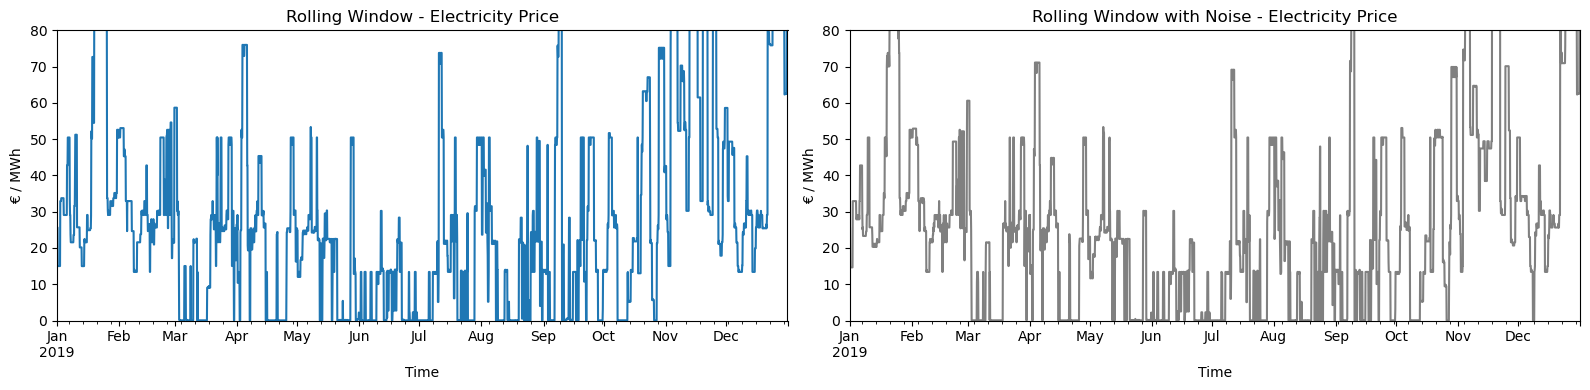

28.920408885045546
28.28026217760648


In [18]:
fig, ax = plt.subplots(1,2, figsize=(16,4))

n.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0],
    ylim=(0, 80),
    title = 'Rolling Window - Electricity Price'
)

n_wind_noise.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[1],
    ylim = (0, 80),
    title = 'Rolling Window with Noise - Electricity Price',
    color = 'grey'
)

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')
ax[0].set_ylabel('€ / MWh')
ax[1].set_ylabel('€ / MWh')

plt.tight_layout()
plt.show()

print(n.buses_t.marginal_price['DE0 0'].mean())
print(n_wind_noise.buses_t.marginal_price['DE0 0'].mean())

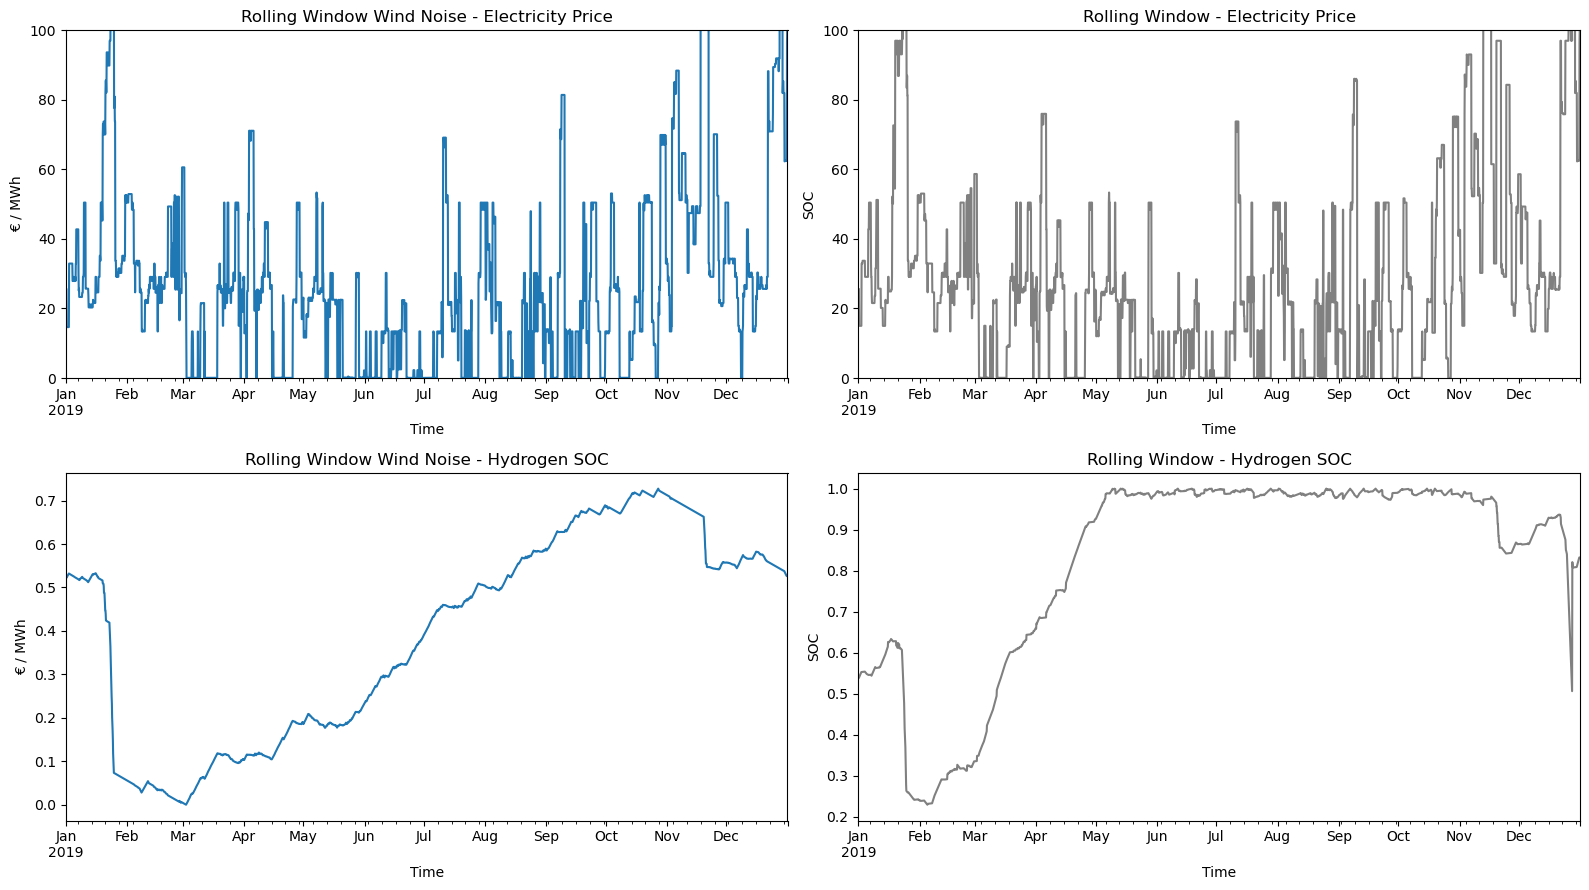

In [19]:
fig, ax = plt.subplots(2,2, figsize=(16,9))

n_wind_noise.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0][0],
    ylim=(0, 100),
    title = 'Rolling Window Wind Noise - Electricity Price'
)

n.buses_t.marginal_price['DE0 0'].plot(
    ax = ax[0][1],
    ylim = (0, 100),
    title = 'Rolling Window - Electricity Price',
    color = 'grey'
)

get_hydrogen_soc(n_perfect_foresight).plot(
    ax = ax[1][0],
    title = 'Rolling Window Wind Noise - Hydrogen SOC'
)
get_hydrogen_soc(n).plot(
    ax = ax[1][1],
    title = 'Rolling Window - Hydrogen SOC',
    color = 'grey'

)

ax[0][0].set_xlabel("Time")
ax[1][0].set_xlabel("Time")
ax[0][1].set_xlabel("Time")
ax[1][1].set_xlabel("Time")

ax[0][0].set_ylabel("€ / MWh")
ax[1][0].set_ylabel("€ / MWh")
ax[0][1].set_ylabel("SOC")
ax[1][1].set_ylabel("SOC")

plt.tight_layout()

In [20]:
print(n.statistics.dispatch().loc["Generator", 'Onshore Wind'])
print(n_wind_noise.statistics.dispatch().loc["Generator", 'Onshore Wind'])

278763921.8895911
287732473.61001503


- genau das gleiche wie bei 45 auch, also liegt es vermutlich nicht nur an der erhöhten flexibilität

Nächste Schritte:
- liegt es vielleicht nicht nur an der flexibilität sondern noch an was anderem?
- die Co2 Constraints brauch man glaube ich, sonst ist das Preisniveau so niedrig, das könnte noch weitere Einflüsse haben
- ich wollte morgen mal ein paar paper von nicole ludwig lesen und ihr eine Mail schicken, vielleicht müssen wir uns aber noch weitere Sachen überlegen, sodass die Preise sich stärker verändern.